#Merging files

We used Tableau Prep to merge our datasets. Below is the scheme.

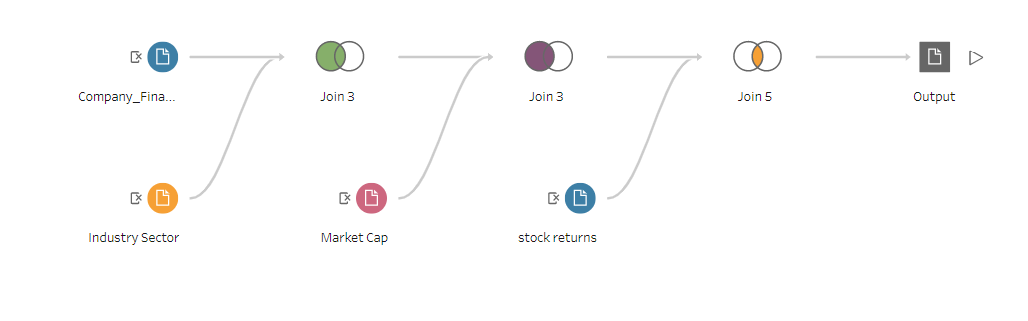

For GREEN Join #3 we did LEFT join of Company Financials with Industry Sector files on GVKEY. Below is the info.

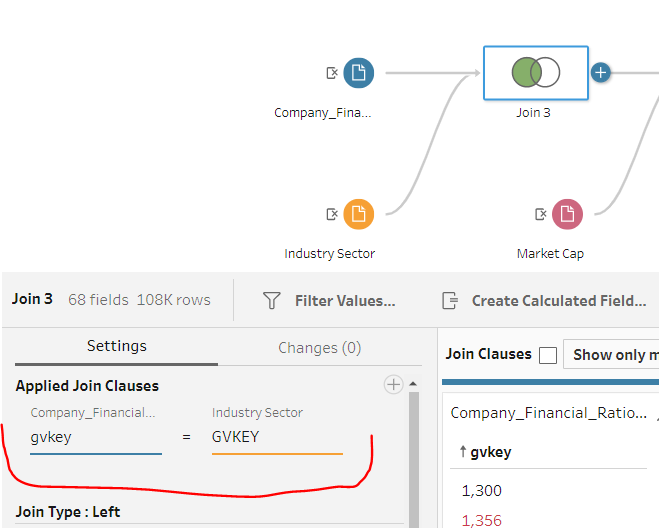

Then we added Market cap file with LEFT join on GVKEY and date. Below is the info.

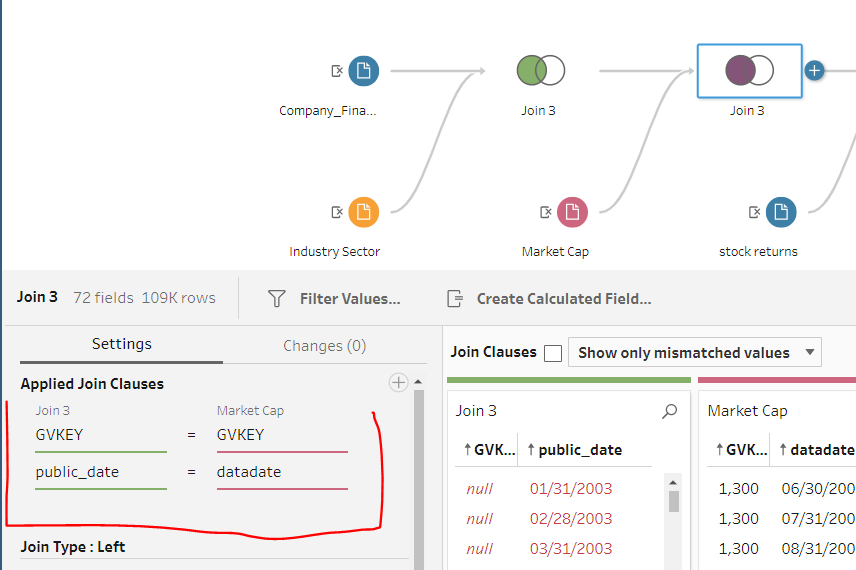

Finally we added stock returns on INNER join PERMNO and DATE. Below is the info.

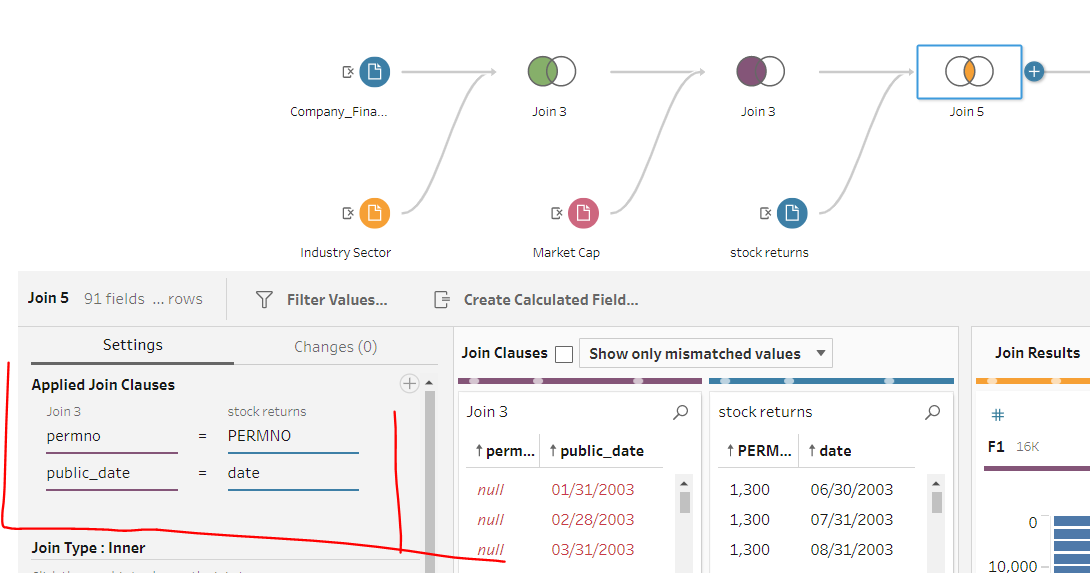

As the result of those operations we were able to merge all datasets. We saved output result as file - Output Finance 2.csv.

Later on we will repeat the same procedure for the TEST file with the information on DECEMBER 2022 only. We needed to do it separetaly as we would need to use LEFT join instead of INNER join at the last step.

# Load Packages and View Data

In [ ]:
import pandas as pd
import numpy as np
#import os
#from os.path import curdir
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

!pip install riskfolio-lib
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.4/293.4 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.0/983.0 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 kB 16.5 MB/s eta 0:00:00


In [ ]:
# Load necessary libraries
from google.colab import files
import io
import pandas as pd  # Import pandas library

# Upload the dataset
uploaded = files.upload()

# Read the CSV file into a DataFrame
merged_data = pd.read_csv(io.BytesIO(uploaded['Output Finance 2.csv']), header=0, sep=",")
merged_data.head()

Saving Output Finance 2.csv to Output Finance 2.csv


F1  gvkey  permno       adate       qdate public_date   CAPEI     bm  \
0  63671   1998   65138  12/31/2001   9/30/2002   1/31/2003  19.565  0.503   
1  63672   1998   65138  12/31/2002  12/31/2002   2/28/2003  17.407  0.527   
2  63673   1998   65138  12/31/2002  12/31/2002   3/31/2003  16.661  0.527   
3  63674   1998   65138  12/31/2002  12/31/2002   4/30/2003  17.350  0.527   
4  63676   1998   65138  12/31/2002   3/31/2003   6/30/2003  18.418  0.561   

      evm  pe_op_basic  ...  Forward 1M Return  Forward 3M Return  \
0  13.153       13.522  ...          -0.013147          -0.006610   
1  12.791       12.868  ...          -0.033306           0.043203   
2  12.791       12.364  ...           0.041306           0.080012   
3  12.791       12.875  ...           0.036338           0.103563   
4  13.337       13.279  ...           0.064013           0.046262   

   Forward 6M Return  Forward 12M Return  Past Return 1M  Past Return 12M  \
0           0.096268            0.419294       -0.001094              NaN   
1           0.108346            0.533969       -0.013147              NaN   
2           0.129975            0.615885       -0.033306              NaN   
3           0.191842            0.405204        0.041306              NaN   
4           0.240897            0.399576        0.000803              NaN   

   Volatility  Volatility Adjusted Forward 1M Return  \
0         NaN                                    NaN   
1         NaN                                    NaN   
2         NaN                                    NaN   
3         NaN                                    NaN   
4         NaN                                    NaN   

   Volatility Adjusted Forward 3M Return  \
0                                    NaN   
1                                    NaN   
2                                    NaN   
3                                    NaN   
4                                    NaN   

   Volatility Adjusted Forward 6M Return  
0                                    NaN  
1                                    NaN  
2                                    NaN  
3                                    NaN  
4                                    NaN  

[5 rows x 91 columns]

In [ ]:
#lets check all the features we have now
merged_data.columns

Index(['F1', 'gvkey', 'permno', 'adate', 'qdate', 'public_date', 'CAPEI', 'bm',
       'evm', 'pe_op_basic', 'pe_op_dil', 'pe_exi', 'pe_inc', 'ps', 'pcf',
       'npm', 'opmbd', 'opmad', 'gpm', 'ptpm', 'cfm', 'roa', 'roe', 'roce',
       'aftret_eq', 'pretret_noa', 'pretret_earnat', 'GProf', 'equity_invcap',
       'debt_invcap', 'totdebt_invcap', 'capital_ratio', 'cash_lt', 'invt_act',
       'rect_act', 'debt_at', 'debt_ebitda', 'curr_debt', 'lt_debt',
       'profit_lct', 'ocf_lct', 'cash_debt', 'fcf_ocf', 'lt_ppent', 'dltt_be',
       'debt_assets', 'debt_capital', 'de_ratio', 'cash_ratio', 'quick_ratio',
       'curr_ratio', 'at_turn', 'rect_turn', 'pay_turn', 'sale_invcap',
       'sale_equity', 'rd_sale', 'adv_sale', 'accrual', 'ptb', 'TICKER',
       'cusip', 'GVKEY', 'ticker', 'cusip-1', 'conm', 'Industry', 'Sector',
       'GVKEY-1', 'datadate', 'ticker-1', 'Mcap', 'PERMNO', 'date',
       'SIC_Industry_Code', 'TICKER-1', 'COMNAM', 'CUSIP', 'VOLUME', 'RETURN',
       'Price I

In [ ]:
#91 features with some type object
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76312 entries, 0 to 76311
Data columns (total 91 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   F1                                     76312 non-null  int64  
 1   gvkey                                  76312 non-null  int64  
 2   permno                                 76312 non-null  int64  
 3   adate                                  76268 non-null  object 
 4   qdate                                  76312 non-null  object 
 5   public_date                            76312 non-null  object 
 6   CAPEI                                  75782 non-null  float64
 7   bm                                     74203 non-null  float64
 8   evm                                    76264 non-null  float64
 9   pe_op_basic                            75640 non-null  float64
 10  pe_op_dil                              75627 non-null  float64
 11  pe

In [ ]:
#Drop F1 - it is just ID
merged_data = merged_data.drop(['F1'], axis=1)

We are dropping Forward 1M Return,Forward 6M Return,Forward 12M Return,Volatility Adjusted Forward 1M Return, Volatility Adjusted Forward 3M Return, Volatility Adjusted Forward 6M Return from the dataset as other targeted variables.

In [ ]:
merged_data = merged_data.drop(['Forward 1M Return','Forward 6M Return','Forward 12M Return',\
              'Volatility Adjusted Forward 1M Return','Volatility Adjusted Forward 3M Return','Volatility Adjusted Forward 6M Return'], axis=1)

# Deal with Missing Values

In [ ]:
def missing_value_table(dataframe):
    # 1. Total Missing Values
    mis_val = dataframe.isnull().sum()

    # 2. Percentage of Missing Values
    mis_val_percent = 100 * dataframe.isnull().sum() / len(dataframe)

    # 3. Make a Table with the Results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # 4. Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
        columns={0: 'Missing Values', 1: '% of Total Values'})

    # 5. Only Keep the Columns with Missing Values
    mis_val_table_only = mis_val_table_ren_columns.loc[mis_val_table_ren_columns['% of Total Values'] > 0]

    # 6. Add a column to rank by missing value percentage
    mis_val_table_only['Rank'] = mis_val_table_only['% of Total Values'].rank(ascending=False)

    # 7. Return the Dataframe with Missing Information
    return mis_val_table_only.sort_values(by='% of Total Values', ascending=False)


In [ ]:
#here we can see %% of missing values for each feature
missing1 = missing_value_table(merged_data)
missing1

Missing Values  % of Total Values  Rank
Mcap               70715          92.665636   1.0
ticker-1           67893          88.967659   3.0
GVKEY-1            67893          88.967659   3.0
datadate           67893          88.967659   3.0
ticker              6748           8.842646   7.5
...                  ...                ...   ...
ps                    48           0.062900  65.5
adate                 44           0.057658  69.0
GProf                 40           0.052416  70.0
rd_sale               37           0.048485  71.0
VOLUME                 2           0.002621  72.0

[72 rows x 3 columns]

In [ ]:
#Features with more than 50% of missing values
missing_table = missing_value_table(merged_data)
missing_over_half = missing_table[missing_table['% of Total Values'] > 50]
missing_over_half

Missing Values  % of Total Values  Rank
Mcap               70715          92.665636   1.0
ticker-1           67893          88.967659   3.0
GVKEY-1            67893          88.967659   3.0
datadate           67893          88.967659   3.0

In [ ]:
#Drop the features that have over half missing values
merged_data = merged_data.drop(['Mcap','datadate','GVKEY-1','ticker-1'], axis=1)
merged_data.head()

gvkey  permno       adate       qdate public_date   CAPEI     bm     evm  \
0   1998   65138  12/31/2001   9/30/2002   1/31/2003  19.565  0.503  13.153   
1   1998   65138  12/31/2002  12/31/2002   2/28/2003  17.407  0.527  12.791   
2   1998   65138  12/31/2002  12/31/2002   3/31/2003  16.661  0.527  12.791   
3   1998   65138  12/31/2002  12/31/2002   4/30/2003  17.350  0.527  12.791   
4   1998   65138  12/31/2002   3/31/2003   6/30/2003  18.418  0.561  13.337   

   pe_op_basic  pe_op_dil  ...  TICKER-1         COMNAM     CUSIP     VOLUME  \
0       13.522     13.623  ...       ONE  BANK ONE CORP  06423A10   967732.0   
1       12.868     12.960  ...       ONE  BANK ONE CORP  06423A10   665265.0   
2       12.364     12.453  ...       ONE  BANK ONE CORP  06423A10   987347.0   
3       12.875     12.968  ...       ONE  BANK ONE CORP  06423A10  1064854.0   
4       13.279     13.422  ...       ONE  BANK ONE CORP  06423A10   935234.0   

     RETURN  Price Index  Forward 3M Return  Past Return 1M  Past Return 12M  \
0 -0.001094     1.000000          -0.006610       -0.001094              NaN   
1 -0.013147     0.986853           0.043203       -0.013147              NaN   
2 -0.033306     0.953985           0.080012       -0.033306              NaN   
3  0.041306     0.993390           0.103563        0.041306              NaN   
4  0.000803     1.030315           0.046262        0.000803              NaN   

   Volatility  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  

[5 rows x 80 columns]

In [ ]:
# Drop Repeated Identifiers resulted from joining dataset,
# Drop repeated dates, drop repeated company name col

merged_data = merged_data.drop(['ticker','cusip-1','date',\
                                'TICKER','cusip','conm'], axis=1)

merged_data = merged_data.rename(columns={'TICKER-1': 'TICKER'})

In [ ]:
# Dealing with objective and numerical features separately
object_col = merged_data.select_dtypes(include=['object'])
numerical_col = merged_data.select_dtypes(exclude=['object'])

#print(object_col.info())
#print(numerical_col.info())

In [ ]:
object_missing = missing_value_table(object_col)
object_missing

Missing Values  % of Total Values  Rank
adate              44           0.057658   1.0

In [ ]:
numerical_missing = missing_value_table(numerical_col)
numerical_missing

Missing Values  % of Total Values  Rank
Sector                     6748           8.842646   2.0
Industry                   6748           8.842646   2.0
GVKEY                      6748           8.842646   2.0
Volatility                 5273           6.909791   4.5
Past Return 12M            5273           6.909791   4.5
...                         ...                ...   ...
npm                          48           0.062900  56.5
opmad                        48           0.062900  56.5
GProf                        40           0.052416  60.0
rd_sale                      37           0.048485  61.0
VOLUME                        2           0.002621  62.0

[62 rows x 3 columns]

We decided to DROP all rows with missing values. Our executive decision was that it is not a good practice to add more noise with inputing "average" results which are not real numbers.

In [ ]:
# Drop rows with any null values in any column since
df = merged_data #safe a copy to a dataframe just to be safe

In [ ]:
merged_data.dropna(inplace=True)

merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58991 entries, 68 to 76311
Data columns (total 74 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gvkey              58991 non-null  int64  
 1   permno             58991 non-null  int64  
 2   adate              58991 non-null  object 
 3   qdate              58991 non-null  object 
 4   public_date        58991 non-null  object 
 5   CAPEI              58991 non-null  float64
 6   bm                 58991 non-null  float64
 7   evm                58991 non-null  float64
 8   pe_op_basic        58991 non-null  float64
 9   pe_op_dil          58991 non-null  float64
 10  pe_exi             58991 non-null  float64
 11  pe_inc             58991 non-null  float64
 12  ps                 58991 non-null  float64
 13  pcf                58991 non-null  float64
 14  npm                58991 non-null  float64
 15  opmbd              58991 non-null  float64
 16  opmad              58

# Deal with Duplicates

In [ ]:
#Checking for duplicates
duplicates = merged_data[merged_data.duplicated(subset=['gvkey', 'permno', 'adate', 'qdate', 'public_date', 'TICKER', 'COMNAM', 'CUSIP'], keep=False)]
duplicates

gvkey  permno       adate       qdate public_date    CAPEI     bm  \
454     2710   69796   2/29/2012   5/31/2012   7/31/2012  117.893  0.851   
455     2710   69796   2/29/2012   5/31/2012   7/31/2012  117.893  0.851   
584     2710   69796   2/28/2003  11/30/2003   3/31/2004   24.185  0.651   
585     2710   69796   2/28/2003  11/30/2003   3/31/2004   24.185  0.651   
589     7146   52090  11/30/2003  11/30/2003   3/31/2004   26.710  0.192   
...      ...     ...         ...         ...         ...      ...    ...   
76008  18043   13963   6/30/2021   6/30/2021   8/31/2021  -14.477  0.556   
76050   2710   69796   2/28/2021   5/31/2021   9/30/2021   20.534  0.267   
76051   2710   69796   2/28/2021   5/31/2021   9/30/2021   20.534  0.267   
76058   7146   52090  11/30/2020   5/31/2021   9/30/2021   29.808  0.213   
76059   7146   52090  11/30/2020   5/31/2021   9/30/2021   29.808  0.213   

          evm  pe_op_basic  pe_op_dil  ...  TICKER                    COMNAM  \
454    10.990       11.803     11.953  ...     STZ  CONSTELLATION BRANDS INC   
455    10.990       11.803     11.953  ...     STZ  CONSTELLATION BRANDS INC   
584     8.470        6.080      6.245  ...     STZ  CONSTELLATION BRANDS INC   
585     8.470        6.080      6.245  ...     STZ  CONSTELLATION BRANDS INC   
589    12.515       23.773     24.467  ...     MKC        MCCORMICK & CO INC   
...       ...          ...        ...  ...     ...                       ...   
76008  14.317       27.072     27.072  ...    NWSA             NEWS CORP NEW   
76050  15.466       21.390     21.631  ...     STZ  CONSTELLATION BRANDS INC   
76051  15.466       21.390     21.631  ...     STZ  CONSTELLATION BRANDS INC   
76058  23.659       26.876     27.191  ...     MKC        MCCORMICK & CO INC   
76059  23.659       26.876     27.191  ...     MKC        MCCORMICK & CO INC   

          CUSIP    VOLUME    RETURN  Price Index  Forward 3M Return  \
454    21036P10  747050.0  0.042498     2.250488           0.252748   
455    21036P10  747050.0  0.042498     2.250488           0.252748   
584    21036P10  190780.0  0.012618     1.280415           0.156697   
585    21036P10  190780.0  0.012618     1.280415           0.156697   
589    57978020   99499.0  0.071954     1.523291           0.022671   
...         ...       ...       ...          ...                ...   
76008  65249B10  524038.0 -0.087698     1.542048          -0.033739   
76050  21036P10  238563.0 -0.002131    18.270567           0.195198   
76051  21036P10  238563.0 -0.002131    18.270567           0.195198   
76058  57978020  256692.0 -0.060957    10.514640           0.201913   
76059  57978020  256692.0 -0.060957    10.514640           0.201913   

       Past Return 1M  Past Return 12M  Volatility  
454          0.042498         0.383519    0.456914  
455          0.042498         0.383519    0.456914  
584          0.012618         0.414097    0.280332  
585          0.012618         0.414097    0.280332  
589          0.071954         0.413494    0.151321  
...               ...              ...         ...  
76008       -0.087698         0.502594    0.445404  
76050       -0.002131         0.127314    0.308664  
76051       -0.002131         0.127314    0.308664  
76058       -0.060957        -0.152650    0.155014  
76059       -0.060957        -0.152650    0.155014  

[1466 rows x 74 columns]

In [ ]:
#Removing duplicates
df_cleaned = merged_data.drop_duplicates(subset=['gvkey', 'permno', 'adate', 'qdate', 'public_date', 'TICKER', 'COMNAM', 'CUSIP'])
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58258 entries, 68 to 76311
Data columns (total 74 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gvkey              58258 non-null  int64  
 1   permno             58258 non-null  int64  
 2   adate              58258 non-null  object 
 3   qdate              58258 non-null  object 
 4   public_date        58258 non-null  object 
 5   CAPEI              58258 non-null  float64
 6   bm                 58258 non-null  float64
 7   evm                58258 non-null  float64
 8   pe_op_basic        58258 non-null  float64
 9   pe_op_dil          58258 non-null  float64
 10  pe_exi             58258 non-null  float64
 11  pe_inc             58258 non-null  float64
 12  ps                 58258 non-null  float64
 13  pcf                58258 non-null  float64
 14  npm                58258 non-null  float64
 15  opmbd              58258 non-null  float64
 16  opmad              58

In [ ]:
#Double check if any dups left
duplicates22 = df_cleaned[df_cleaned.duplicated(keep=False)]
duplicates22

Empty DataFrame
Columns: [gvkey, permno, adate, qdate, public_date, CAPEI, bm, evm, pe_op_basic, pe_op_dil, pe_exi, pe_inc, ps, pcf, npm, opmbd, opmad, gpm, ptpm, cfm, roa, roe, roce, aftret_eq, pretret_noa, pretret_earnat, GProf, equity_invcap, debt_invcap, totdebt_invcap, capital_ratio, cash_lt, invt_act, rect_act, debt_at, debt_ebitda, curr_debt, lt_debt, profit_lct, ocf_lct, cash_debt, fcf_ocf, lt_ppent, dltt_be, debt_assets, debt_capital, de_ratio, cash_ratio, quick_ratio, curr_ratio, at_turn, rect_turn, pay_turn, sale_invcap, sale_equity, rd_sale, adv_sale, accrual, ptb, GVKEY, Industry, Sector, PERMNO, SIC_Industry_Code, TICKER, COMNAM, CUSIP, VOLUME, RETURN, Price Index, Forward 3M Return, Past Return 1M, Past Return 12M, Volatility]
Index: []

[0 rows x 74 columns]

# EDA

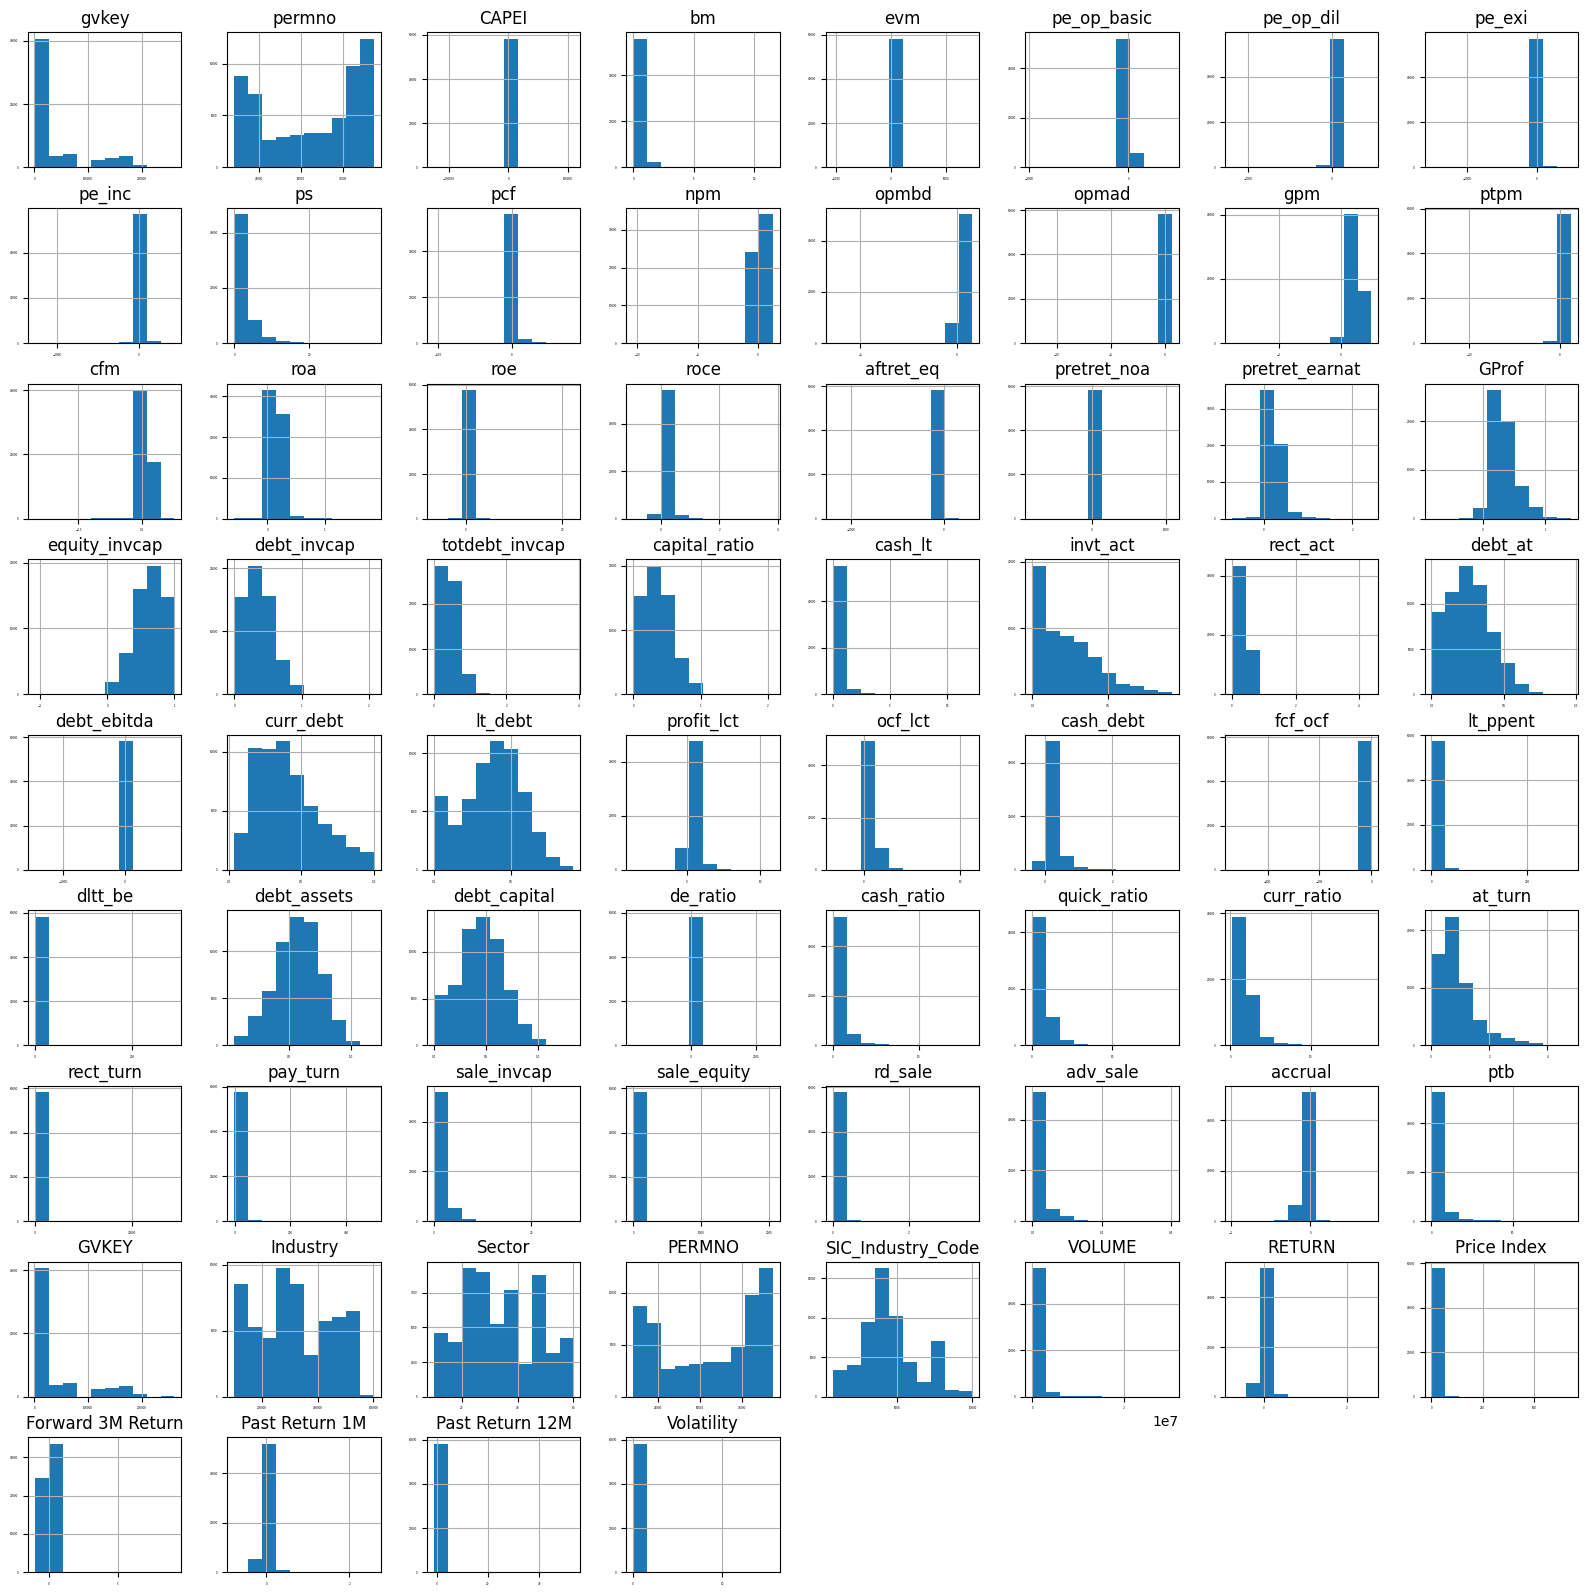

In [ ]:
#checking distributions for each feature
df_cleaned.hist(sharex=False, sharey=False, xlabelsize=2, ylabelsize=2, figsize=(20,20))
plt.show()

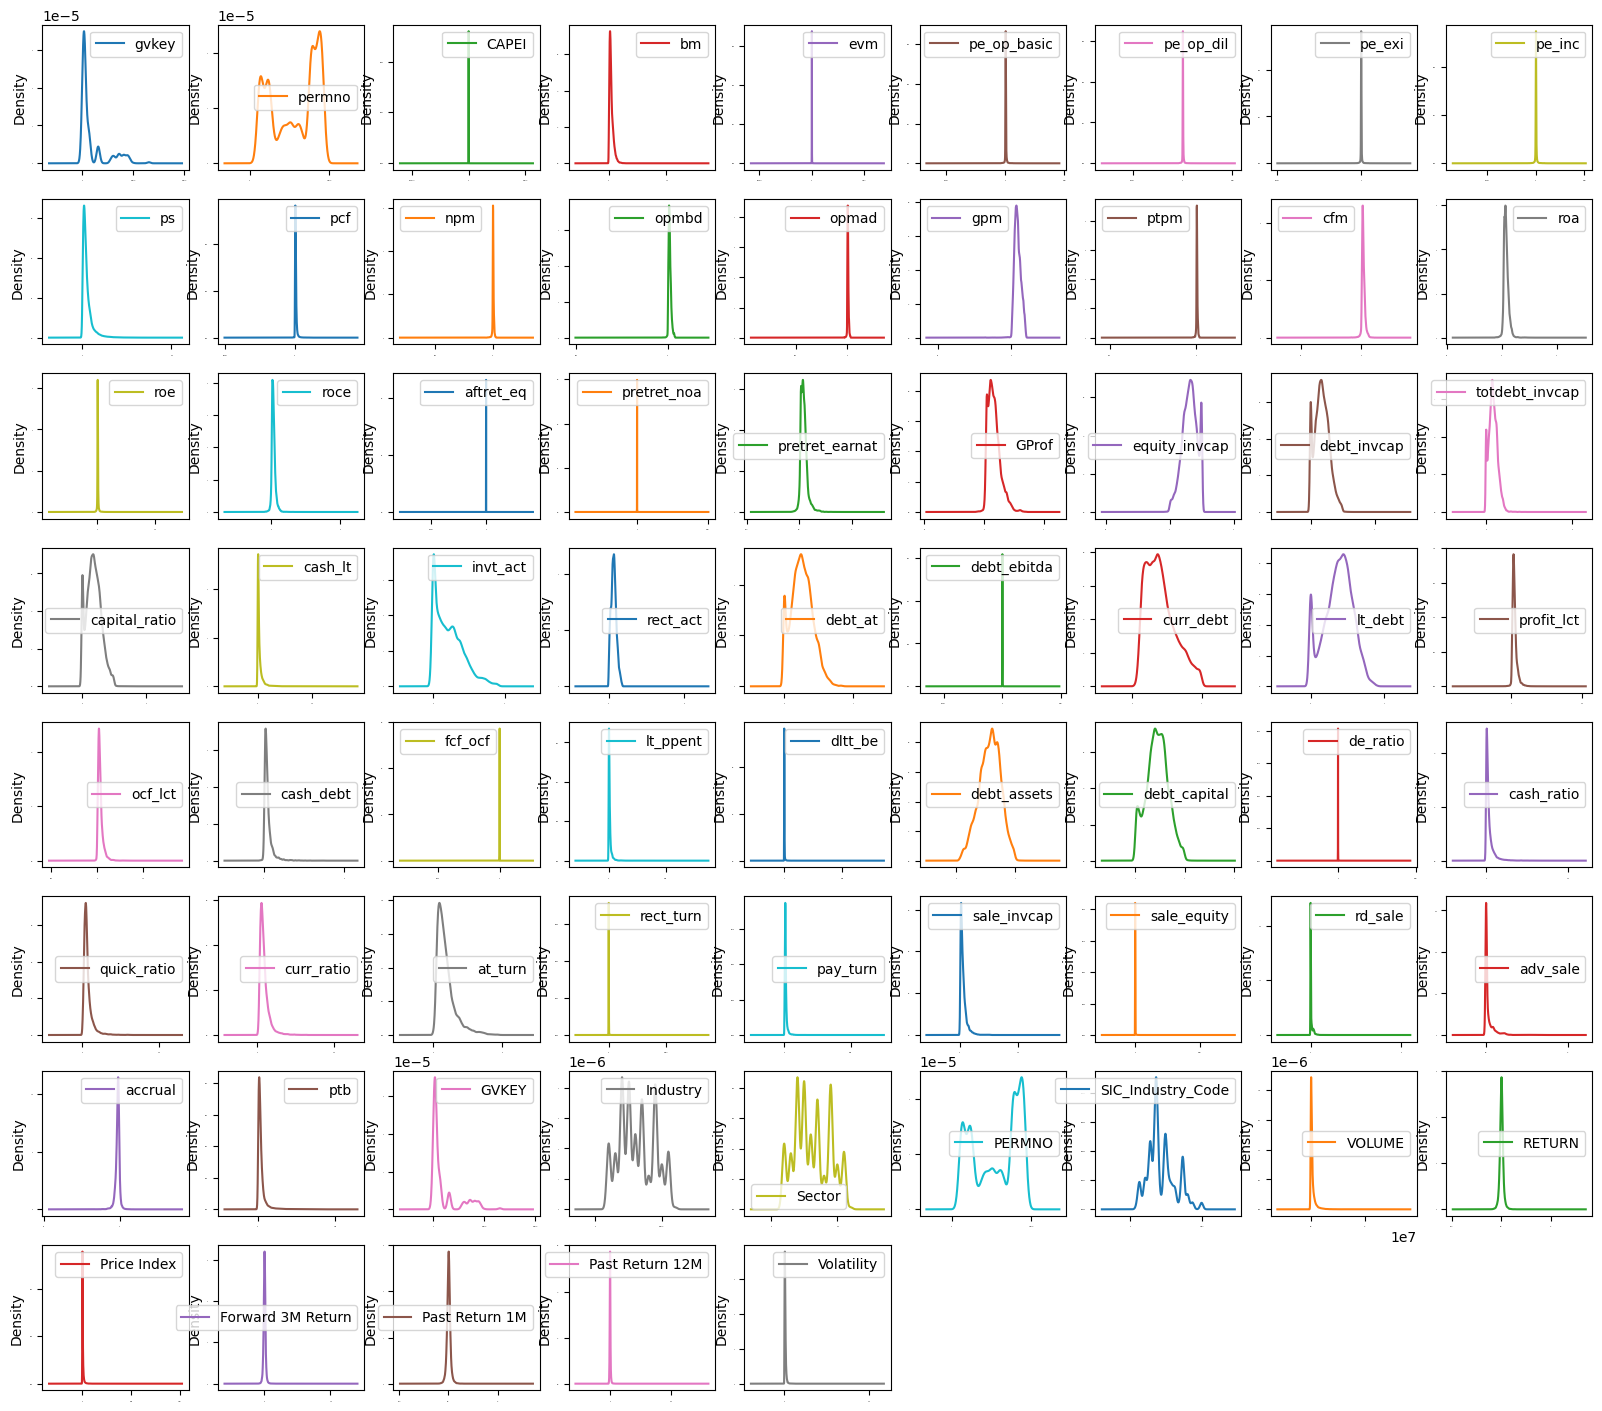

In [ ]:
df_cleaned.plot(kind='density', subplots=True, layout=(9,9), sharex=False, legend=True, fontsize=1, figsize=(20,20))
plt.show()

gvkey - adv_sale: 1.0
permno - GVKEY: 1.0
CAPEI - bm: 0.9426758858723309
evm - pe_op_basic: 0.7457617404892685
pe_inc - pcf: 0.8293600340954254
pe_inc - opmbd: 0.9620500358818721
pe_inc - opmad: 0.845302949320805
ps - pcf: 0.8796047873735059
ps - opmbd: 0.7422397203945271
ps - opmad: 0.795897808217837
pcf - opmbd: 0.8855571033188968
opmbd - opmad: 0.7961396071557952
gpm - cfm: 0.8706204949239439
pretret_noa - pretret_earnat: -0.9853743472101024
pretret_noa - GProf: -0.9271800061107769
pretret_noa - equity_invcap: -0.993765559163326
pretret_noa - cash_lt: -0.9074534871916353
pretret_noa - debt_at: -0.7116841019660237
pretret_noa - fcf_ocf: -0.8549678908575914
pretret_noa - lt_ppent: -0.9346546160787711
pretret_earnat - GProf: 0.9421428487947937
pretret_earnat - equity_invcap: 0.9960949854127412
pretret_earnat - cash_lt: 0.920249905170035
pretret_earnat - debt_at: 0.7178316405224567
pretret_earnat - fcf_ocf: 0.8655052346879021
pretret_earnat - lt_ppent: 0.9340533447586602
GProf - equity_

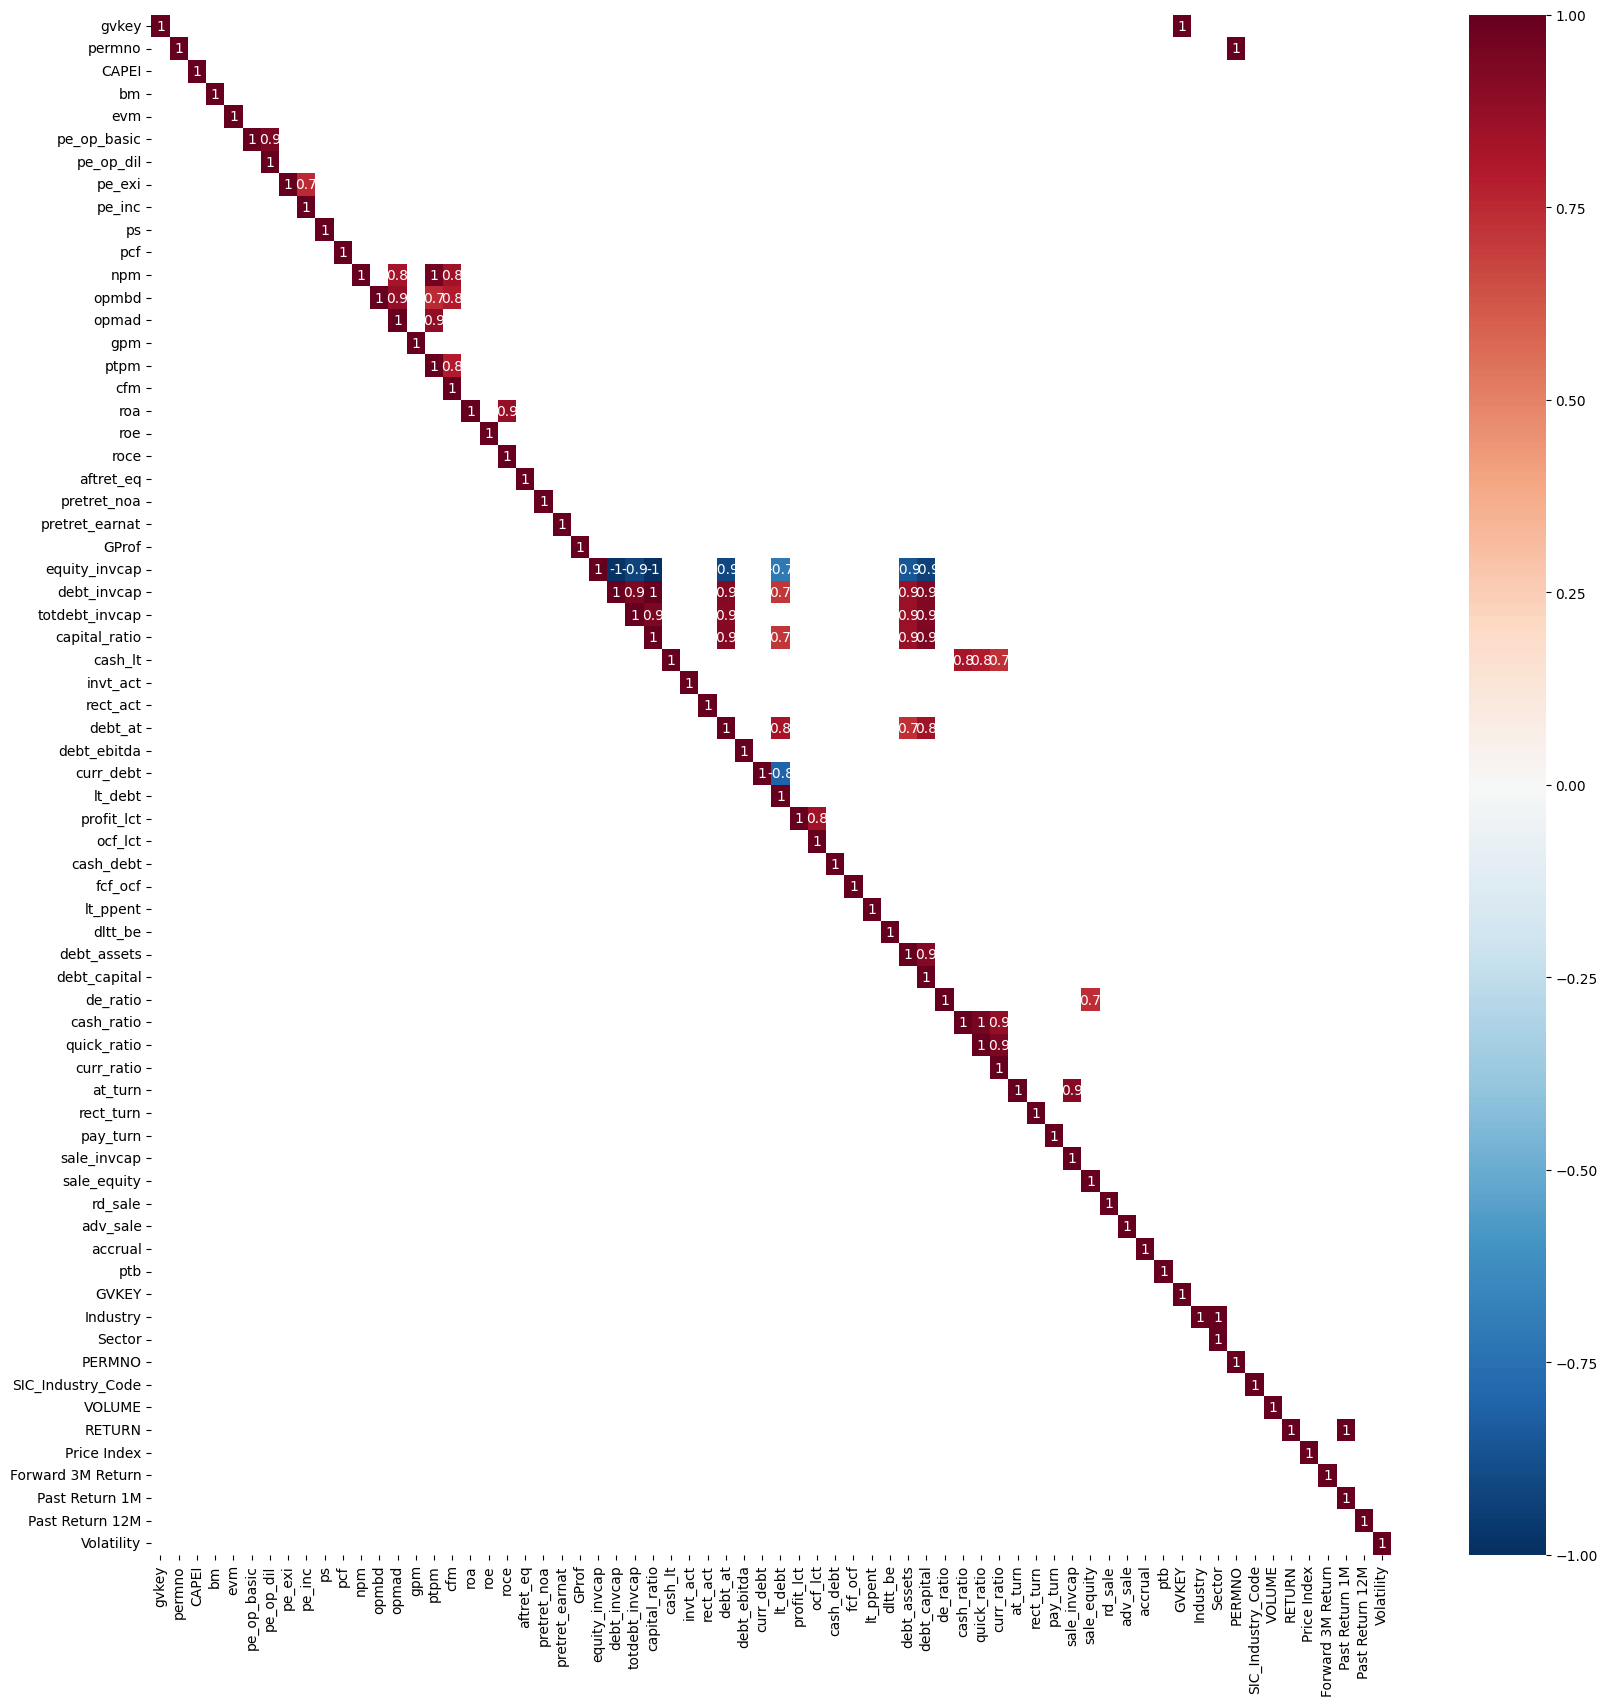

In [ ]:
#now checking correlation between features
matrix = np.triu(df_cleaned.corr())

threshold = 0.7

high_correlation_pairs = []

# Iterate over the correlation matrix and find high correlated pairs
for i in range(len(matrix)):
    for j in range(i + 1, len(matrix)):
        correlation = matrix[i, j]
        if np.abs(correlation) > threshold:
            feature_i = df_cleaned.columns[i]
            feature_j = df_cleaned.columns[j]
            high_correlation_pairs.append((feature_i, feature_j, correlation))

for pair in high_correlation_pairs:
    print(f"{pair[0]} - {pair[1]}: {pair[2]}")

# Plot the heatmap
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df_cleaned.corr(), annot=True, ax=ax, fmt='.1g', vmin=-1, vmax=1, center=0, mask=(np.abs(matrix) < 0.7), cmap='RdBu_r')
plt.show()

In [ ]:
#drop 100% correlated features
df_cleaned = df_cleaned.drop(['adv_sale','RETURN','ptb'], axis=1)

In [ ]:
# Drop identify ids columns
df_cleaned = df_cleaned.drop(['gvkey','permno'], axis=1)

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58258 entries, 68 to 76311
Data columns (total 69 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   adate              58258 non-null  object 
 1   qdate              58258 non-null  object 
 2   public_date        58258 non-null  object 
 3   CAPEI              58258 non-null  float64
 4   bm                 58258 non-null  float64
 5   evm                58258 non-null  float64
 6   pe_op_basic        58258 non-null  float64
 7   pe_op_dil          58258 non-null  float64
 8   pe_exi             58258 non-null  float64
 9   pe_inc             58258 non-null  float64
 10  ps                 58258 non-null  float64
 11  pcf                58258 non-null  float64
 12  npm                58258 non-null  float64
 13  opmbd              58258 non-null  float64
 14  opmad              58258 non-null  float64
 15  gpm                58258 non-null  float64
 16  ptpm               58

In [ ]:
# Drop IT and Energy Sector
df_cleaned = df_cleaned[~((df_cleaned['Sector'] == 45) | (df_cleaned['Sector'] == 10))]
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44834 entries, 68 to 76311
Data columns (total 69 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   adate              44834 non-null  object 
 1   qdate              44834 non-null  object 
 2   public_date        44834 non-null  object 
 3   CAPEI              44834 non-null  float64
 4   bm                 44834 non-null  float64
 5   evm                44834 non-null  float64
 6   pe_op_basic        44834 non-null  float64
 7   pe_op_dil          44834 non-null  float64
 8   pe_exi             44834 non-null  float64
 9   pe_inc             44834 non-null  float64
 10  ps                 44834 non-null  float64
 11  pcf                44834 non-null  float64
 12  npm                44834 non-null  float64
 13  opmbd              44834 non-null  float64
 14  opmad              44834 non-null  float64
 15  gpm                44834 non-null  float64
 16  ptpm               44

# Label Encoding

In [ ]:
#Deal with Dates cols
df_cleaned['adate'] = pd.to_datetime(df_cleaned['adate'])
df_cleaned['adate_month'] = df_cleaned['adate'].dt.month
#df_cleaned['adate_year'] = df_cleaned['adate'].dt.year

df_cleaned['qdate'] = pd.to_datetime(df_cleaned['qdate'])
df_cleaned['qdate_month'] = df_cleaned['qdate'].dt.month
#df_cleaned['qdate_year'] = df_cleaned['qdate'].dt.year

df_cleaned['public_date'] = pd.to_datetime(df_cleaned['public_date'])
df_cleaned['pubdate_month'] = df_cleaned['public_date'].dt.month
df_cleaned['pubdate_year'] = df_cleaned['public_date'].dt.year

# We use a new dataframe to drop the original dates just to be safe
df = df_cleaned.drop(['qdate','adate'], axis=1)

df.head()
#We don't need gvkey, permno,will drop them from our training set later

public_date   CAPEI     bm     evm  pe_op_basic  pe_op_dil  pe_exi  pe_inc  \
68  2012-07-31   8.287  0.738   5.641        4.397      4.416   3.779   3.717   
69  2012-07-31  23.787  0.597  10.164       38.670     38.336  40.063  63.529   
70  2012-07-31  48.160  0.541   4.460        7.941      7.979   8.418   8.418   
88  2012-07-31  68.520  0.805  19.473      -99.333    -99.333 -74.500 -73.094   
89  2012-07-31  14.763  0.349   8.174       13.696     13.849  14.045  14.045   

       ps     pcf  ...     VOLUME  Price Index  Forward 3M Return  \
68  0.884   2.838  ...   894332.0    17.277481          -0.097518   
69  2.066   6.818  ...  1033842.0     1.690952           0.235013   
70  1.616   6.313  ...  3901034.0     4.845980           0.164018   
88  1.918  32.520  ...   148254.0     1.397987           0.186933   
89  0.341  17.759  ...   316286.0     3.691377           0.129962   

    Past Return 1M  Past Return 12M  Volatility  adate_month  qdate_month  \
68       -0.170420        -0.534685    0.620793           12            3   
69       -0.083282        -0.180439    0.260543           12            3   
70       -0.002568        -0.345562    0.604497           12            3   
88       -0.024427         0.138730    0.442618           12            3   
89        0.004864        -0.211421    0.412345           12            3   

    pubdate_month  pubdate_year  
68              7          2012  
69              7          2012  
70              7          2012  
88              7          2012  
89              7          2012  

[5 rows x 71 columns]

In [ ]:
object_col = []
numerical_col = []

#created arrary of categorical features
for i in df.columns:
    col_type = df[i].dtype
    if col_type == 'object':
        object_col.append(i)

#created arrary of categorical features
for i in df.columns:
    col_type = df[i].dtype
    if col_type == 'int64' or col_type == 'float64':
        numerical_col.append(i)

print(object_col)
print(df['CUSIP'].nunique())
print(df['COMNAM'].nunique())
print(df['TICKER'].nunique())

['TICKER', 'COMNAM', 'CUSIP']
367
461
411


In [ ]:
# Drop TICKER and CUSIP, PERMNO
df = df.drop(['TICKER','CUSIP','PERMNO'], axis=1)

In [ ]:
object_col = []
numerical_col = []

#created arrary of categorical features
for i in df.columns:
    col_type = df[i].dtype
    if col_type == 'object':
        object_col.append(i)

#created arrary of categorical features
for i in df.columns:
    col_type = df[i].dtype
    if col_type == 'int64' or col_type == 'float64':
        numerical_col.append(i)

print(object_col)

['COMNAM']


In [ ]:
pip install feature_engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 5.3 MB/s eta 0:00:00


In [ ]:
from feature_engine.imputation import CategoricalImputer
from feature_engine.encoding import RareLabelEncoder

#missing_encoder = CategoricalImputer(imputation_method='frequent')
#missing_encoder.fit(df[object_col])
#df[cobject_col] = missing_encoder.transform(df[object_col])

#We encode rare categories for feature company name
rare_encoder = RareLabelEncoder(tol=0.001, n_categories=30, max_n_categories=50)
rare_encoder.fit(df[object_col])

df[object_col] = rare_encoder.transform(df[object_col])

df[object_col] = df[object_col].astype('category')

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
#we encode categorical feature
oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

df[object_col] = oe.fit_transform(df[object_col])

In [ ]:
df['COMNAM'].nunique()

51

In [ ]:
df.head()

public_date   CAPEI     bm     evm  pe_op_basic  pe_op_dil  pe_exi  pe_inc  \
68  2012-07-31   8.287  0.738   5.641        4.397      4.416   3.779   3.717   
69  2012-07-31  23.787  0.597  10.164       38.670     38.336  40.063  63.529   
70  2012-07-31  48.160  0.541   4.460        7.941      7.979   8.418   8.418   
88  2012-07-31  68.520  0.805  19.473      -99.333    -99.333 -74.500 -73.094   
89  2012-07-31  14.763  0.349   8.174       13.696     13.849  14.045  14.045   

       ps     pcf  ...     VOLUME  Price Index  Forward 3M Return  \
68  0.884   2.838  ...   894332.0    17.277481          -0.097518   
69  2.066   6.818  ...  1033842.0     1.690952           0.235013   
70  1.616   6.313  ...  3901034.0     4.845980           0.164018   
88  1.918  32.520  ...   148254.0     1.397987           0.186933   
89  0.341  17.759  ...   316286.0     3.691377           0.129962   

    Past Return 1M  Past Return 12M  Volatility  adate_month  qdate_month  \
68       -0.170420        -0.534685    0.620793           12            3   
69       -0.083282        -0.180439    0.260543           12            3   
70       -0.002568        -0.345562    0.604497           12            3   
88       -0.024427         0.138730    0.442618           12            3   
89        0.004864        -0.211421    0.412345           12            3   

    pubdate_month  pubdate_year  
68              7          2012  
69              7          2012  
70              7          2012  
88              7          2012  
89              7          2012  

[5 rows x 68 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44834 entries, 68 to 76311
Data columns (total 68 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   public_date        44834 non-null  datetime64[ns]
 1   CAPEI              44834 non-null  float64       
 2   bm                 44834 non-null  float64       
 3   evm                44834 non-null  float64       
 4   pe_op_basic        44834 non-null  float64       
 5   pe_op_dil          44834 non-null  float64       
 6   pe_exi             44834 non-null  float64       
 7   pe_inc             44834 non-null  float64       
 8   ps                 44834 non-null  float64       
 9   pcf                44834 non-null  float64       
 10  npm                44834 non-null  float64       
 11  opmbd              44834 non-null  float64       
 12  opmad              44834 non-null  float64       
 13  gpm                44834 non-null  float64       
 14  ptpm 

#Outliers

In [ ]:
#checking extreme values
pd.set_option('display.max_columns', 1000)
df.describe()

CAPEI            bm           evm   pe_op_basic     pe_op_dil  \
count   44834.000000  44834.000000  44834.000000  44834.000000  44834.000000   
mean       23.159135      0.435161     11.805591     19.469819     19.819479   
std       927.493903      0.351182     92.400987     44.194538     46.662183   
min   -125202.000000      0.000000  -5269.200000  -1937.000000  -2377.300000   
25%        16.148250      0.202000      8.478250     12.640000     12.818000   
50%        23.287000      0.340000     10.774000     17.695000     17.944500   
75%        34.269750      0.572000     14.048000     24.039500     24.411750   
max     33738.000000     11.532000   7403.750000    805.333000    863.333000   

             pe_exi        pe_inc            ps           pcf           npm  \
count  44834.000000  44834.000000  44834.000000  44834.000000  44834.000000   
mean      19.987422     18.997725      2.359586     15.047607      0.086819   
std       59.036270     61.880343      2.622282     21.445828      0.116782   
min    -3000.000000  -2541.700000      0.029000   -527.810000     -3.562000   
25%       12.268500     11.827250      0.918000      7.990000      0.044000   
50%       18.525000     18.268000      1.583000     12.220500      0.080000   
75%       26.189000     25.900750      2.802000     17.850750      0.125000   
max      964.174000    867.675000     33.524000    421.549000      1.137000   

              opmbd         opmad           gpm          ptpm           cfm  \
count  44834.000000  44834.000000  44834.000000  44834.000000  44834.000000   
mean       0.210434      0.157952      0.405119      0.123388      0.146444   
std        0.130326      0.117551      0.201845      0.138373      0.130429   
min       -3.515000     -3.615000     -3.515000     -3.583000     -3.449000   
25%        0.129000      0.092000      0.266000      0.065000      0.084000   
50%        0.193000      0.144000      0.378000      0.114000      0.132000   
75%        0.280000      0.204000      0.528000      0.173000      0.201000   
max        0.736000      0.687000      1.000000      1.197000      1.189000   

                roa           roe          roce     aftret_eq   pretret_noa  \
count  44834.000000  44834.000000  44834.000000  44834.000000  44834.000000   
mean       0.160525      0.204061      0.194004      0.118258      0.382867   
std        0.088191      0.418728      0.147528     17.261158     12.498822   
min       -0.326000     -6.561000     -0.581000  -2388.700000   -799.590000   
25%        0.103000      0.084000      0.106000      0.102000      0.167000   
50%        0.146000      0.156000      0.168000      0.171000      0.316000   
75%        0.199000      0.246000      0.245000      0.266000      0.534000   
max        1.853000     15.454000      3.838000    615.033000   1074.560000   

       pretret_earnat         GProf  equity_invcap   debt_invcap  \
count    44834.000000  44834.000000   44834.000000  44834.000000   
mean         0.224978      0.343361       0.598419      0.386133   
std          0.169296      0.218473       0.225341      0.218473   
min         -0.400000     -0.248000      -1.078000      0.000000   
25%          0.117000      0.182000       0.448000      0.233000   
50%          0.195000      0.301000       0.604000      0.380000   
75%          0.289000      0.459000       0.756000      0.533000   
max          2.429000      1.412000       1.001000      2.078000   

       totdebt_invcap  capital_ratio       cash_lt      invt_act  \
count    44834.000000   44834.000000  44834.000000  44834.000000   
mean         0.445097       0.392296      0.241850      0.251283   
std          0.247756       0.223162      0.423053      0.205808   
min          0.000000       0.000000      0.000000      0.000000   
25%          0.280000       0.235000      0.046000      0.069000   
50%          0.432000       0.386000      0.114000      0.232000   
75%          0.603000       0.539000      0.278000      0.384000   
m

In [ ]:
#substitute negatives with median as for this ratio negative is impossible
df['pay_turn'][(df['pay_turn']<0)] = df['pay_turn'].median()

In [ ]:
df['pay_turn'].describe()

count    44834.000000
mean        10.931867
std         13.444228
min          0.000000
25%          5.643000
50%          8.176000
75%         11.883000
max        500.741000
Name: pay_turn, dtype: float64

WE checked all features and decided to keep all negative ratios as they contain information about the companies` performances. The extreme values oftentimes give us some insights like TESLA stock where economic sense has nothing to do with reality and all valuations are just expectations.

In [ ]:
df['GVKEY'].nunique()

363

#First model will be on the whole period 2003 - 2022

Split into train 2003 - 2020 and test 2021-2022

In [ ]:
df_test = df[df['pubdate_year']>2020]
df_test

public_date   CAPEI     bm     evm  pe_op_basic  pe_op_dil  pe_exi  \
2352   2021-03-31  25.690  0.208  17.100       30.593     30.872  31.892   
2353   2021-04-30  25.743  0.208  17.100       30.656     30.936  31.958   
2354   2021-06-30  27.526  0.170  15.698       28.940     29.174  29.900   
2355   2021-08-31  27.027  0.158  15.757       26.444     26.637  26.735   
2356   2021-09-30  22.697  0.158  15.757       22.207     22.370  22.452   
...           ...     ...    ...     ...          ...        ...     ...   
76306  2021-09-30  21.282  0.726  10.018       13.980     14.073  15.542   
76307  2021-09-30  12.487  0.514  13.680       14.842     14.889  20.636   
76309  2021-09-30  11.436  0.479   8.467       10.674     10.674  11.182   
76310  2021-09-30  41.115  0.093  14.304       23.235     23.450  27.015   
76311  2021-09-30  37.746  0.106  13.879       25.186     25.310  27.742   

       pe_inc     ps     pcf    npm  opmbd  opmad    gpm   ptpm    cfm    roa  \
2352   31.892  3.163  16.290  0.119  0.182  0.155  0.410  0.153  0.147  0.170   
2353   31.958  3.169  16.323  0.119  0.182  0.155  0.410  0.153  0.147  0.170   
2354   29.900  3.201  15.822  0.129  0.193  0.167  0.409  0.166  0.155  0.193   
2355   26.735  3.005  16.735  0.137  0.199  0.174  0.406  0.176  0.161  0.209   
2356   22.452  2.524  14.054  0.137  0.199  0.174  0.406  0.176  0.161  0.209   
...       ...    ...     ...    ...    ...    ...    ...    ...    ...    ...   
76306  15.571  0.403   7.897  0.026  0.064  0.047  0.184  0.035  0.042  0.076   
76307  17.822  0.317   6.368  0.015  0.045  0.030  0.222  0.017  0.030  0.066   
76309  11.182  1.683   5.785  0.150  0.358  0.233  0.587  0.203  0.279  0.152   
76310  27.015  1.944  19.075  0.074  0.131  0.111  0.355  0.095  0.094  0.224   
76311  27.742  2.562  16.407  0.095  0.168  0.131  0.412  0.125  0.132  0.250   

         roe   roce  aftret_eq  pretret_noa  pretret_earnat  GProf  \
2352   0.196  0.223      0.196        0.339           0.209  0.376   
2353   0.196  0.223      0.196        0.339           0.209  0.376   
2354   0.228  0.255      0.228        0.393           0.244  0.405   
2355   0.249  0.284      0.249        0.439           0.268  0.423   
2356   0.249  0.284      0.249        0.439           0.268  0.423   
...      ...    ...        ...          ...             ...    ...   
76306  0.095  0.084      0.104        0.446           0.144  0.222   
76307  0.090  0.062      0.096        0.143           0.069  0.318   
76309  0.196  0.142      0.300        0.256           0.195  0.238   
76310  0.478  0.248      0.478        0.274           0.194  0.582   
76311  0.374  0.252      0.390        0.266           0.198  0.630   

       equity_invcap  debt_invcap  totdebt_invcap  capital_ratio  cash_lt  \
2352           0.929        0.071           0.080          0.071    0.525   
2353           0.929        0.071           0.080          0.071    0.525   
2354           0.907        0.093           0.103          0.093    0.475   
2355           0.929        0.071           0.080          0.071    0.478   
2356           0.929        0.071           0.080          0.071    0.478   
...              ...          ...             ...            ...      ...   
76306          0.473        0.525           0.560          0.526    0.065   
76307          0.380        0.608           0.751          0.615    0.017   
76309          0.313        0.681           0.728          0.685    0.049   
76310          0.372        0.628           0.706          0.628    0.235   
76311          0.538        0.462           0.535          0.462    0.268   

       invt_act  rect_act  debt_at  debt_ebitda  curr_debt  lt_debt  \
2352      0.185     0.362    0.050        0.301      0.675    0.107   
2353      0.185     0.362    0.050        0.301      0.675    0.107   
2354      0.202     0.365    0.066        0.344      0.637    0.143   
2355      0.201     0.371    0.051        0.244      0.671    0.108   

In [ ]:
df_train = df[df['pubdate_year']<2021]
df_train

public_date   CAPEI     bm     evm  pe_op_basic  pe_op_dil  pe_exi  \
68     2012-07-31   8.287  0.738   5.641        4.397      4.416   3.779   
69     2012-07-31  23.787  0.597  10.164       38.670     38.336  40.063   
70     2012-07-31  48.160  0.541   4.460        7.941      7.979   8.418   
88     2012-07-31  68.520  0.805  19.473      -99.333    -99.333 -74.500   
89     2012-07-31  14.763  0.349   8.174       13.696     13.849  14.045   
...           ...     ...    ...     ...          ...        ...     ...   
75683  2020-08-31  42.214  0.681   9.961       14.097     14.327  21.000   
75684  2020-08-31  29.147  0.239  10.945       17.335     17.579  17.579   
75685  2020-08-31  37.214  0.294  14.758       24.894     25.558  28.080   
75686  2020-08-31  34.687  0.151  15.502       23.547     23.791  29.091   
75687  2020-08-31  19.313  0.417  12.218       12.475     12.642  13.955   

       pe_inc     ps     pcf    npm  opmbd  opmad    gpm   ptpm    cfm    roa  \
68      3.717  0.884   2.838  0.234  0.376  0.305  0.429  0.274  0.343  0.194   
69     63.529  2.066   6.818  0.052  0.307  0.200  0.400  0.176  0.210  0.116   
70      8.418  1.616   6.313  0.193  0.465  0.401  0.500  0.378  0.311  0.294   
88    -73.094  1.918  32.520 -0.026  0.150  0.013  0.256 -0.056  0.110  0.047   
89     14.045  0.341  17.759  0.025  0.049  0.041  0.056  0.041  0.037  0.152   
...       ...    ...     ...    ...    ...    ...    ...    ...    ...    ...   
75683  21.000  0.388  13.044  0.017  0.048  0.037  0.130  0.027  0.027  0.099   
75684  17.579  1.199  13.319  0.069  0.110  0.098  0.264  0.091  0.082  0.155   
75685  28.080  2.881  13.425  0.104  0.215  0.144  0.215  0.104  0.186  0.076   
75686  29.091  3.409  21.573  0.118  0.250  0.210  0.250  0.160  0.152  0.136   
75687  13.955  0.648  10.197  0.047  0.070  0.051  0.070  0.049  0.066  0.111   

         roe   roce  aftret_eq  pretret_noa  pretret_earnat  GProf  \
68     0.256  0.221      0.290        0.211           0.186  0.198   
69     0.034  0.117      0.040        0.116           0.096  0.148   
70     0.212  0.425      0.258        0.320           0.280  0.311   
88    -0.015  0.005     -0.018        0.009           0.008  0.081   
89     0.179  0.270      0.179        0.338           0.151  0.168   
...      ...    ...        ...          ...             ...    ...   
75683  0.102  0.125      0.103        0.599           0.164  0.227   
75684  0.292  0.242      0.307       -2.199           0.440  0.359   
75685  0.145  0.101      0.146        0.763           0.096  0.074   
75686  0.258  0.157      0.263        0.995           0.353  0.136   
75687  0.196  0.123      0.198        0.425           0.138  0.109   

       equity_invcap  debt_invcap  totdebt_invcap  capital_ratio  cash_lt  \
68             0.530        0.363           0.375          0.406    0.049   
69             0.655        0.207           0.230          0.240    0.184   
70             0.708        0.162           0.162          0.186    0.347   
88             0.583        0.417           0.432          0.417    0.034   
89             0.882        0.100           0.106          0.102    0.492   
...              ...          ...             ...            ...      ...   
75683          0.559        0.436           0.445          0.438    0.331   
75684          0.579        0.375           0.455          0.393    0.168   
75685          0.536        0.459           0.525          0.461    0.180   
75686          0.365        0.627           0.713          0.632    0.059   
75687          0.673        0.322           0.482          0.323    0.100   

       invt_act  rect_act  debt_at  debt_ebitda  curr_debt  lt_debt  \
68        0.442     0.197    0.287        1.654      0.184    0.544   
69        0.398     0.105    0.166        1.465      0.296    0.352   
70        0.375     0.141    0.111        0.384      0.224    0.260   
88        0.358     0.395    0.342        7.242      0.093    0.611   

In [ ]:
# Split the datasets into target
y_train = df_train['Forward 3M Return']
X_train = df_train.drop(['Forward 3M Return'], axis=1)

print(X_train.shape)
print(y_train.shape)

(41096, 67)
(41096,)


In [ ]:
y_test = df_test['Forward 3M Return']
X_test = df_test.drop(['Forward 3M Return'], axis=1)

print(X_test.shape)
print(y_test.shape)

(3738, 67)
(3738,)


#Lets SCALE all features

In [ ]:
def normalize_by_group(df, by):
    groups = df.groupby(by)
    # computes group-wise mean/std,
    # then auto broadcasts to size of group chunk
    mean = groups.transform("mean")
    std = groups.transform("std")
    normalized = (df[mean.columns] - mean) / std
    return normalized

In [ ]:
X_train_scaled= pd.DataFrame(normalize_by_group(X_train, 'public_date'))

In [ ]:
X_train_scaled = X_train_scaled.drop(['pubdate_month','pubdate_year'], axis=1)

X_train_scaled

CAPEI        bm       evm  pe_op_basic  pe_op_dil    pe_exi  \
68    -0.285301  0.728414 -1.047059    -0.540839  -0.553613 -0.388119   
69     0.137604  0.315478  0.152867     0.949287   1.008415  0.655578   
70     0.802601  0.151475 -1.360371    -0.386752  -0.389536 -0.254680   
88     1.358107  0.924632  2.622489    -5.050823  -5.331291 -2.639787   
89    -0.108609 -0.410821 -0.375069    -0.136536  -0.119220 -0.092821   
...         ...       ...       ...          ...        ...       ...   
75683  0.069212  0.485709 -0.288194    -0.121918  -0.116607 -0.003437   
75684  0.014199 -0.510971 -0.235826    -0.061020  -0.058228 -0.042299   
75685  0.048162 -0.386950 -0.032902     0.081145   0.085008  0.076989   
75686  0.037523 -0.709405  0.006693     0.055811   0.053287  0.088474   
75687 -0.027202 -0.109593 -0.168079    -0.152423  -0.146855 -0.083467   

         pe_inc        ps       pcf       npm     opmbd     opmad       gpm  \
68    -0.358876 -0.575034 -0.759186  1.791105  1.398540  1.383046  0.175662   
69     1.196560  0.298042 -0.448500 -0.485664  0.810665  0.363562  0.018917   
70    -0.236624 -0.034347 -0.487921  1.278206  2.156813  2.315146  0.559417   
88    -2.356377  0.188723  1.557848 -1.461421 -0.526963 -1.452091 -0.759401   
89    -0.090292 -0.976117  0.405576 -0.823426 -1.387476 -1.180228 -1.840399   
...         ...       ...       ...       ...       ...       ...       ...   
75683  0.005498 -0.805186 -0.085986 -0.533828 -1.265295 -0.985947 -1.500748   
75684 -0.036504 -0.591662 -0.075318 -0.117542 -0.815967 -0.477661 -0.834649   
75685  0.092425 -0.148816 -0.071206  0.162651 -0.055009 -0.094364 -1.078223   
75686  0.104838 -0.009801  0.244873  0.274728  0.198643  0.455585 -0.904242   
75687 -0.080999 -0.736732 -0.196428 -0.293663 -1.105856 -0.869291 -1.799000   

           ptpm       cfm       roa       roe      roce  aftret_eq  \
68     1.310302  1.841349  0.288127  0.380912  0.105712  -0.054904   
69     0.398113  0.574742 -0.597787 -0.702018 -0.665236  -0.092107   
70     2.278339  1.536602  1.423915  0.166278  1.617956  -0.059666   
88    -1.761355 -0.377595 -1.381481 -0.941043 -1.495488  -0.100738   
89    -0.858474 -1.072801 -0.188904  0.005302  0.468947  -0.071422   
...         ...       ...       ...       ...       ...        ...   
75683 -0.544213 -0.904757 -0.373106 -0.148187 -0.086412   0.059374   
75684 -0.084858 -0.518765  0.426309  0.173774  0.940527   0.064288   
75685  0.008449  0.211111 -0.701437 -0.075322 -0.297067   0.060410   
75686  0.410385 -0.027502  0.155079  0.116160  0.194460   0.063228   
75687 -0.386310 -0.631054 -0.201803  0.011099 -0.103967   0.061662   

       pretret_noa  pretret_earnat     GProf  equity_invcap  debt_invcap  \
68       -0.076245       -0.286708 -0.688007      -0.399894    -0.013586   
69       -0.101155       -0.851623 -0.903103       0.172678    -0.752573   
70       -0.047664        0.303315 -0.201891       0.415449    -0.965742   
88       -0.129212       -1.403984 -1.191331      -0.157123     0.242217   
89       -0.042944       -0.506397 -0.817064       1.212470    -1.259442   
...            ...             ...       ...            ...          ...   
75683     0.210116       -0.116156 -0.293581       0.296497    -0.243375   
75684    -2.010433        1.486504  0.496517       0.388637    -0.531717   
75685     0.340270       -0.511014 -1.209377       0.190536    -0.134656   
75686     0.524390        0.981317 -0.838270      -0.597261     0.659466   
75687     0.072026       -0.267131 -0.999881       0.821695    -0.782244   

       totdebt_invcap  capital_ratio   cash_lt  invt_act  rect_act   debt_at  \
68          -0.183557       0.155024 -0.567022  0.889887 -0.733403  0.182038   
69          -0.802677      -0.615950 -0.180796  0.677844 -1.281857 -0.637132   
70          -1.093023      -0.866749  0.285538  0.567004 -1.067244 -1.009482   
88           0.059822       0.206112 -0.609936  0.485078  0.446964  0.554388   
89          -1.332131      -1.

In [ ]:
X_test_scaled= pd.DataFrame(normalize_by_group(X_test, 'public_date'))
X_test_scaled = X_test_scaled.drop(['pubdate_month','pubdate_year'], axis=1)

X_test_scaled

CAPEI        bm       evm  pe_op_basic  pe_op_dil    pe_exi  \
2352  -0.133443 -0.524000 -0.059661    -0.102828  -0.104401 -0.027258   
2353  -0.145783 -0.520128 -0.063439    -0.132876  -0.133743 -0.044218   
2354  -0.066747 -0.565761 -0.103483    -0.031383  -0.039468  0.082057   
2355   0.026960 -0.610197  0.046852     0.008819  -0.000807 -0.117667   
2356   0.018402 -0.613734  0.056582    -0.090162  -0.099035 -0.177066   
...         ...       ...       ...          ...        ...       ...   
76306  0.014551  1.545376 -0.048391    -0.358752  -0.362821 -0.293632   
76307 -0.009389  0.739511  0.018591    -0.330610  -0.336878 -0.207701   
76309 -0.012249  0.606467 -0.076761    -0.466685  -0.470885 -0.367181   
76310  0.068535 -0.860816  0.030005    -0.056601  -0.064699 -0.100093   
76311  0.059364 -0.811399  0.022231     0.007095  -0.005564 -0.087829   

         pe_inc        ps       pcf       npm     opmbd     opmad       gpm  \
2352   0.043926 -0.183940 -0.141493  0.162780 -0.383511 -0.108609 -0.118807   
2353   0.031495 -0.220606 -0.163776  0.160557 -0.385684 -0.111283 -0.122527   
2354   0.097563 -0.193832 -0.183117  0.147098 -0.356410 -0.062900 -0.157117   
2355  -0.130776 -0.227842 -0.153425  0.172121 -0.301555 -0.016387 -0.178494   
2356  -0.195715 -0.299881 -0.139718  0.154262 -0.311635 -0.026450 -0.181821   
...         ...       ...       ...       ...       ...       ...       ...   
76306 -0.332606 -0.817615 -0.317337 -0.774817 -1.297100 -1.061211 -1.305457   
76307 -0.287824 -0.838608 -0.361446 -0.866888 -1.435795 -1.199722 -1.113123   
76309 -0.419921 -0.505168 -0.378264  0.263073  0.849025  0.454266  0.734297   
76310 -0.104939 -0.441458  0.005128 -0.373053 -0.808017 -0.539757 -0.439953   
76311 -0.090476 -0.290605 -0.071839 -0.197282 -0.537927 -0.376802 -0.151452   

           ptpm       cfm       roa       roe      roce  aftret_eq  \
2352   0.237698 -0.170611  0.573228 -0.018040  0.749137  -0.082218   
2353   0.235057 -0.172285  0.573183 -0.017335  0.747078  -0.081157   
2354   0.217420 -0.215061  0.648999 -0.139721  0.812621  -0.019610   
2355   0.245437 -0.216823  0.673716 -0.135967  0.875853  -0.093391   
2356   0.236119 -0.223254  0.658201 -0.149852  0.863631  -0.125272   
...         ...       ...       ...       ...       ...        ...   
76306 -0.850601 -1.095886 -0.820748 -0.343983 -0.660852  -0.218603   
76307 -0.989331 -1.183883 -0.931947 -0.350286 -0.828546  -0.223752   
76309  0.444214  0.642046  0.024366 -0.216664 -0.218752  -0.092446   
76310 -0.388167 -0.714568  0.824999  0.138822  0.589224   0.022126   
76311 -0.156950 -0.435912  1.114117  0.007721  0.619714  -0.034516   

       pretret_noa  pretret_earnat     GProf  equity_invcap  debt_invcap  \
2352      0.005261        0.096100  0.722044       2.052862    -2.011440   
2353      0.011233        0.093409  0.722057       2.061435    -2.019852   
2354     -0.011506        0.221004  0.723701       1.920774    -1.883690   
2355      0.059295        0.287368  0.761020       2.009390    -1.983305   
2356      0.059068        0.278395  0.736476       2.005292    -1.980325   
...            ...             ...       ...            ...          ...   
76306     0.059567       -0.444781 -0.415225      -0.064756     0.145370   
76307     0.037996       -0.882186  0.134841      -0.486937     0.533989   
76309     0.046041       -0.147345 -0.323547      -0.791088     0.875786   
76310     0.047322       -0.153177  1.647522      -0.523253     0.627632   
76311     0.046753       -0.129849  1.922555       0.230317    -0.149605   

       totdebt_invcap  capital_ratio   cash_lt  invt_act  rect_act   debt_at  \
2352        -2.031112      -2.009032  0.922569 -0.186898  0.226416 -2.094765   
2353        -2.036991      -2.017347  0.919755 -0.183884  0.228971 -2.108270   
2354        -1.919724      -1.876898  0.790575 -0.110188  0.347674 -2.020393   
2355        -2.016313      -1.972573  0.777733 -0.111355  0.332294 -2.111906   
2356        -2.020048      -1.

###Linear regression FIRST MODEL

In [ ]:
from sklearn.linear_model import LinearRegression
#We will run LR as our first choice

In [ ]:
LR = LinearRegression().fit(X_train_scaled, y_train)

In [ ]:
pred = LR.predict(X_test_scaled)
pred

array([0.02244321, 0.02424897, 0.02971969, ..., 0.03401355, 0.04206277,
       0.05932759])

In [ ]:
# RMSE (Root Mean Square Error) we use that metrics to measure how accurate our model is
rmse = float(format(np.sqrt(mean_squared_error(y_test, pred)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  0.157


In [ ]:
absolute_errors = np.abs(y_test - pred)
percentage_errors = (absolute_errors / y_test) * 100
mape = np.mean(percentage_errors)
print(f"MAPE: {mape:.2f}%")

MAPE: 1989.61%


In [ ]:
#the most important features
importances = pd.Series(LR.coef_, index=X_train_scaled.columns)
importances.sort_values(ascending=False, inplace=True)
importances.nlargest(50).sort_values(ascending=False)

Industry             0.089825
debt_invcap          0.016713
curr_ratio           0.016568
debt_assets          0.016539
debt_at              0.009051
Volatility           0.008102
profit_lct           0.007842
npm                  0.007393
at_turn              0.006542
totdebt_invcap       0.004987
bm                   0.004659
pe_op_dil            0.004493
GVKEY                0.003971
cash_ratio           0.003504
Past Return 12M      0.002535
curr_debt            0.001997
roce                 0.001813
qdate_month          0.001525
Price Index          0.001503
dltt_be              0.001430
cash_debt            0.001385
gpm                  0.001365
pretret_earnat       0.001312
rd_sale              0.001151
SIC_Industry_Code    0.001122
pretret_noa          0.000940
adate_month          0.000936
ptpm                 0.000809
rect_act             0.000485
aftret_eq            0.000466
evm                  0.000309
pcf                  0.000192
roe                 -0.000064
pe_exi    

The features above make sense economically. All of them can explain the movement in stock price. Some of them ofcourse are not significant and we can drop them. To check significance of each coefficient we would need to check the t-test. We plan to test other models, pick the best (lowest RMSE) and use it for moving windows so we can see if important features tend to change.

In [ ]:
pred = pd.DataFrame(pred, columns=['Predicted_return'])
pred

Predicted_return
0             0.022443
1             0.024249
2             0.029720
3             0.021421
4             0.022941
...                ...
3733          0.042203
3734          0.045167
3735          0.034014
3736          0.042063
3737          0.059328

[3738 rows x 1 columns]

In [ ]:
actual = pd.DataFrame(y_test)
actual

Forward 3M Return
2352            0.069909
2353            0.041919
2354           -0.149379
2355            0.091211
2356            0.411150
...                  ...
76306           0.222458
76307           0.120423
76309          -0.026337
76310           0.180349
76311           0.142469

[3738 rows x 1 columns]

In [ ]:
result=pd.concat([pred.reset_index(drop=True), actual.reset_index(drop=True)], axis=1)
result

Predicted_return  Forward 3M Return
0             0.022443           0.069909
1             0.024249           0.041919
2             0.029720          -0.149379
3             0.021421           0.091211
4             0.022941           0.411150
...                ...                ...
3733          0.042203           0.222458
3734          0.045167           0.120423
3735          0.034014          -0.026337
3736          0.042063           0.180349
3737          0.059328           0.142469

[3738 rows x 2 columns]

In [ ]:
#get best 50 stocks. Stocks (GVKEY) here repeat as the test period is 2 years. Our goal here is not to pick the best stocks now. Our goal is to find the best model and then
#pick the best 40 stocks.
result1=pd.concat([result.reset_index(drop=True), X_test['GVKEY'].reset_index(drop=True)], axis=1)
result1.sort_values(by='Predicted_return', ascending=False)

Predicted_return  Forward 3M Return     GVKEY
479           0.296342          -0.180583  145049.0
2282          0.256810          -0.071835  145049.0
3466          0.256704          -0.100944  145049.0
218           0.246887           0.128122  145049.0
3731          0.246837          -0.154328  145049.0
...                ...                ...       ...
22           -0.036017          -0.142487    3504.0
2471         -0.062535           0.047031    9882.0
2734         -0.075379          -0.211355    9882.0
887          -0.092195          -0.050163    8810.0
1143         -0.093070           0.099235    8810.0

[3738 rows x 3 columns]

In [ ]:
#get worst 50 stocks
result1=pd.concat([result.reset_index(drop=True), X_test['GVKEY'].reset_index(drop=True)], axis=1)
result1.sort_values(by='Predicted_return', ascending=True)

Predicted_return  Forward 3M Return     GVKEY
1143         -0.093070           0.099235    8810.0
887          -0.092195          -0.050163    8810.0
2734         -0.075379          -0.211355    9882.0
2471         -0.062535           0.047031    9882.0
22           -0.036017          -0.142487    3504.0
...                ...                ...       ...
3731          0.246837          -0.154328  145049.0
218           0.246887           0.128122  145049.0
3466          0.256704          -0.100944  145049.0
2282          0.256810          -0.071835  145049.0
479           0.296342          -0.180583  145049.0

[3738 rows x 3 columns]

###MODELS - ELASTIC NET, RANDOM FOREST

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

In [ ]:
# next model is ElasticNet model
enet = ElasticNet(alpha=0.01, l1_ratio=0.05)
enet.fit(X_train_scaled, y_train)

ElasticNet(alpha=0.01, l1_ratio=0.05)

In [ ]:
# Predictions using ElasticNet
pred_enet = enet.predict(X_test_scaled)

# Display the predictions
print("Predictions using ElasticNet:")
print(pred_enet)

Predictions using ElasticNet:
[0.02964    0.03035069 0.03437893 ... 0.0328899  0.03795079 0.05252811]


In [ ]:
# RMSE (Root Mean Square Error) for ElasticNet
rmse_enet = np.sqrt(mean_squared_error(y_test, pred_enet))
print("\nElasticNet RMSE: ", rmse_enet)


ElasticNet RMSE:  0.15596796970389867


In [ ]:
# MAPE (Mean Absolute Percentage Error) function
def calculate_mape(actual, predicted):
    absolute_errors = np.abs(actual - predicted)
    percentage_errors = (absolute_errors / actual) * 100
    mape = np.mean(percentage_errors)
    return mape

In [ ]:
calculate_mape(y_test, pred_enet)

2326.981767212903

In [ ]:
mean_absolute_percentage_error(y_test, pred_enet)

25.831729531230575

In [ ]:
# Feature importance for ElasticNet
importances_enet = pd.Series(enet.coef_, index=X_train_scaled.columns)
importances_enet.sort_values(ascending=False, inplace=True)
top_features_enet = importances_enet.nlargest(50).sort_values(ascending=False)

In [ ]:
# Display the top features for ElasticNet model
print("\nTop Features for ElasticNet:\n", top_features_enet)


Top Features for ElasticNet:
 Volatility           0.008753
debt_assets          0.005243
curr_ratio           0.003912
GVKEY                0.003268
bm                   0.002572
Past Return 12M      0.001793
totdebt_invcap       0.001069
qdate_month          0.001045
Price Index          0.000601
pretret_noa          0.000495
debt_at              0.000491
SIC_Industry_Code    0.000286
curr_debt            0.000242
adate_month          0.000000
aftret_eq            0.000000
equity_invcap        0.000000
cfm                 -0.000000
opmad               -0.000000
roce                -0.000000
pcf                  0.000000
GProf                0.000000
cash_lt              0.000000
debt_invcap         -0.000000
npm                  0.000000
capital_ratio       -0.000000
debt_capital        -0.000000
invt_act             0.000000
pe_exi              -0.000000
at_turn              0.000000
rd_sale              0.000000
dltt_be              0.000000
Past Return 1M      -0.000000
ptpm     

In [ ]:
# ElasticNet Predictions DataFrame
pred_enet_df = pd.DataFrame(pred_enet, columns=['Predicted_return_ElasticNet'])
pred_enet_df

Predicted_return_ElasticNet
0                        0.029640
1                        0.030351
2                        0.034379
3                        0.028019
4                        0.028260
...                           ...
3733                     0.038903
3734                     0.040192
3735                     0.032890
3736                     0.037951
3737                     0.052528

[3738 rows x 1 columns]

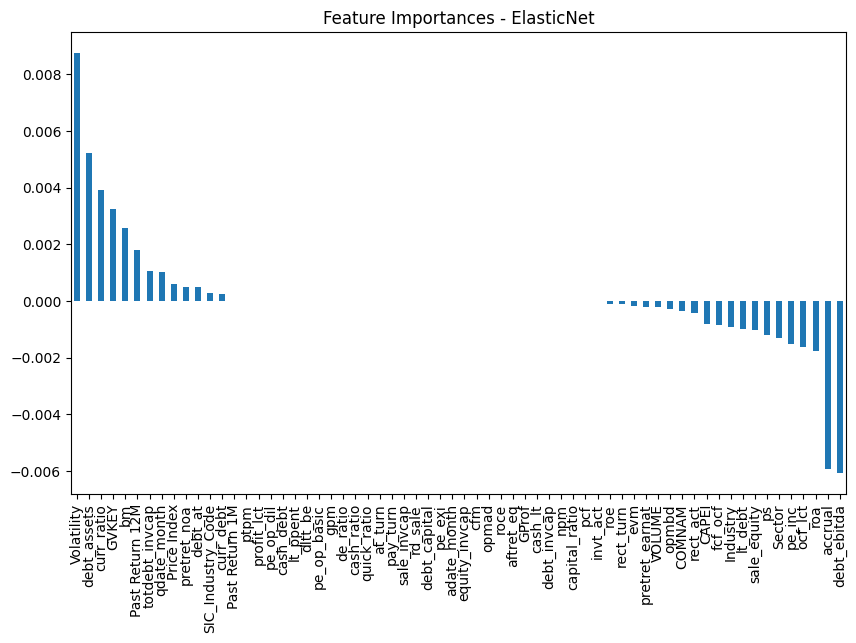

In [ ]:
#Feature Importance Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
importances_enet.plot(kind='bar')
plt.title('Feature Importances - ElasticNet')
plt.show()


In [ ]:
# Actual DataFrame
enet_actual = pd.DataFrame(y_test)
enet_actual

Forward 3M Return
2352            0.069909
2353            0.041919
2354           -0.149379
2355            0.091211
2356            0.411150
...                  ...
76306           0.222458
76307           0.120423
76309          -0.026337
76310           0.180349
76311           0.142469

[3738 rows x 1 columns]

In [ ]:
# Predicted vs. Actual
enet_result = pd.concat([pred_enet_df.reset_index(drop=True), enet_actual.reset_index(drop=True)], axis=1)
print(enet_result)

      Predicted_return_ElasticNet  Forward 3M Return
0                        0.029640           0.069909
1                        0.030351           0.041919
2                        0.034379          -0.149379
3                        0.028019           0.091211
4                        0.028260           0.411150
...                           ...                ...
3733                     0.038903           0.222458
3734                     0.040192           0.120423
3735                     0.032890          -0.026337
3736                     0.037951           0.180349
3737                     0.052528           0.142469

[3738 rows x 2 columns]


In [ ]:
# Get best 50 stocks based on predicted returns
enet_result1 = pd.concat([enet_result.reset_index(drop=True), X_test['GVKEY'].reset_index(drop=True)], axis=1)
enet_result1_sorted = enet_result1.sort_values(by='Predicted_return_ElasticNet', ascending=False).head(10)

print(enet_result1_sorted)


      Predicted_return_ElasticNet  Forward 3M Return     GVKEY
479                      0.265957          -0.180583  145049.0
3466                     0.238422          -0.100944  145049.0
2282                     0.233832          -0.071835  145049.0
218                      0.232696           0.128122  145049.0
3731                     0.231190          -0.154328  145049.0
1492                     0.221668          -0.371387  145049.0
1760                     0.221336           0.122583  145049.0
2028                     0.190890           0.148168  145049.0
3678                     0.175037           0.102624  126296.0
3413                     0.174665           0.114810  126296.0


In [ ]:
# Get worst 50 stocks based on predicted returns
enet_result1 = pd.concat([enet_result.reset_index(drop=True), X_test['GVKEY'].reset_index(drop=True)], axis=1)
enet_result1_sorted = enet_result1.sort_values(by='Predicted_return_ElasticNet', ascending=True).head(10)

print(enet_result1_sorted)


      Predicted_return_ElasticNet  Forward 3M Return   GVKEY
1143                    -0.065443           0.099235  8810.0
887                     -0.065406          -0.050163  8810.0
2734                    -0.056441          -0.211355  9882.0
2471                    -0.042921           0.047031  9882.0
22                      -0.025597          -0.142487  3504.0
2280                    -0.024668          -0.115106  4990.0
215                     -0.024559           0.129953  4990.0
19                      -0.018745           0.086542  3504.0
14                      -0.016530           0.031711  3504.0
21                      -0.015234          -0.093548  3504.0


RANDOM FOREST

In [ ]:
# RandomForest model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()

In [ ]:
# Define the best hyperparameters from the grid search
best_params = {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}

# Create the RandomForestRegressor with the best hyperparameters
rf_model = RandomForestRegressor(**best_params)

# Fit the model on the  training data
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=15, max_features='sqrt', min_samples_split=5,
                      n_estimators=50)

In [ ]:
# Predictions using RandomForest
pred_rf = rf_model.predict(X_test_scaled)
pred_rf

array([0.01878269, 0.02198197, 0.04209634, ..., 0.05836956, 0.05416742,
       0.05571112])

In [ ]:
# RMSE (Root Mean Square Error) for RandomForest
rmse_rf = np.sqrt(mean_squared_error(y_test, pred_rf))
print("\nRandomForest RMSE: ", rmse_rf)


RandomForest RMSE:  0.17241733608724957


In [ ]:
# MAPE (Mean Absolute Percentage Error) for RandomForest
mape_rf = calculate_mape(y_test, pred_rf)
print("\nRandomForest MAPE: {:.2f}%".format(mape_rf))


RandomForest MAPE: 2633.58%


In [ ]:
mean_absolute_percentage_error(y_test, pred_rf)

29.163705010180614

In [ ]:
# Feature importance for RandomForest
importances_rf = pd.Series(rf_model.feature_importances_, index=X_train_scaled.columns)
importances_rf.sort_values(ascending=False, inplace=True)
top_features_rf = importances_rf.nlargest(50).sort_values(ascending=False)

In [ ]:
# Display the top features for RandomForest
print("\nTop Features for RandomForest:\n", top_features_rf)


Top Features for RandomForest:
 adate_month          0.063160
cash_debt            0.045526
rd_sale              0.038179
aftret_eq            0.028508
evm                  0.025992
qdate_month          0.025039
Past Return 12M      0.023181
rect_turn            0.023139
COMNAM               0.019840
Volatility           0.019727
roa                  0.019223
Sector               0.018457
Price Index          0.018268
ps                   0.018137
pe_op_dil            0.016671
lt_ppent             0.016608
roce                 0.016035
VOLUME               0.015899
GVKEY                0.015840
opmbd                0.015750
Industry             0.015197
ptpm                 0.015141
sale_invcap          0.015138
debt_ebitda          0.015068
CAPEI                0.014885
de_ratio             0.014821
SIC_Industry_Code    0.014436
pe_op_basic          0.014396
pe_exi               0.014315
fcf_ocf              0.014210
cfm                  0.014158
Past Return 1M       0.013957
pe_inc 

In [ ]:
# RandomForest Predictions DataFrame
pred_rf_df = pd.DataFrame(pred_rf, columns=['Predicted_return_RandomForest'])
pred_rf_df

Predicted_return_RandomForest
0                          0.018783
1                          0.021982
2                          0.042096
3                          0.039168
4                          0.035201
...                             ...
3733                       0.047230
3734                       0.053286
3735                       0.058370
3736                       0.054167
3737                       0.055711

[3738 rows x 1 columns]

In [ ]:
rf_actual = pd.DataFrame(y_test)
rf_actual

Forward 3M Return
2352            0.069909
2353            0.041919
2354           -0.149379
2355            0.091211
2356            0.411150
...                  ...
76306           0.222458
76307           0.120423
76309          -0.026337
76310           0.180349
76311           0.142469

[3738 rows x 1 columns]

In [ ]:
# Predicted vs. Actual for Random Forest
rf_result = pd.concat([pred_rf_df.reset_index(drop=True), rf_actual.reset_index(drop=True)], axis=1)
print(rf_result)


      Predicted_return_RandomForest  Forward 3M Return
0                          0.018783           0.069909
1                          0.021982           0.041919
2                          0.042096          -0.149379
3                          0.039168           0.091211
4                          0.035201           0.411150
...                             ...                ...
3733                       0.047230           0.222458
3734                       0.053286           0.120423
3735                       0.058370          -0.026337
3736                       0.054167           0.180349
3737                       0.055711           0.142469

[3738 rows x 2 columns]


In [ ]:
# Get best 50 stocks based on predicted returns for Random Forest
rf_result1 = pd.concat([rf_result.reset_index(drop=True), X_test['GVKEY'].reset_index(drop=True)], axis=1)
rf_result1_sorted = rf_result1.sort_values(by='Predicted_return_RandomForest', ascending=False).head(50)

print(rf_result1_sorted)


      Predicted_return_RandomForest  Forward 3M Return     GVKEY
479                        0.896012          -0.180583  145049.0
3678                       0.868526           0.102624  126296.0
3413                       0.863966           0.114810  126296.0
218                        0.725087           0.128122  145049.0
1438                       0.703638           0.217394  126296.0
1706                       0.702981           0.082725  126296.0
2794                       0.686413          -0.214980    7922.0
3053                       0.681800          -0.345441    7922.0
1974                       0.680660          -0.046593  126296.0
3047                       0.614237          -0.090051    6502.0
1170                       0.608696           0.392222    4990.0
2787                       0.595613          -0.171733    6502.0
2282                       0.595273          -0.071835  145049.0
2795                       0.591780          -0.407705    4990.0
657                      

In [ ]:
# Get worst 50 stocks based on predicted returns for Random Forest
rf_result1 = pd.concat([rf_result.reset_index(drop=True), X_test['GVKEY'].reset_index(drop=True)], axis=1)
rf_result1_sorted = rf_result1.sort_values(by='Predicted_return_RandomForest', ascending=True).head(50)

print(rf_result1_sorted)

      Predicted_return_RandomForest  Forward 3M Return     GVKEY
2299                      -0.044495           0.132159  260774.0
234                       -0.041241           0.083681  260774.0
97                        -0.039959           0.107870    8215.0
571                       -0.037514           0.012771    5073.0
132                       -0.034846           0.029759    5073.0
575                       -0.033273          -0.095580    6774.0
68                        -0.032716          -0.000196   34443.0
3116                      -0.032360           0.058174   35168.0
3114                      -0.032356          -0.211899    7637.0
2967                      -0.032333          -0.009824    5073.0
1117                      -0.032011           0.218398    9899.0
861                       -0.031854           0.115933    9899.0
2133                      -0.031269           0.004736   34443.0
2927                      -0.031095          -0.156716    7875.0
2598                     

# LASSO and Ridge Linear Regression Model

Lasso and Ridge are variations of linear regression and incorporate regularization, which is a technique used to prevent overfitting and to handle collinearity in the model.

# *LASSO Model*

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

In [ ]:
# Train the Lasso regression model
lasso = Lasso(alpha=0.001)  # You might need to adjust the alpha value
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.001)

In [ ]:
# Predictions on the test set using Lasso
pred_lasso = lasso.predict(X_test_scaled)

# Display the predictions
print("Predictions using Lasso:")
print(pred_lasso)

Predictions using Lasso:
[0.03067939 0.03132479 0.03483671 ... 0.0346044  0.03821995 0.0499839 ]


In [ ]:
# RMSE (Root Mean Square Error) for Lasso
rmse_lasso = np.sqrt(mean_squared_error(y_test, pred_lasso))
print("\nLasso RMSE: ", rmse_lasso)

# MAPE (Mean Absolute Percentage Error) for Lasso
mape_lasso = mean_absolute_percentage_error(y_test, pred_lasso)
print("\nLasso MAPE: {:.2f}%".format(mape_lasso))



Lasso RMSE:  0.15586194709970191

Lasso MAPE: 25.92%


In [ ]:
# Feature importance for Lasso
importances_lasso = pd.Series(lasso.coef_, index=X_train_scaled.columns)
importances_lasso.sort_values(ascending=False, inplace=True)
top_features_lasso = importances_lasso.nlargest(50).sort_values(ascending=False)

# Display the top features for Lasso model
print("\nTop Features for Lasso:\n", top_features_lasso)


Top Features for Lasso:
 Volatility           0.009145
debt_assets          0.004260
GVKEY                0.002800
curr_ratio           0.001751
bm                   0.001524
Past Return 12M      0.001106
qdate_month          0.000551
roce                -0.000000
cfm                 -0.000000
pe_op_dil            0.000000
opmad               -0.000000
ps                  -0.000000
gpm                 -0.000000
ptpm                -0.000000
pe_exi              -0.000000
roe                 -0.000000
pretret_noa          0.000000
aftret_eq           -0.000000
npm                 -0.000000
curr_debt            0.000000
GProf                0.000000
equity_invcap       -0.000000
debt_invcap          0.000000
totdebt_invcap       0.000000
capital_ratio        0.000000
pe_op_basic         -0.000000
cash_lt              0.000000
lt_debt             -0.000000
Price Index          0.000000
adate_month          0.000000
quick_ratio          0.000000
at_turn              0.000000
profit_lct    

We see that we have only 7 important features. Thanks to regularization. Volatility and debt are top 2 which really makes sense economically. All non important features have zero coefficients. So automatically the model picked significant features for us.

In [ ]:
# Lasso Predictions DataFrame
pred_lasso_df = pd.DataFrame(pred_lasso, columns=['Predicted_return_Lasso'])
pred_lasso_df

Predicted_return_Lasso
0                   0.030679
1                   0.031325
2                   0.034837
3                   0.029399
4                   0.029963
...                      ...
3733                0.038420
3734                0.040326
3735                0.034604
3736                0.038220
3737                0.049984

[3738 rows x 1 columns]

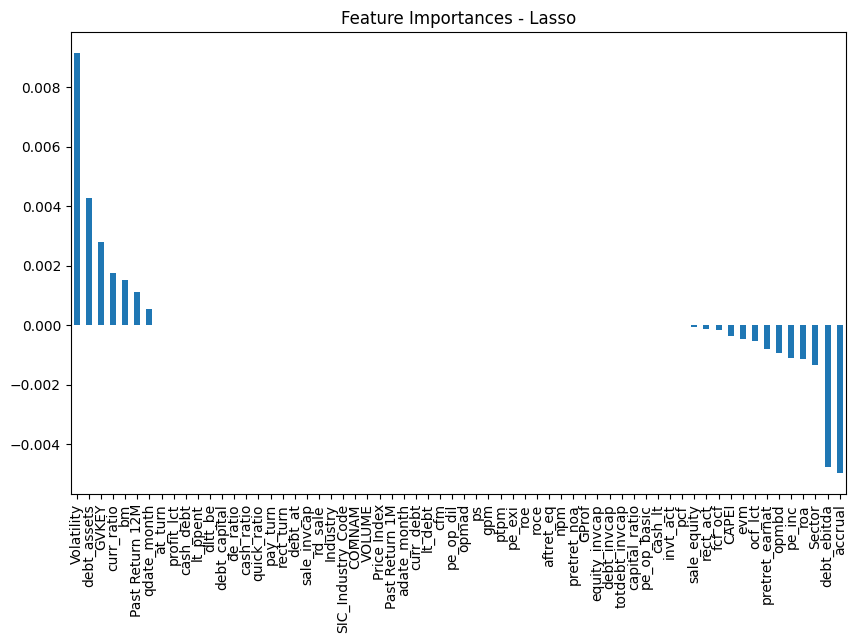

In [ ]:
#Feature Importance Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
importances_lasso.plot(kind='bar')
plt.title('Feature Importances - Lasso')
plt.show()

In [ ]:
# Actual DataFrame
lasso_actual = pd.DataFrame(y_test)
lasso_actual

Forward 3M Return
2352            0.069909
2353            0.041919
2354           -0.149379
2355            0.091211
2356            0.411150
...                  ...
76306           0.222458
76307           0.120423
76309          -0.026337
76310           0.180349
76311           0.142469

[3738 rows x 1 columns]

In [ ]:
# Predicted vs. Actual
lasso_result = pd.concat([pred_lasso_df.reset_index(drop=True), lasso_actual.reset_index(drop=True)], axis=1)
print(lasso_result)

      Predicted_return_Lasso  Forward 3M Return
0                   0.030679           0.069909
1                   0.031325           0.041919
2                   0.034837          -0.149379
3                   0.029399           0.091211
4                   0.029963           0.411150
...                      ...                ...
3733                0.038420           0.222458
3734                0.040326           0.120423
3735                0.034604          -0.026337
3736                0.038220           0.180349
3737                0.049984           0.142469

[3738 rows x 2 columns]


In [ ]:
# Get best 50 stocks based on predicted returns
lasso_result1 = pd.concat([lasso_result.reset_index(drop=True), X_test['GVKEY'].reset_index(drop=True)], axis=1)
lasso_result1_sorted = lasso_result1.sort_values(by='Predicted_return_Lasso', ascending=False).head(10)

print(lasso_result1_sorted)


      Predicted_return_Lasso  Forward 3M Return     GVKEY
479                 0.249371          -0.180583  145049.0
3466                0.227947          -0.100944  145049.0
2282                0.224653          -0.071835  145049.0
218                 0.224118           0.128122  145049.0
3731                0.221582          -0.154328  145049.0
1492                0.216208          -0.371387  145049.0
1760                0.214969           0.122583  145049.0
2028                0.196212           0.148168  145049.0
3678                0.154288           0.102624  126296.0
3413                0.154038           0.114810  126296.0


In [ ]:
# Get worst 50 stocks based on predicted returns
lasso_result1 = pd.concat([lasso_result.reset_index(drop=True), X_test['GVKEY'].reset_index(drop=True)], axis=1)
lasso_result1_sorted = lasso_result1.sort_values(by='Predicted_return_Lasso', ascending=True).head(10)

print(lasso_result1_sorted)

      Predicted_return_Lasso  Forward 3M Return   GVKEY
887                -0.050525          -0.050163  8810.0
1143               -0.049307           0.099235  8810.0
2734               -0.043373          -0.211355  9882.0
2471               -0.029078           0.047031  9882.0
2280               -0.015323          -0.115106  4990.0
215                -0.014272           0.129953  4990.0
22                 -0.012064          -0.142487  3504.0
19                 -0.005913           0.086542  3504.0
14                 -0.004508           0.031711  3504.0
20                 -0.004195          -0.003148  3504.0


## *HP of Lasso Model*

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [ ]:
# Creating a dictionary of hyperparameters to search
# Adjust the range of alpha values to suit your needs
parameters = {'alpha': [0.001, 0.005, 0.01]}

In [ ]:
# Setting up Grid Search with Cross-Validation
lasso_grid_search = GridSearchCV(lasso, parameters, cv=5)

In [ ]:
# Fitting the grid search
lasso_grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Lasso(alpha=0.001),
             param_grid={'alpha': [0.001, 0.005, 0.01]})

In [ ]:
# Best hyperparameter value
best_alpha = lasso_grid_search.best_params_['alpha']

In [ ]:
# Best model based on grid search
best_lasso_model = lasso_grid_search.best_estimator_

In [ ]:
# Evaluate the best model on the test set
pred_HPlasso = best_lasso_model.predict(X_test_scaled)
rmse_lasso = np.sqrt(mean_squared_error(y_test, pred_HPlasso))

print("Best Alpha:", best_alpha)
print("Test RMSE of Best Model:", rmse)

Best Alpha: 0.001
Test RMSE of Best Model: 0.157


# *Ridge Model*

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

In [ ]:
# Train the Ridge regression model
ridge = Ridge(alpha=1.0)  # Alpha is the regularization strength
ridge.fit(X_train_scaled, y_train)


Ridge()

In [ ]:
# Predictions on the test set using Ridge
pred_ridge = ridge.predict(X_test_scaled)

# Display the predictions
print("Predictions using Ridge:")
print(pred_ridge)


Predictions using Ridge:
[0.02280834 0.02462081 0.03006907 ... 0.03429623 0.04171694 0.05894399]


In [ ]:
# RMSE (Root Mean Square Error) for Ridge
rmse_ridge = np.sqrt(mean_squared_error(y_test, pred_ridge))
print("\nRidge RMSE: ", rmse_ridge)

# MAPE (Mean Absolute Percentage Error) for Ridge
mape_ridge = mean_absolute_percentage_error(y_test, pred_ridge)
print("\nRidge MAPE: {:.2f}%".format(mape_ridge))



Ridge RMSE:  0.15651669012475472

Ridge MAPE: 22.60%


In [ ]:
# Feature importance for Ridge
importances_ridge = pd.Series(ridge.coef_, index=X_train_scaled.columns)
importances_ridge.sort_values(ascending=False, inplace=True)
top_features_ridge = importances_ridge.nlargest(50).sort_values(ascending=False)

# Display the top features for Ridge model
print("\nTop Features for Ridge:\n", top_features_ridge)


Top Features for Ridge:
 Industry             0.047871
curr_ratio           0.016650
debt_invcap          0.016631
debt_assets          0.016422
debt_at              0.008924
Volatility           0.008108
profit_lct           0.007875
npm                  0.007300
at_turn              0.006570
totdebt_invcap       0.005052
bm                   0.004686
pe_op_dil            0.004500
GVKEY                0.003981
cash_ratio           0.003696
Past Return 12M      0.002532
curr_debt            0.001999
roce                 0.001844
qdate_month          0.001523
Price Index          0.001490
gpm                  0.001477
dltt_be              0.001416
cash_debt            0.001375
pretret_earnat       0.001229
SIC_Industry_Code    0.001226
rd_sale              0.001146
pretret_noa          0.000949
adate_month          0.000838
ptpm                 0.000811
aftret_eq            0.000472
rect_act             0.000470
evm                  0.000314
pcf                  0.000187
roe           

In [ ]:
pred_ridge_df = pd.DataFrame(pred_ridge, columns=['Predicted_return_Ridge'])
pred_ridge_df

Predicted_return_Ridge
0                   0.022808
1                   0.024621
2                   0.030069
3                   0.021766
4                   0.023292
...                      ...
3733                0.042526
3734                0.045699
3735                0.034296
3736                0.041717
3737                0.058944

[3738 rows x 1 columns]

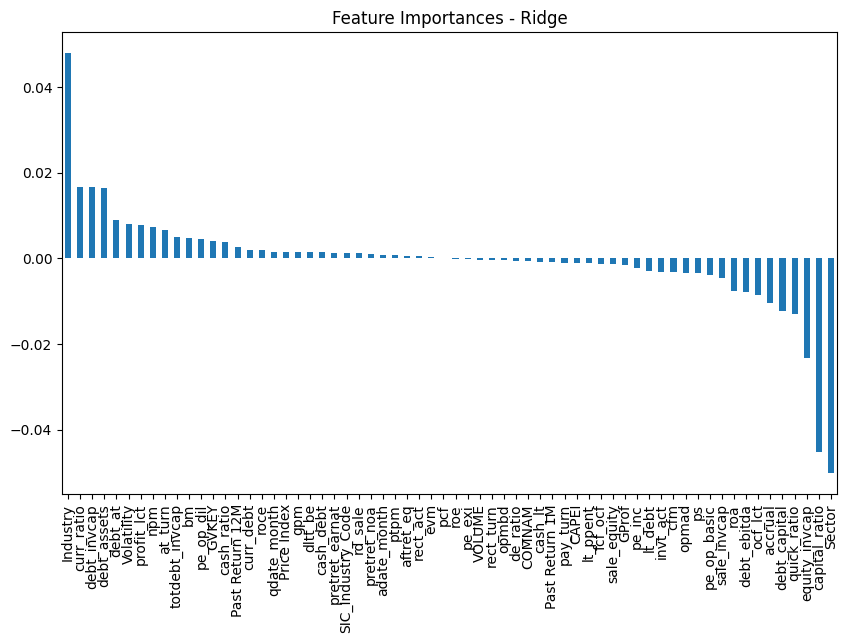

In [ ]:
#Feature Importance Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
importances_ridge.plot(kind='bar')
plt.title('Feature Importances - Ridge')
plt.show()

The above features make sense economically. For example, we see if capital_ratio (debt) goes up return goes down. So, higher magnitude shows features that have the highest influence on predicted 3 month return.

In [ ]:
# Actual DataFrame
ridge_actual = pd.DataFrame(y_test)
ridge_actual

Forward 3M Return
2352            0.069909
2353            0.041919
2354           -0.149379
2355            0.091211
2356            0.411150
...                  ...
76306           0.222458
76307           0.120423
76309          -0.026337
76310           0.180349
76311           0.142469

[3738 rows x 1 columns]

In [ ]:
# Predicted vs. Actual
ridge_result = pd.concat([pred_ridge_df.reset_index(drop=True), ridge_actual.reset_index(drop=True)], axis=1)
print(ridge_result)

      Predicted_return_Ridge  Forward 3M Return
0                   0.022808           0.069909
1                   0.024621           0.041919
2                   0.030069          -0.149379
3                   0.021766           0.091211
4                   0.023292           0.411150
...                      ...                ...
3733                0.042526           0.222458
3734                0.045699           0.120423
3735                0.034296          -0.026337
3736                0.041717           0.180349
3737                0.058944           0.142469

[3738 rows x 2 columns]


In [ ]:
# Get best 50 stocks based on predicted returns
ridge_result1 = pd.concat([ridge_result.reset_index(drop=True), X_test['GVKEY'].reset_index(drop=True)], axis=1)
ridge_result1_sorted = ridge_result1.sort_values(by='Predicted_return_Ridge', ascending=False).head(50)

print(ridge_result1_sorted)

      Predicted_return_Ridge  Forward 3M Return     GVKEY
479                 0.295647          -0.180583  145049.0
2282                0.256127          -0.071835  145049.0
3466                0.256064          -0.100944  145049.0
3731                0.246256          -0.154328  145049.0
218                 0.246220           0.128122  145049.0
1760                0.233230           0.122583  145049.0
1492                0.229364          -0.371387  145049.0
3413                0.197222           0.114810  126296.0
3678                0.194392           0.102624  126296.0
2028                0.189216           0.148168  145049.0
598                 0.171094          -0.081593   10795.0
2994                0.165683          -0.264959   10795.0
1458                0.156538           0.045375    8810.0
1726                0.156419           0.057096    8810.0
1994                0.155972           0.055124    8810.0
202                 0.154874           0.171093    4611.0
2267          

In [ ]:
# Get worst 50 stocks based on predicted returns
ridge_result1 = pd.concat([ridge_result.reset_index(drop=True), X_test['GVKEY'].reset_index(drop=True)], axis=1)
ridge_result1_sorted = ridge_result1.sort_values(by='Predicted_return_Ridge', ascending=True).head(50)

print(ridge_result1_sorted)

      Predicted_return_Ridge  Forward 3M Return     GVKEY
1143               -0.092895           0.099235    8810.0
887                -0.092015          -0.050163    8810.0
2734               -0.075599          -0.211355    9882.0
2471               -0.062749           0.047031    9882.0
22                 -0.035707          -0.142487    3504.0
215                -0.033469           0.129953    4990.0
2280               -0.032385          -0.115106    4990.0
19                 -0.027977           0.086542    3504.0
14                 -0.027025           0.031711    3504.0
15                 -0.026078           0.026552    3504.0
21                 -0.024176          -0.093548    3504.0
20                 -0.024166          -0.003148    3504.0
17                 -0.020487          -0.164718    3504.0
2292               -0.018002           0.100412    7163.0
18                 -0.017393           0.013621    3504.0
228                -0.017150           0.165536    7163.0
2254          

 **Ridge Regression:**

RMSE: 0.1565242615963441

MAPE: 2252%

**Lasso Regression:**

Lasso RMSE:  0.15586194709970191

Lasso MAPE: 2592%

The Lasso model shows a slightly better performance in terms of RMSE, suggesting that its predictions are closer to the actual values when considering the magnitude of errors.
However, the Ridge model performs better in terms of MAPE, indicating that its predictions are proportionally closer to the actual values.

#4 WINDOWS, we will use RIDGE model as our main model for all 4 windows

#1st window TRAIN: 2003-2006, TEST 2007

In [ ]:
df_test1 = df[df['pubdate_year']==2007]
df_test1

public_date   CAPEI     bm     evm  pe_op_basic  pe_op_dil  pe_exi  \
333    2007-01-31  48.444  0.491  15.758       25.889     26.954  26.954   
334    2007-02-28  43.797  0.538  13.426       23.036     23.727  23.727   
335    2007-04-30  42.283  0.538  13.426       22.240     22.908  22.908   
336    2007-05-31  33.795  0.554  11.747       22.011     22.551  22.551   
337    2007-07-31  30.106  0.554  11.747       19.608     20.089  20.089   
...           ...     ...    ...     ...          ...        ...     ...   
72977  2007-07-31  24.569  0.609   9.590        9.932      9.979  10.074   
72978  2007-08-31  20.545  0.613   9.270        9.023      9.081  16.133   
72979  2007-10-31  22.100  0.613   9.270        9.707      9.769  17.354   
72980  2007-11-30  21.025  0.550   9.884       10.734     10.808   6.214   
72981  2007-12-31  21.122  0.550   9.884       10.784     10.858   6.243   

       pe_inc     ps     pcf    npm  opmbd  opmad    gpm   ptpm    cfm    roa  \
333    11.768  3.617  21.756  0.145  0.264  0.234  0.264  0.241  0.182  0.111   
334    23.782  3.176  31.994  0.147  0.266  0.236  0.266  0.241  0.183  0.122   
335    22.961  3.066  30.888  0.147  0.266  0.236  0.266  0.241  0.183  0.122   
336    22.551  3.065  14.705  0.149  0.269  0.237  0.269  0.240  0.195  0.124   
337    20.089  2.731  13.099  0.149  0.269  0.237  0.269  0.240  0.195  0.124   
...       ...    ...     ...    ...    ...    ...    ...    ...    ...    ...   
72977  11.412  1.838   6.973  0.093  0.311  0.211  0.311  0.158  0.205  0.100   
72978  24.762  1.523   6.218  0.058  0.324  0.224  0.324  0.101  0.169  0.106   
72979  26.637  1.638   6.689  0.058  0.324  0.224  0.324  0.101  0.169  0.106   
72980   7.081  1.709   9.700  0.164  0.299  0.203  0.299  0.275  0.271  0.097   
72981   7.114  1.717   9.745  0.164  0.299  0.203  0.299  0.275  0.271  0.097   

         roe   roce  aftret_eq  pretret_noa  pretret_earnat  GProf  \
333    0.105  0.144      0.109        0.783           0.257  0.108   
334    0.100  0.139      0.105        1.080           0.416  0.121   
335    0.100  0.139      0.105        1.080           0.416  0.121   
336    0.098  0.139      0.104        1.025           0.419  0.122   
337    0.098  0.139      0.104        1.025           0.419  0.122   
...      ...    ...        ...          ...             ...    ...   
72977  0.083  0.108      0.118        0.129           0.090  0.101   
72978  0.051  0.114      0.072        0.139           0.097  0.108   
72979  0.051  0.114      0.072        0.139           0.097  0.108   
72980  0.139  0.100      0.200        0.123           0.087  0.103   
72981  0.139  0.100      0.200        0.123           0.087  0.103   

       equity_invcap  debt_invcap  totdebt_invcap  capital_ratio  cash_lt  \
333            0.831        0.161           0.176          0.162    0.399   
334            0.841        0.159           0.168          0.159    0.380   
335            0.841        0.159           0.168          0.159    0.380   
336            0.855        0.145           0.145          0.145    0.476   
337            0.855        0.145           0.145          0.145    0.476   
...              ...          ...             ...            ...      ...   
72977          0.461        0.529           0.685          0.530    0.003   
72978          0.469        0.521           0.696          0.522    0.003   
72979          0.469        0.521           0.696          0.522    0.003   
72980          0.455        0.534           0.686          0.534    0.006   
72981          0.455        0.534           0.686          0.534    0.006   

       invt_act  rect_act  debt_at  debt_ebitda  curr_debt  lt_debt  \
333       0.000     0.353    0.135        1.247      0.446    0.345   
334       0.000     0.376    0.131        1.081      0.414    0.360   
335       0.000     0.376    0.131        1.081      0.414    0.360   
336       0.000     0.356    0.116        0.952      0.428    0.362   

In [ ]:
df_train1 = df[df['pubdate_year']<2007]
df_train1

public_date    CAPEI     bm       evm  pe_op_basic  pe_op_dil  pe_exi  \
164    2004-03-31  -31.594  0.491 -1933.600      -34.437    -34.437 -19.244   
165    2004-03-31  148.673  0.373    19.351       40.548     40.904  37.911   
166    2004-03-31   56.806  0.215     9.621       29.840     30.302  36.533   
185    2004-03-31   22.080  0.442     9.420       21.662     21.761  21.761   
186    2004-03-31   20.492  0.551     9.501       22.408     22.408  22.408   
...           ...      ...    ...       ...          ...        ...     ...   
72968  2006-06-30   24.638  0.690    11.451       11.298     11.366  11.366   
72969  2006-07-31   25.853  0.690    11.451       11.855     11.927  11.927   
72970  2006-08-31   26.363  0.663    12.186       14.525     14.578  14.578   
72971  2006-10-31   26.726  0.663    12.186       14.725     14.779  14.779   
72972  2006-11-30   25.692  0.710     9.200        8.814      8.853   8.853   

       pe_inc     ps     pcf    npm  opmbd  opmad    gpm   ptpm    cfm    roa  \
164   -20.511  0.836  16.367 -0.042  0.000 -0.032  0.030 -0.042 -0.010  0.000   
165    40.548  5.811  34.690  0.159  0.368  0.193  0.445  0.277  0.334  0.112   
166    40.299  3.551  13.732  0.089  0.477  0.372  0.516  0.264  0.201  0.237   
185    24.968  1.674   9.326  0.077  0.214  0.118  0.298  0.107  0.173  0.174   
186    24.168  1.298   8.015  0.059  0.185  0.104  0.257  0.083  0.141  0.138   
...       ...    ...     ...    ...    ...    ...    ...    ...    ...    ...   
72968  11.401  1.427  10.848  0.063  0.217  0.138  0.217  0.093  0.149  0.078   
72969  11.963  1.498  11.384  0.063  0.217  0.138  0.217  0.093  0.149  0.078   
72970  14.421  1.561   8.695  0.054  0.208  0.127  0.208  0.081  0.145  0.073   
72971  14.619  1.582   8.815  0.054  0.208  0.127  0.208  0.081  0.145  0.073   
72972   8.814  1.635   7.909  0.092  0.281  0.194  0.281  0.145  0.189  0.094   

         roe   roce  aftret_eq  pretret_noa  pretret_earnat  GProf  \
164   -0.204 -0.139     -0.227       -0.074          -0.046  0.028   
165    0.072  0.079      0.080        0.131           0.113  0.129   
166    0.173  0.332      0.490        0.230           0.198  0.242   
185    0.107  0.128      0.128        0.140           0.119  0.237   
186    0.082  0.096      0.091        0.125           0.109  0.189   
...      ...    ...        ...          ...             ...    ...   
72968  0.075  0.088      0.109        0.099           0.066  0.077   
72969  0.075  0.088      0.109        0.099           0.066  0.077   
72970  0.062  0.079      0.090        0.089           0.059  0.072   
72971  0.062  0.079      0.090        0.089           0.059  0.072   
72972  0.101  0.114      0.146        0.131           0.087  0.096   

       equity_invcap  debt_invcap  totdebt_invcap  capital_ratio  cash_lt  \
164            0.919        0.000           0.101          0.000    0.105   
165            0.857        0.103           0.125          0.107    0.440   
166            0.255        0.683           0.733          0.728    0.133   
185            0.720        0.243           0.354          0.252    0.242   
186            0.612        0.388           0.395          0.388    0.104   
...              ...          ...             ...            ...      ...   
72968          0.404        0.586           0.706          0.586    0.009   
72969          0.404        0.586           0.706          0.586    0.009   
72970          0.409        0.581           0.704          0.581    0.009   
72971          0.409        0.581           0.704          0.581    0.009   
72972          0.439        0.552           0.694          0.552    0.003   

       invt_act  rect_act  debt_at  debt_ebitda  curr_debt  lt_debt  \
164       0.647     0.049    0.028      -83.333      0.349    0.000   
165       0.201     0.038    0.098        0.910      0.251    0.267   
166       0.361     0.179    0.472        2.114      0.168    0.553   
185       0.209     0.343    0.244

In [ ]:
# Split the datasets into target
y_train1 = df_train1['Forward 3M Return']
X_train1 = df_train1.drop(['Forward 3M Return'], axis=1)

print(X_train1.shape)
print(y_train1.shape)

(6923, 67)
(6923,)


In [ ]:
y_test1 = df_test1['Forward 3M Return']
X_test1 = df_test1.drop(['Forward 3M Return'], axis=1)

print(X_test1.shape)
print(y_test1.shape)

(2623, 67)
(2623,)


In [ ]:
X_test_scaled1= pd.DataFrame(normalize_by_group(X_test1, 'public_date'))
X_test_scaled1 = X_test_scaled1.drop(['pubdate_month','pubdate_year'], axis=1)

X_test_scaled1

CAPEI        bm       evm  pe_op_basic  pe_op_dil    pe_exi  \
333   -0.043221  0.272202  0.465482     0.063937   0.080661  0.100732   
334    0.024106  0.581020  0.125303     0.002000   0.003777  0.065440   
335   -0.009842  0.588749  0.118963    -0.034517  -0.033487 -0.017972   
336   -0.041723  0.712920 -0.004027     0.041773   0.032339  0.022910   
337   -0.072554  0.730018  0.000615    -0.014226  -0.023964  0.031070   
...         ...       ...       ...          ...        ...       ...   
72977 -0.131965  0.964322 -0.281000    -0.391855  -0.402970 -0.024092   
72978 -0.118227  0.991849 -0.265204    -0.391825  -0.393626 -0.058776   
72979 -0.070976  0.961623 -0.262940    -0.375588  -0.375775 -0.045533   
72980 -0.033891  0.584436 -0.096974    -0.323035  -0.338425 -0.484236   
72981 -0.160260  0.556753 -0.106356    -0.322637  -0.338188 -0.446463   

         pe_inc        ps       pcf       npm     opmbd     opmad       gpm  \
333   -0.247986  0.409277  0.247709  0.709002  0.684133  0.918689 -0.619211   
334    0.100696  0.316068  0.729176  0.536533  0.559974  0.667696 -0.507750   
335    0.011369  0.228142  0.543205  0.539174  0.550574  0.657178 -0.509415   
336   -0.068595  0.261558 -0.150492  0.497928  0.519961  0.606371 -0.468201   
337   -0.062913  0.191079 -0.160436  0.496286  0.517671  0.604948 -0.469602   
...         ...       ...       ...       ...       ...       ...       ...   
72977 -0.187270 -0.139789 -0.444560  0.136726  0.787553  0.438187 -0.283797   
72978  0.108050 -0.240086 -0.387841 -0.109552  0.867896  0.524765 -0.228358   
72979  0.120325 -0.229196 -0.409426 -0.109249  0.866171  0.523519 -0.227492   
72980 -0.401930 -0.183632 -0.326361  0.656434  0.697947  0.385739 -0.350677   
72981 -0.364420 -0.170296 -0.334346  0.653656  0.695692  0.382559 -0.351014   

           ptpm       cfm       roa       roe      roce  aftret_eq  \
333    1.003028  0.488544 -0.633127 -0.319537 -0.417327  -0.255771   
334    0.800985  0.441433 -0.536283 -0.339415 -0.426059  -0.366431   
335    0.807039  0.444171 -0.535153 -0.338222 -0.423314  -0.365344   
336    0.717341  0.470365 -0.491213 -0.211440 -0.377266  -0.058264   
337    0.715660  0.468855 -0.492607 -0.213575 -0.379001  -0.059359   
...         ...       ...       ...       ...       ...        ...   
72977  0.243808  0.533373 -0.720791 -0.253212 -0.525419  -0.044257   
72978 -0.103433  0.304195 -0.689066 -0.200454 -0.422295  -0.146991   
72979 -0.103858  0.304502 -0.686420 -0.199345 -0.420376  -0.146425   
72980  0.998631  1.038352 -0.796470 -0.105398 -0.528076   0.060964   
72981  0.996377  1.036435 -0.813118 -0.108118 -0.535575   0.060170   

       pretret_noa  pretret_earnat     GProf  equity_invcap  debt_invcap  \
333      -0.040076        0.190060 -1.167052       0.712427    -0.705841   
334       0.277204        1.179619 -1.095969       0.756961    -0.714463   
335       0.335167        1.158422 -1.091397       0.764025    -0.722273   
336       0.362022        1.070379 -1.067458       0.853395    -0.815666   
337       0.264826        1.073739 -1.069794       0.855725    -0.818678   
...            ...             ...       ...            ...          ...   
72977    -0.282244       -0.825089 -1.160349      -1.005429     1.044988   
72978     0.045757       -0.759542 -1.144603      -0.930613     0.973533   
72979     0.050728       -0.758190 -1.142051      -0.926741     0.968764   
72980    -0.024888       -0.815731 -1.178950      -0.839785     0.868286   
72981    -0.025239       -0.828717 -1.177834      -0.833359     0.861701   

       totdebt_invcap  capital_ratio   cash_lt  invt_act  rect_act   debt_at  \
333         -0.799064      -0.705724  0.161336 -1.286446  0.076237 -0.660075   
334         -0.813311      -0.719690  0.106073 -1.297237  0.194302 -0.645718   
335         -0.823673      -0.727701  0.102670 -1.308420  0.193643 -0.651456   
336         -0.965699      -0.824532  0.355956 -1.300475  0.089773 -0.812863   
337         -0.963863      -0.

In [ ]:
X_train_scaled1= pd.DataFrame(normalize_by_group(X_train1, 'public_date'))
X_train_scaled1 = X_train_scaled1.drop(['pubdate_month','pubdate_year'], axis=1)

X_train_scaled1

CAPEI        bm        evm  pe_op_basic  pe_op_dil    pe_exi  \
164   -0.331920  0.157917 -15.085048    -1.199230  -1.185994 -0.638765   
165    0.568252 -0.216500   0.084590     0.434121   0.421543  0.272836   
166    0.109510 -0.717838   0.009012     0.200875   0.195330  0.250857   
185   -0.063896  0.002439   0.007450     0.022739   0.013092  0.015249   
186   -0.071826  0.348299   0.008079     0.038989   0.026897  0.025569   
...         ...       ...        ...          ...        ...       ...   
72968 -0.110465  1.034456  -0.040872    -0.130812  -0.139520 -0.297509   
72969 -0.103474  1.024021  -0.040685    -0.137857  -0.146719 -0.264277   
72970 -0.104122  0.869154  -0.025134    -0.156577  -0.164699 -0.111190   
72971 -0.114217  0.869802  -0.024196    -0.176526  -0.188720 -0.131763   
72972 -0.106175  1.058777  -0.317393    -0.444389  -0.455900 -0.427789   

         pe_inc        ps       pcf       npm     opmbd     opmad       gpm  \
164   -0.767768 -0.450349  0.023819 -0.839287 -1.822088 -1.970775 -1.832351   
165    0.330556  1.366412  1.070926  0.778733  1.918267  0.727997  0.396880   
166    0.326077  0.541110 -0.126764  0.215243  3.026143  2.875020  0.778267   
185    0.050304 -0.144330 -0.378555  0.118645  0.353010 -0.171594 -0.392751   
186    0.035914 -0.281637 -0.453475 -0.026252  0.058253 -0.339517 -0.612989   
...         ...       ...       ...       ...       ...       ...       ...   
72968 -0.308204 -0.250446 -0.221017 -0.211809  0.282569 -0.057958 -0.819883   
72969 -0.270957 -0.207918 -0.177330 -0.208831  0.282859 -0.057592 -0.820471   
72970 -0.136662 -0.192872 -0.133615 -0.285611  0.194869 -0.188857 -0.882126   
72971 -0.157285 -0.216160 -0.191552 -0.282636  0.196951 -0.186993 -0.893838   
72972 -0.330544 -0.208852 -0.199647  0.108651  0.839102  0.492776 -0.534146   

           ptpm       cfm       roa       roe      roce  aftret_eq  \
164   -0.987559 -0.940030 -2.081331 -1.523643 -2.772987  -1.484811   
165    1.281228  1.694671 -0.639297 -0.346230 -0.921562  -0.344666   
166    1.188770  0.676022  0.970115  0.084635  1.227111   1.178004   
185    0.072157  0.461570  0.158972 -0.196920 -0.505415  -0.166402   
186   -0.098536  0.216481 -0.304539 -0.303570 -0.777184  -0.303813   
...         ...       ...       ...       ...       ...        ...   
72968 -0.252885  0.243780 -0.992145 -0.561114 -0.802780  -0.343800   
72969 -0.249561  0.245211 -0.992674 -0.559441 -0.804023  -0.342568   
72970 -0.345581  0.191299 -1.025261 -0.585005 -0.836208  -0.350322   
72971 -0.343731  0.191863 -1.026118 -0.580435 -0.835840  -0.349309   
72972  0.164611  0.556499 -0.814090 -0.349734 -0.598173  -0.140154   

       pretret_noa  pretret_earnat     GProf  equity_invcap  debt_invcap  \
164      -0.199678       -1.609238 -1.472261       1.252825    -1.619357   
165      -0.127476       -0.578145 -1.033130       0.967705    -1.130017   
166      -0.092608       -0.026932 -0.541824      -1.800725     1.625490   
185      -0.124306       -0.539236 -0.563564       0.337680    -0.464894   
186      -0.129590       -0.604084 -0.772260      -0.158982     0.223982   
...            ...             ...       ...            ...          ...   
72968    -0.173536       -1.001141 -1.278735      -1.235844     1.316334   
72969    -0.175154       -1.005328 -1.275892      -1.234346     1.313630   
72970    -0.196350       -1.065190 -1.306707      -1.233977     1.302326   
72971    -0.197455       -1.063276 -1.312372      -1.244871     1.310055   
72972    -0.082310       -0.900399 -1.220627      -1.111537     1.171774   

       totdebt_invcap  capital_ratio   cash_lt  invt_act  rect_act   debt_at  \
164         -1.258822      -1.611467 -0.351895  1.764952 -1.696964 -1.528526   
165         -1.154936      -1.110492  0.534184 -0.374093 -1.757076 -1.034561   
166          1.476833       1.797035 -0.277835  0.393277 -0.986557  1.604621   
185         -0.163694      -0.431601  0.010471 -0.335725 -0.090351 -0.004292   
186          0.013

In [ ]:
# Train the Ridge regression model
ridge = Ridge(alpha=1.0)  # Alpha is the regularization strength
ridge.fit(X_train_scaled1, y_train1)


Ridge()

In [ ]:
# Predictions on the test set using Ridge
pred_ridge = ridge.predict(X_test_scaled1)

# Display the predictions
print("Predictions using Ridge:")
print(pred_ridge)


Predictions using Ridge:
[0.03484405 0.05139714 0.04955901 ... 0.02058097 0.01114967 0.01193677]


In [ ]:
# RMSE (Root Mean Square Error) for Ridge
rmse_ridge = np.sqrt(mean_squared_error(y_test1, pred_ridge))
print("\nRidge RMSE: ", rmse_ridge)

# MAPE (Mean Absolute Percentage Error) for Ridge
mape_ridge = mean_absolute_percentage_error(y_test1, pred_ridge)
print("\nRidge MAPE: {:.2f}%".format(mape_ridge))



Ridge RMSE:  0.16029716045827963

Ridge MAPE: 72.73%


In [ ]:
# Feature importance for Ridge
importances_ridge = pd.Series(ridge.coef_, index=X_train_scaled1.columns)
importances_ridge.sort_values(ascending=False, inplace=True)
top_features_ridge = importances_ridge.nlargest(50).sort_values(ascending=False)

# Display the top features for Ridge model
print("\nTop Features for Ridge:\n", top_features_ridge)


Top Features for Ridge:
 Sector               0.084907
pe_op_dil            0.053001
debt_invcap          0.025797
debt_assets          0.021994
Price Index          0.020860
opmad                0.016649
bm                   0.015198
curr_ratio           0.012308
cfm                  0.009953
Volatility           0.008873
evm                  0.007704
GVKEY                0.007685
dltt_be              0.006639
cash_lt              0.006406
at_turn              0.006096
SIC_Industry_Code    0.005874
roa                  0.005059
roe                  0.004787
adate_month          0.003650
ocf_lct              0.003575
rd_sale              0.002882
fcf_ocf              0.002798
cash_debt            0.002384
pretret_earnat       0.002334
pcf                  0.002140
accrual              0.001974
rect_act             0.001917
COMNAM               0.001557
npm                  0.001281
invt_act             0.001251
gpm                  0.001213
sale_invcap          0.001165
pretret_noa   

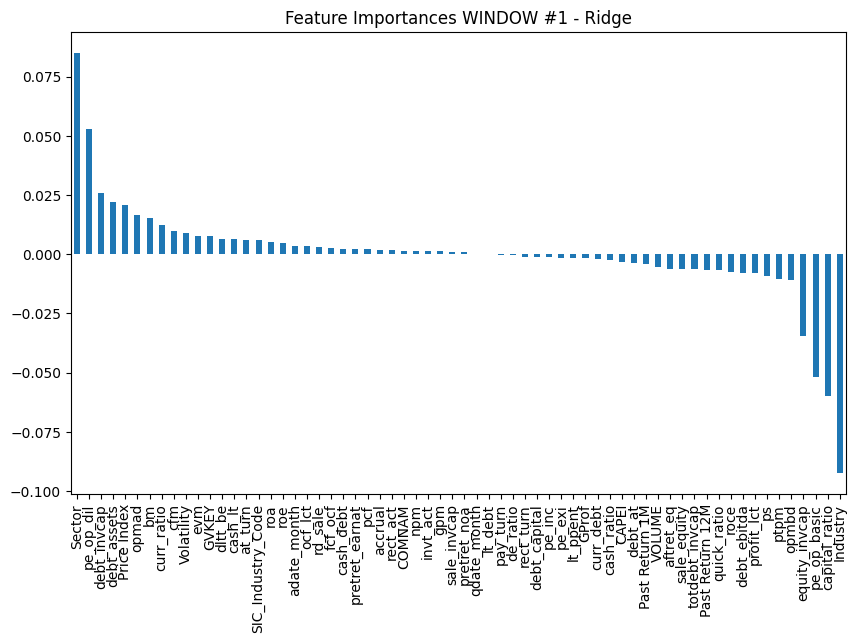

In [ ]:
#Feature Importance Plot
plt.figure(figsize=(10, 6))
importances_ridge.plot(kind='bar')
plt.title('Feature Importances WINDOW #1 - Ridge')
plt.show()

Differnet features are important now. For example Sector now is #1 positive (it was #1 negative before) and the same with Industry.

In [ ]:
# Actual DataFrame
ridge_actual = pd.DataFrame(y_test1)
#Predicted
pred_ridge_df = pd.DataFrame(pred_ridge, columns=['Predicted_return_Ridge'])

In [ ]:
# Predicted vs. Actual
ridge_result = pd.concat([pred_ridge_df.reset_index(drop=True), ridge_actual.reset_index(drop=True)], axis=1)
print(ridge_result)

      Predicted_return_Ridge  Forward 3M Return
0                   0.034844          -0.051873
1                   0.051397          -0.014452
2                   0.049559          -0.090437
3                   0.042118          -0.138554
4                   0.038388          -0.075820
...                      ...                ...
2618                0.020068           0.097052
2619                0.020968           0.118220
2620                0.020581          -0.053593
2621                0.011150          -0.145988
2622                0.011937          -0.130793

[2623 rows x 2 columns]


In [ ]:
# Get best 50 stocks based on predicted returns
ridge_result1 = pd.concat([ridge_result.reset_index(drop=True), X_test1['GVKEY'].reset_index(drop=True)], axis=1)
ridge_result1_sorted = ridge_result1.sort_values(by='Predicted_return_Ridge', ascending=False).head(50)

print(ridge_result1_sorted)

      Predicted_return_Ridge  Forward 3M Return     GVKEY
872                 0.399648           0.128393   24316.0
2301                0.399624           0.061519   24316.0
1317                0.394911           0.137144   24316.0
1522                0.394354           0.676943   24316.0
2175                0.389514          -0.043999   24316.0
513                 0.384715          -0.033400   24316.0
2564                0.374955          -0.202981   24316.0
1889                0.372301          -0.432942   24316.0
298                 0.313886           0.119650   62984.0
1041                0.309740           0.002888   24316.0
1398                0.242431           0.085183   10795.0
748                 0.229456           0.209119   10795.0
1856                0.192542           0.938817  260778.0
2149                0.177188           0.011152  139665.0
2539                0.174343          -0.021800  139665.0
2531                0.163441          -0.081585  260778.0
1175          

In [ ]:
# Get worst 50 stocks based on predicted returns
ridge_result1 = pd.concat([ridge_result.reset_index(drop=True), X_test1['GVKEY'].reset_index(drop=True)], axis=1)
ridge_result1_sorted = ridge_result1.sort_values(by='Predicted_return_Ridge', ascending=True).head(50)

print(ridge_result1_sorted)

      Predicted_return_Ridge  Forward 3M Return     GVKEY
87                 -0.086572          -0.452574   23812.0
2546               -0.085226          -0.145352   16721.0
2156               -0.076158          -0.158391   16721.0
2336               -0.072316          -0.205382   23812.0
1580               -0.065314           0.119219   23812.0
595                -0.062304          -0.164179    5234.0
1605               -0.059218           0.039408    5234.0
647                -0.056822          -0.132799   23812.0
570                -0.050680          -0.078182   23812.0
1946               -0.050408          -0.092286   23812.0
91                 -0.048326          -0.088840   24856.0
1101               -0.048307           0.156652   24856.0
1097               -0.043399           0.131048   23812.0
2053               -0.026283          -0.336309   13440.0
929                -0.023563           0.477501   23812.0
369                -0.022999           0.038400    9899.0
1056          

#2nd window TRAIN: 2008-2011:, TEST 2012

In [ ]:
df_test2 = df[df['pubdate_year']==2012]
df_test2


public_date   CAPEI     bm     evm  pe_op_basic  pe_op_dil  pe_exi  \
68     2012-07-31   8.287  0.738   5.641        4.397      4.416   3.779   
69     2012-07-31  23.787  0.597  10.164       38.670     38.336  40.063   
70     2012-07-31  48.160  0.541   4.460        7.941      7.979   8.418   
88     2012-07-31  68.520  0.805  19.473      -99.333    -99.333 -74.500   
89     2012-07-31  14.763  0.349   8.174       13.696     13.849  14.045   
...           ...     ...    ...     ...          ...        ...     ...   
73019  2012-07-31  15.060  0.602  11.564       18.858     18.923  21.724   
73020  2012-08-31  14.448  0.579  12.104       18.810     18.878  21.776   
73021  2012-10-31  14.563  0.579  12.104       18.918     18.986  21.900   
73022  2012-11-30  14.578  0.597  12.170       17.624     17.624  23.338   
73023  2012-12-31  14.775  0.597  12.170       17.862     17.862  23.653   

       pe_inc     ps     pcf    npm  opmbd  opmad    gpm   ptpm    cfm    roa  \
68      3.717  0.884   2.838  0.234  0.376  0.305  0.429  0.274  0.343  0.194   
69     63.529  2.066   6.818  0.052  0.307  0.200  0.400  0.176  0.210  0.116   
70      8.418  1.616   6.313  0.193  0.465  0.401  0.500  0.378  0.311  0.294   
88    -73.094  1.918  32.520 -0.026  0.150  0.013  0.256 -0.056  0.110  0.047   
89     14.045  0.341  17.759  0.025  0.049  0.041  0.056  0.041  0.037  0.152   
...       ...    ...     ...    ...    ...    ...    ...    ...    ...    ...   
73019  21.899  2.289   8.402  0.106  0.313  0.233  0.313  0.159  0.204  0.097   
73020  22.332  2.266   7.350  0.104  0.313  0.230  0.313  0.156  0.207  0.093   
73021  22.460  2.284   7.408  0.104  0.313  0.230  0.313  0.156  0.207  0.093   
73022  25.177  2.283   7.257  0.098  0.326  0.239  0.326  0.146  0.204  0.092   
73023  25.517  2.314   7.355  0.098  0.326  0.239  0.326  0.146  0.204  0.092   

         roe   roce  aftret_eq  pretret_noa  pretret_earnat  GProf  \
68     0.256  0.221      0.290        0.211           0.186  0.198   
69     0.034  0.117      0.040        0.116           0.096  0.148   
70     0.212  0.425      0.258        0.320           0.280  0.311   
88    -0.015  0.005     -0.018        0.009           0.008  0.081   
89     0.179  0.270      0.179        0.338           0.151  0.168   
...      ...    ...        ...          ...             ...    ...   
73019  0.086  0.102      0.123        0.114           0.095  0.095   
73020  0.082  0.097      0.118        0.109           0.090  0.091   
73021  0.082  0.097      0.118        0.109           0.090  0.091   
73022  0.073  0.096      0.107        0.108           0.088  0.091   
73023  0.073  0.096      0.107        0.108           0.088  0.091   

       equity_invcap  debt_invcap  totdebt_invcap  capital_ratio  cash_lt  \
68             0.530        0.363           0.375          0.406    0.049   
69             0.655        0.207           0.230          0.240    0.184   
70             0.708        0.162           0.162          0.186    0.347   
88             0.583        0.417           0.432          0.417    0.034   
89             0.882        0.100           0.106          0.102    0.492   
...              ...          ...             ...            ...      ...   
73019          0.403        0.588           0.684          0.588    0.004   
73020          0.402        0.588           0.693          0.589    0.005   
73021          0.402        0.588           0.693          0.589    0.005   
73022          0.402        0.587           0.704          0.588    0.003   
73023          0.402        0.587           0.704          0.588    0.003   

       invt_act  rect_act  debt_at  debt_ebitda  curr_debt  lt_debt  \
68        0.442     0.197    0.287        1.654      0.184    0.544   
69        0.398     0.105    0.166        1.465      0.296    0.352   
70        0.375     0.141    0.111        0.384      0.224    0.260   
88        0.358     0.395    0.342        7.242      0.093    0.611   

In [ ]:
df_train2 = df[(df['pubdate_year'] < 2012) & (df['pubdate_year'] > 2007)]
df_train2

public_date   CAPEI     bm     evm  pe_op_basic  pe_op_dil  pe_exi  \
342    2008-01-31  24.678  0.647  10.849       14.248     14.506  14.535   
343    2008-02-29  21.343  0.764   9.747       13.845     14.051  13.730   
344    2008-03-31  18.091  0.764   9.747       11.736     11.911  11.638   
345    2008-04-30  19.481  0.764   9.747       12.637     12.826  12.532   
346    2008-06-30  14.813  0.887   7.916       18.079     18.230  23.425   
...           ...     ...    ...     ...          ...        ...     ...   
73010  2011-06-30  13.657  0.655   8.809       14.761     14.761   9.039   
73011  2011-08-31  13.383  0.610   9.358       15.773     15.773  16.466   
73012  2011-09-30  13.941  0.610   9.358       16.430     16.430  17.152   
73013  2011-10-31  14.176  0.610   9.358       16.696     16.696  17.429   
73014  2011-11-30  14.210  0.580   9.978       17.498     17.558  19.406   

       pe_inc     ps     pcf    npm  opmbd  opmad    gpm   ptpm    cfm    roa  \
342    14.535  2.045  10.166  0.154  0.269  0.238  0.269  0.245  0.202  0.131   
343    13.730  1.863  11.246  0.148  0.282  0.252  0.282  0.236  0.198  0.137   
344    11.638  1.580   9.533  0.148  0.282  0.252  0.282  0.236  0.198  0.137   
345    12.532  1.701  10.265  0.148  0.282  0.252  0.282  0.236  0.198  0.137   
346    23.425  1.308   6.287  0.058  0.290  0.259  0.290  0.096  0.097  0.125   
...       ...    ...     ...    ...    ...    ...    ...    ...    ...    ...   
73010   9.125  1.851  25.569  0.209  0.319  0.249  0.319  0.349  0.293  0.113   
73011  16.807  1.854  16.262  0.115  0.314  0.245  0.314  0.194  0.198  0.111   
73012  17.507  1.931  16.939  0.115  0.314  0.245  0.314  0.194  0.198  0.111   
73013  17.790  1.963  17.225  0.115  0.314  0.245  0.314  0.194  0.198  0.111   
73014  19.778  1.992  12.571  0.104  0.309  0.238  0.309  0.172  0.189  0.107   

         roe   roce  aftret_eq  pretret_noa  pretret_earnat  GProf  \
342    0.103  0.146      0.110        0.854           0.441  0.129   
343    0.098  0.154      0.105        0.909           0.440  0.133   
344    0.098  0.154      0.105        0.909           0.440  0.133   
345    0.098  0.154      0.105        0.909           0.440  0.133   
346    0.038  0.141      0.041        0.669           0.314  0.113   
...      ...    ...        ...          ...             ...    ...   
73010  0.195  0.130      0.266        0.142           0.117  0.113   
73011  0.104  0.125      0.143        0.137           0.115  0.110   
73012  0.104  0.125      0.143        0.137           0.115  0.110   
73013  0.104  0.125      0.143        0.137           0.115  0.110   
73014  0.092  0.118      0.129        0.130           0.109  0.105   

       equity_invcap  debt_invcap  totdebt_invcap  capital_ratio  cash_lt  \
342            0.871        0.129           0.143          0.129    0.481   
343            0.891        0.109           0.155          0.109    0.532   
344            0.891        0.109           0.155          0.109    0.532   
345            0.891        0.109           0.155          0.109    0.532   
346            0.784        0.216           0.327          0.216    0.653   
...              ...          ...             ...            ...      ...   
73010          0.426        0.565           0.609          0.565    0.017   
73011          0.419        0.572           0.631          0.572    0.006   
73012          0.419        0.572           0.631          0.572    0.006   
73013          0.419        0.572           0.631          0.572    0.006   
73014          0.413        0.578           0.648          0.578    0.004   

       invt_act  rect_act  debt_at  debt_ebitda  curr_debt  lt_debt  \
342       0.000     0.350    0.112        0.872      0.449    0.316   
343       0.000     0.325    0.118        0.888      0.509    0.261   
344       0.000     0.325    0.118        0.888      0.509    0.261   
345       0.000     0.325    0.118        0.888      0.509    0.261   

In [ ]:
# Split the datasets into target
y_train2 = df_train2['Forward 3M Return']
X_train2 = df_train2.drop(['Forward 3M Return'], axis=1)

print(X_train2.shape)
print(y_train2.shape)


(9568, 67)
(9568,)


In [ ]:
y_test2 = df_test2['Forward 3M Return']
X_test2 = df_test2.drop(['Forward 3M Return'], axis=1)

print(X_test2.shape)
print(y_test2.shape)


(2618, 67)
(2618,)


In [ ]:
X_test_scaled2= pd.DataFrame(normalize_by_group(X_test2, 'public_date'))
X_test_scaled2 = X_test_scaled2.drop(['pubdate_month','pubdate_year'], axis=1)
X_test_scaled2

CAPEI        bm       evm  pe_op_basic  pe_op_dil    pe_exi  \
68    -0.285301  0.728414 -1.047059    -0.540839  -0.553613 -0.388119   
69     0.137604  0.315478  0.152867     0.949287   1.008415  0.655578   
70     0.802601  0.151475 -1.360371    -0.386752  -0.389536 -0.254680   
88     1.358107  0.924632  2.622489    -5.050823  -5.331291 -2.639787   
89    -0.108609 -0.410821 -0.375069    -0.136536  -0.119220 -0.092821   
...         ...       ...       ...          ...        ...       ...   
73019 -0.100505  0.330121  0.524278     0.087898   0.114439  0.128063   
73020 -0.198125  0.191516  0.922862     0.118585   0.112613  0.256124   
73021 -0.202304  0.181733  0.900714     0.094672   0.088144  0.226787   
73022 -0.134954  0.258575  0.591229     0.089318   0.082025  0.111303   
73023 -0.118917  0.272128  0.581479     0.092665   0.085246  0.030679   

         pe_inc        ps       pcf       npm     opmbd     opmad       gpm  \
68    -0.358876 -0.575034 -0.759186  1.791105  1.398540  1.383046  0.175662   
69     1.196560  0.298042 -0.448500 -0.485664  0.810665  0.363562  0.018917   
70    -0.236624 -0.034347 -0.487921  1.278206  2.156813  2.315146  0.559417   
88    -2.356377  0.188723  1.557848 -1.461421 -0.526963 -1.452091 -0.759401   
89    -0.090292 -0.976117  0.405576 -0.823426 -1.387476 -1.180228 -1.840399   
...         ...       ...       ...       ...       ...       ...       ...   
73019  0.113955  0.462760 -0.324850  0.189861  0.861784  0.683971 -0.451317   
73020  0.139816  0.445185 -0.290096  0.211233  0.857134  0.652950 -0.460550   
73021  0.192624  0.442327 -0.314999  0.212644  0.862882  0.658407 -0.467121   
73022  0.117019  0.400322 -0.251482  0.149112  0.975268  0.743245 -0.395084   
73023  0.120432  0.421149 -0.238055  0.149942  0.972028  0.740337 -0.395264   

           ptpm       cfm       roa       roe      roce  aftret_eq  \
68     1.310302  1.841349  0.288127  0.380912  0.105712  -0.054904   
69     0.398113  0.574742 -0.597787 -0.702018 -0.665236  -0.092107   
70     2.278339  1.536602  1.423915  0.166278  1.617956  -0.059666   
88    -1.761355 -0.377595 -1.381481 -0.941043 -1.495488  -0.100738   
89    -0.858474 -1.072801 -0.188904  0.005302  0.468947  -0.071422   
...         ...       ...       ...       ...       ...        ...   
73019  0.239876  0.517602 -0.813587 -0.448358 -0.776431  -0.079755   
73020  0.249857  0.579427 -0.849677 -0.410532 -0.811311  -0.061207   
73021  0.252187  0.580944 -0.838617 -0.361720 -0.801597  -0.060812   
73022  0.164541  0.543817 -0.836576 -0.307680 -0.798303  -0.071799   
73023  0.164534  0.541487 -0.832426 -0.305290 -0.797743  -0.071420   

       pretret_noa  pretret_earnat     GProf  equity_invcap  debt_invcap  \
68       -0.076245       -0.286708 -0.688007      -0.399894    -0.013586   
69       -0.101155       -0.851623 -0.903103       0.172678    -0.752573   
70       -0.047664        0.303315 -0.201891       0.415449    -0.965742   
88       -0.129212       -1.403984 -1.191331      -0.157123     0.242217   
89       -0.042944       -0.506397 -0.817064       1.212470    -1.259442   
...            ...             ...       ...            ...          ...   
73019    -0.101680       -0.857900 -1.131104      -0.981627     1.052260   
73020    -0.394252       -0.882229 -1.159381      -0.940629     1.009778   
73021    -0.395259       -0.880671 -1.163728      -0.945478     1.014217   
73022     0.045776       -0.866787 -1.156891      -0.905090     0.966973   
73023     0.045854       -0.868284 -1.150960      -0.905072     0.966558   

       totdebt_invcap  capital_ratio   cash_lt  invt_act  rect_act   debt_at  \
68          -0.183557       0.155024 -0.567022  0.889887 -0.733403  0.182038   
69          -0.802677      -0.615950 -0.180796  0.677844 -1.281857 -0.637132   
70          -1.093023      -0.866749  0.285538  0.567004 -1.067244 -1.009482   
88           0.059822       0.206112 -0.609936  0.485078  0.446964  0.554388   
89          -1.332131      -1.

In [ ]:
X_train_scaled2= pd.DataFrame(normalize_by_group(X_train2, 'public_date'))
X_train_scaled2 = X_train_scaled2.drop(['pubdate_month','pubdate_year'], axis=1)
X_train_scaled2

CAPEI        bm       evm  pe_op_basic  pe_op_dil    pe_exi  \
342   -0.086234  0.903465 -0.024073    -0.144931  -0.153616 -0.176122   
343   -0.148659  1.120808 -0.173925    -0.177378  -0.188336 -0.127660   
344   -0.204184  1.080363 -0.171656    -0.252532  -0.263485 -0.209551   
345   -0.195086  1.060921 -0.167126    -0.223613  -0.234616 -0.187658   
346    0.017631  1.105711 -0.119821     0.065899   0.035855  0.097106   
...         ...       ...       ...          ...        ...       ...   
73010  0.023344  0.558143 -0.066447    -0.005176  -0.023577 -0.255166   
73011 -0.088422  0.377917 -0.089692     0.118187   0.089203  0.099833   
73012 -0.085541  0.380384 -0.089808     0.239806   0.224623  0.182115   
73013 -0.116823  0.368455 -0.086697     0.164230   0.140390  0.063494   
73014 -0.137399 -0.018348 -0.028991     0.087611   0.086486  0.081548   

         pe_inc        ps       pcf       npm     opmbd     opmad       gpm  \
342   -0.118123 -0.014506 -0.267569  0.580079  0.503698  0.608436 -0.485345   
343   -0.060468 -0.015350 -0.225289  0.702670  0.736254  0.930563 -0.498101   
344   -0.130570 -0.136851 -0.355590  0.702122  0.732156  0.926585 -0.496384   
345   -0.108731 -0.114172 -0.332011  0.700956  0.729268  0.923126 -0.497724   
346    0.092340 -0.216458 -0.387829 -0.153059  0.832524  1.057612 -0.451906   
...         ...       ...       ...       ...       ...       ...       ...   
73010 -0.265072  0.015340  0.679560  1.616538  0.935440  0.861687 -0.401291   
73011  0.117067  0.148342  0.157301  0.312439  0.891908  0.816756 -0.412074   
73012  0.199392  0.310118  0.291600  0.316599  0.886657  0.818017 -0.415223   
73013  0.079455  0.228811  0.218725  0.313624  0.886073  0.817358 -0.414492   
73014  0.085219  0.303876  0.207072  0.172771  0.831039  0.733140 -0.438780   

           ptpm       cfm       roa       roe      roce  aftret_eq  \
342    0.804032  0.544192 -0.457891 -0.175674 -0.331051   0.008944   
343    0.915389  0.659532 -0.413007 -0.410906 -0.433358  -0.163359   
344    0.914508  0.657716 -0.406545 -0.409903 -0.425511  -0.163386   
345    0.912029  0.656845 -0.408122 -0.405693 -0.425872  -0.161798   
346   -0.175463 -0.254942 -0.544375 -0.512115 -0.516497  -0.163148   
...         ...       ...       ...       ...       ...        ...   
73010  2.041500  1.500151 -0.676005  0.086394 -0.597746   0.279085   
73011  0.579847  0.483428 -0.691193 -0.409490 -0.625327  -0.242972   
73012  0.583639  0.483806 -0.692518 -0.398803 -0.622510  -0.235421   
73013  0.582365  0.481951 -0.694965 -0.442168 -0.623812  -0.260324   
73014  0.365626  0.357669 -0.735537 -0.526140 -0.673821  -0.241417   

       pretret_noa  pretret_earnat     GProf  equity_invcap  debt_invcap  \
342       0.215106        1.158835 -1.063616       0.899088    -0.865175   
343       0.118423        1.255614 -1.021840       1.078554    -1.047433   
344       0.118297        1.248623 -1.016215       1.079471    -1.047666   
345       0.095812        1.245700 -1.017864       1.083709    -1.052258   
346       0.085512        0.488340 -1.110693       0.632514    -0.588850   
...            ...             ...       ...            ...          ...   
73010    -0.293226       -0.734875 -1.069854      -0.940831     0.995543   
73011    -0.203606       -0.740205 -1.072294      -1.010040     1.072964   
73012    -0.203089       -0.740885 -1.073042      -0.992365     1.052623   
73013    -0.203457       -0.743296 -1.075267      -0.992349     1.053052   
73014    -0.250239       -0.766720 -1.084134      -0.987495     1.049161   

       totdebt_invcap  capital_ratio   cash_lt  invt_act  rect_act   debt_at  \
342         -0.814768      -0.870170  0.440122 -1.288527  0.023844 -0.883076   
343         -1.002290      -1.049404  0.574377 -1.288891 -0.150167 -0.904580   
344         -1.008138      -1.049795  0.580806 -1.300317 -0.167272 -0.908063   
345         -1.011209      -1.054245  0.579618 -1.298383 -0.165394 -0.911292   
346         -0.363342      -0.

In [ ]:
# Train the Ridge regression model
ridge = Ridge(alpha=1.0)  # Alpha is the regularization strength
ridge.fit(X_train_scaled2, y_train2)

# Predictions on the test set using Ridge
pred_ridge = ridge.predict(X_test_scaled2)


In [ ]:
# Display the predictions
print("Predictions using Ridge:")
print(pred_ridge)

Predictions using Ridge:
[0.07081647 0.07687286 0.13387983 ... 0.01202264 0.02220026 0.0213276 ]


In [ ]:
# RMSE (Root Mean Square Error) for Ridge
rmse_ridge = np.sqrt(mean_squared_error(y_test2, pred_ridge))
print("\nRidge RMSE: ", rmse_ridge)

# MAPE (Mean Absolute Percentage Error) for Ridge
mape_ridge = mean_absolute_percentage_error(y_test2, pred_ridge)
print("\nRidge MAPE: {:.2f}%".format(mape_ridge))



Ridge RMSE:  0.137630808844366

Ridge MAPE: 64.48%


In [ ]:
# Feature importance for Ridge
importances_ridge = pd.Series(ridge.coef_, index=X_train_scaled2.columns)
importances_ridge.sort_values(ascending=False, inplace=True)
top_features_ridge = importances_ridge.nlargest(50).sort_values(ascending=False)


In [ ]:
# Display the top features for Ridge model
print("\nTop Features for Ridge:\n", top_features_ridge)


Top Features for Ridge:
 Industry             0.064600
debt_invcap          0.064114
debt_at              0.021560
curr_ratio           0.019296
profit_lct           0.013407
cash_debt            0.013153
debt_assets          0.012521
roce                 0.008808
Volatility           0.007941
cash_ratio           0.007048
rd_sale              0.006085
GProf                0.006077
pe_op_basic          0.005902
pe_exi               0.004587
npm                  0.004205
GVKEY                0.003992
bm                   0.003643
rect_act             0.002949
sale_equity          0.002583
pretret_noa          0.001924
qdate_month          0.001851
sale_invcap          0.001725
opmad                0.001561
adate_month          0.001557
ptpm                 0.001463
totdebt_invcap       0.001337
de_ratio             0.001217
aftret_eq            0.001109
debt_capital         0.000715
SIC_Industry_Code    0.000413
CAPEI                0.000019
gpm                  0.000011
lt_ppent      

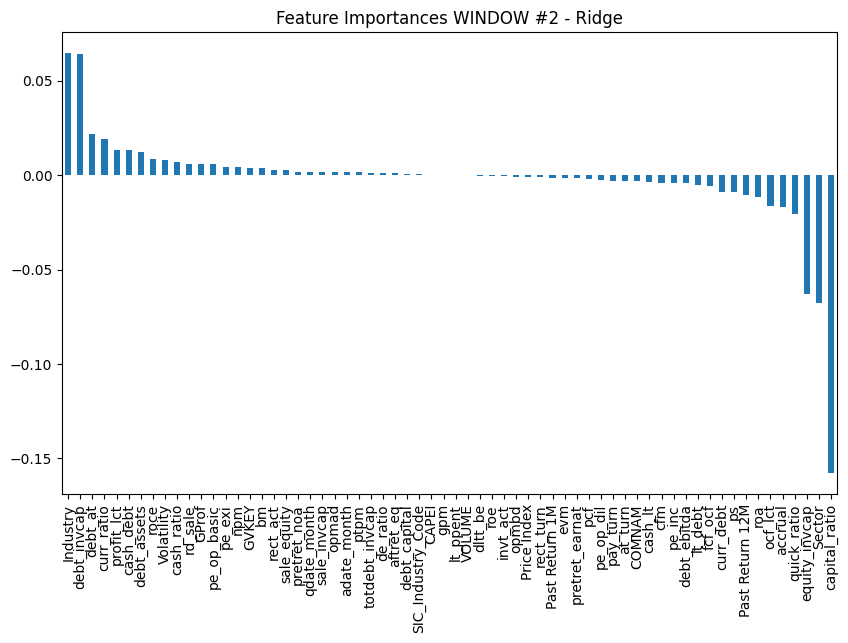

In [ ]:
#Feature Importance Plot
plt.figure(figsize=(10, 6))
importances_ridge.plot(kind='bar')
plt.title('Feature Importances WINDOW #2 - Ridge')
plt.show()

In [ ]:
# Actual DataFrame
ridge_actual = pd.DataFrame(y_test2)
#Predicted
pred_ridge_df = pd.DataFrame(pred_ridge, columns=['Predicted_return_Ridge'])

In [ ]:
# Predicted vs. Actual
ridge_result = pd.concat([pred_ridge_df.reset_index(drop=True), ridge_actual.reset_index(drop=True)], axis=1)
print(ridge_result)

      Predicted_return_Ridge  Forward 3M Return
0                   0.070816          -0.097518
1                   0.076873           0.235013
2                   0.133880           0.164018
3                  -0.008402           0.186933
4                   0.028008           0.129962
...                      ...                ...
2613                0.004352          -0.018404
2614                0.012512          -0.016053
2615                0.012023           0.035780
2616                0.022200           0.106681
2617                0.021328           0.134448

[2618 rows x 2 columns]


In [ ]:
# Get best 50 stocks based on predicted returns
ridge_result1 = pd.concat([ridge_result.reset_index(drop=True), X_test2['GVKEY'].reset_index(drop=True)], axis=1)
ridge_result1_sorted = ridge_result1.sort_values(by='Predicted_return_Ridge', ascending=False).head(50)

print(ridge_result1_sorted)

      Predicted_return_Ridge  Forward 3M Return     GVKEY
467                 0.159199       2.591092e-01   10190.0
1327                0.157585       6.680666e-01   10190.0
1615                0.152863       1.040485e+00   10190.0
744                 0.152055      -4.734510e-01   10190.0
661                 0.148892       2.572341e-01   10190.0
1650                0.143268       1.877197e-01   15521.0
122                 0.140506       3.949905e-01    7750.0
2455                0.140193      -5.761255e-01   10190.0
979                 0.138390       2.121782e-01    5073.0
2543                0.138366       1.374888e-01   14590.0
1260                0.136043       3.339357e-01   25279.0
2268                0.135231      -1.127280e-01   14590.0
2                   0.133880       1.640184e-01   14590.0
576                 0.132469       1.015687e-01    5073.0
1990                0.131565      -2.410375e-01   14590.0
1548                0.130738       3.630031e-01   25279.0
558           

In [ ]:
# Get worst 50 stocks based on predicted returns
ridge_result1 = pd.concat([ridge_result.reset_index(drop=True), X_test2['GVKEY'].reset_index(drop=True)], axis=1)
ridge_result1_sorted = ridge_result1.sort_values(by='Predicted_return_Ridge', ascending=True).head(50)

print(ridge_result1_sorted)

      Predicted_return_Ridge  Forward 3M Return     GVKEY
1743               -0.085648           0.081465   14535.0
1331               -0.053036           0.140244    7085.0
65                 -0.049568          -0.104280    8543.0
1619               -0.043776           0.220443    7085.0
540                -0.042780           0.076920  179534.0
1672               -0.042421           0.064028  139665.0
893                -0.041997           0.008703    8543.0
488                -0.039961          -0.040043  165052.0
762                -0.039826           0.155763  165052.0
2561               -0.039760           0.067506    8543.0
2251               -0.037600          -0.008164  179534.0
2526               -0.037414           0.051525  179534.0
2482               -0.036473          -0.208293   25434.0
244                -0.036263           0.073942    8543.0
1385               -0.035758          -0.006587  139665.0
771                -0.035737          -0.093096   25434.0
2086          

#3rd window TRAIN: 2013-2016, TEST 2017

In [ ]:
df_test3 = df[df['pubdate_year']==2017]

In [ ]:
df_train3 = df[(df['pubdate_year'] < 2017) & (df['pubdate_year'] > 2012)]

In [ ]:
# Split the datasets into target
y_train3 = df_train3['Forward 3M Return']
X_train3 = df_train3.drop(['Forward 3M Return'], axis=1)

print(X_train3.shape)
print(y_train3.shape)


(9729, 67)
(9729,)


In [ ]:
y_test3 = df_test3['Forward 3M Return']
X_test3 = df_test3.drop(['Forward 3M Return'], axis=1)

print(X_test3.shape)
print(y_test3.shape)


(2540, 67)
(2540,)


In [ ]:
X_test_scaled3= pd.DataFrame(normalize_by_group(X_test3, 'public_date'))
X_test_scaled3 = X_test_scaled3.drop(['pubdate_month','pubdate_year'], axis=1)

X_test_scaled3

CAPEI        bm       evm  pe_op_basic  pe_op_dil    pe_exi  \
989    0.150761  3.095197  0.014869    -0.098328  -0.105527 -0.879978   
990    0.253488  3.872126 -0.190208     0.005923   0.005082  0.351240   
991    0.228510  3.875294 -0.190966    -0.013914  -0.016858  0.313271   
992    0.107054  3.205966  0.049018    -0.089839  -0.100107 -0.015596   
993    0.120153  3.194185  0.048971    -0.080587  -0.090699 -0.001172   
...         ...       ...       ...          ...        ...       ...   
73061 -0.027875  0.443534  0.060259     0.028801   0.018497  0.065220   
73062 -0.024955  0.446342  0.060261     0.023657   0.013811  0.043029   
73063 -0.029273  0.486939 -0.054940    -0.001255  -0.014645  0.011876   
73064 -0.032632  0.483544 -0.054362     0.005894  -0.007418  0.020755   
73065  0.068213  0.504303 -0.053424    -0.061410  -0.067546  0.009222   

         pe_inc        ps       pcf       npm     opmbd     opmad       gpm  \
989   -0.698515 -0.614373 -0.541536 -1.151461 -0.220487  0.017905 -1.152171   
990    0.359216 -0.561228 -0.697351 -0.567330 -0.232800  0.005984 -1.168781   
991    0.320574 -0.560977 -0.673011 -0.562613 -0.233086  0.007321 -1.170991   
992   -0.121028 -0.604809 -0.554583 -0.165057 -0.221465  0.026062 -1.142094   
993   -0.107388 -0.588013 -0.533910 -0.165915 -0.222516  0.024219 -1.141138   
...         ...       ...       ...       ...       ...       ...       ...   
73061 -0.018014  0.421487 -0.309253  0.794588  1.832130  1.375071  0.139927   
73062 -0.015359  0.430192 -0.300061  0.791248  1.828540  1.370061  0.137538   
73063  0.050400  0.458796 -0.315137  0.710872  1.804783  1.306162  0.132319   
73064  0.054757  0.495096 -0.317635  0.708261  1.803753  1.300799  0.136567   
73065 -0.007949  0.561123 -0.282197  0.688831  1.825654  1.274080  0.166921   

           ptpm       cfm       roa       roe      roce  aftret_eq  \
989   -1.176437 -1.256221 -0.920872 -0.560911 -0.760857  -0.163667   
990   -0.286565 -0.696319 -1.006312 -0.535495 -0.835789  -0.539762   
991   -0.282285 -0.695140 -1.002130 -0.531132 -0.833678  -0.535611   
992   -0.047998 -0.301335 -0.949582 -0.427624 -0.775787  -0.186633   
993   -0.049114 -0.301132 -0.948136 -0.428073 -0.774673  -0.186667   
...         ...       ...       ...       ...       ...        ...   
73061  0.864085  1.537809 -0.800687 -0.312198 -0.752493  -0.102972   
73062  0.860984  1.536949 -0.803114 -0.313809 -0.754358  -0.103535   
73063  0.775379  1.524763 -0.949424 -0.365382 -0.867765  -0.174167   
73064  0.772395  1.524609 -0.953031 -0.370359 -0.873261  -0.176162   
73065  0.773325  1.553250 -0.968358 -0.367174 -0.888006  -0.140266   

       pretret_noa  pretret_earnat     GProf  equity_invcap  debt_invcap  \
989      -0.003708       -0.067521 -1.184652       0.480311    -0.759362   
990      -0.030416       -0.027497 -1.233958       0.219674    -0.576985   
991      -0.029952       -0.024251 -1.237663       0.220051    -0.575705   
992      -0.052986       -0.081764 -1.219529       0.077238    -0.491771   
993      -0.053108       -0.085128 -1.225446       0.078845    -0.494562   
...            ...             ...       ...            ...          ...   
73061    -0.078296       -0.875100 -1.169171      -1.086727     1.020357   
73062    -0.078615       -0.880160 -1.173759      -1.060925     0.991185   
73063    -0.279072       -0.918813 -1.209327      -1.098354     1.007439   
73064    -0.280863       -0.921651 -1.210430      -1.101181     1.011306   
73065    -0.229289       -0.947637 -1.197725      -1.099828     0.990253   

       totdebt_invcap  capital_ratio   cash_lt  invt_act  rect_act   debt_at  \
989         -0.793095      -0.676815  0.579741 -1.155433 -0.502391 -0.458887   
990         -0.637490      -0.465190  0.378422 -1.134273 -0.478766 -0.241383   
991         -0.638361      -0.464618  0.370044 -1.159970 -0.490095 -0.242594   
992         -0.664781      -0.348036  0.288189 -1.155894 -0.324327 -0.247897   
993         -0.669069      -0.

In [ ]:
X_train_scaled3= pd.DataFrame(normalize_by_group(X_train3, 'public_date'))
X_train_scaled3 = X_train_scaled3.drop(['pubdate_month','pubdate_year'], axis=1)

X_train_scaled3

CAPEI        bm       evm  pe_op_basic  pe_op_dil    pe_exi  \
956   -0.767976  3.548282  0.607491     0.100808   0.096486 -0.030666   
957   -0.959281  3.055424  0.465868     0.029117   0.020752 -0.908181   
958   -1.031957  3.062486  0.452375     0.040771   0.029989 -1.124047   
959   -0.089347  2.611381  0.244023     0.157010   0.173971 -0.652035   
960   -0.086603  2.624485  0.238219     0.130475   0.124673 -0.617155   
...         ...       ...       ...          ...        ...       ...   
73052 -0.059983  0.245973  0.082002     0.116874   0.097463  0.086741   
73053 -0.033989  0.233538  0.062449     0.059080   0.050008  0.006029   
73054 -0.031620  0.239388  0.061969     0.090288   0.082740  0.012529   
73055 -0.034775  0.240486  0.061396     0.118617   0.111231  0.037148   
73056  0.046661  0.442734  0.065537     0.127918   0.120833  0.001722   

         pe_inc        ps       pcf       npm     opmbd     opmad       gpm  \
956    0.041780 -0.284364  0.077161 -0.185296 -0.425094 -0.322575 -1.273519   
957   -0.863106 -0.292894  0.261854 -2.341852 -0.501809 -0.350292 -1.336782   
958   -1.071450 -0.238189  0.345892 -2.350334 -0.516763 -0.361559 -1.345630   
959   -0.207876 -0.223452  0.032967 -2.319144 -0.569095 -0.484569 -1.356180   
960   -0.195119 -0.268859 -0.019707 -2.318619 -0.569657 -0.484958 -1.356361   
...         ...       ...       ...       ...       ...       ...       ...   
73052  0.094510  0.698762 -0.343115  0.653278  1.580326  1.142802  0.075955   
73053 -0.009095  0.638912 -0.296779  0.718138  1.636482  1.177746  0.091127   
73054 -0.000017  0.622723 -0.288447  0.712726  1.636044  1.177038  0.090796   
73055  0.023936  0.716182 -0.269093  0.712519  1.635445  1.176691  0.090496   
73056  0.072108  0.653501 -0.358677  0.808250  1.715967  1.256593  0.094779   

           ptpm       cfm       roa       roe      roce  aftret_eq  \
956   -0.307608 -0.381333 -1.308629 -0.415242 -1.163046  -0.104039   
957   -2.612588 -2.251903 -1.315869 -0.601054 -1.159749  -0.565130   
958   -2.621341 -2.261988 -1.320508 -0.654294 -1.162091  -0.633329   
959   -2.639635 -2.228885 -1.321681 -0.441687 -1.170602  -0.028346   
960   -2.639024 -2.229569 -1.315119 -0.441144 -1.165338  -0.028284   
...         ...       ...       ...       ...       ...        ...   
73052  0.732850  1.280813 -0.733799 -0.364314 -0.696884  -0.206142   
73053  0.824404  1.376525 -0.746117 -0.345968 -0.694823   0.008558   
73054  0.818740  1.367727 -0.745422 -0.343861 -0.694343   0.008574   
73055  0.818411  1.366948 -0.747314 -0.344891 -0.695314   0.008447   
73056  0.858403  1.467248 -0.779865 -0.279161 -0.719954  -0.093779   

       pretret_noa  pretret_earnat     GProf  equity_invcap  debt_invcap  \
956       0.049311       -0.553826 -1.323580       0.832508    -0.795970   
957      -0.017292       -0.523677 -1.297021       0.829419    -0.787877   
958      -0.017037       -0.529564 -1.290717       0.827847    -0.787958   
959      -0.178269       -0.654342 -1.313069       0.796585    -0.753241   
960      -0.177999       -0.653162 -1.306989       0.805671    -0.763202   
...            ...             ...       ...            ...          ...   
73052    -0.358880       -0.835785 -1.114002      -1.027867     1.030184   
73053     0.006220       -0.853117 -1.121090      -0.973669     0.957785   
73054     0.006133       -0.854587 -1.121332      -0.970932     0.954836   
73055     0.006083       -0.855174 -1.122601      -0.970416     0.954394   
73056    -0.078126       -0.858789 -1.134903      -0.967859     0.947829   

       totdebt_invcap  capital_ratio   cash_lt  invt_act  rect_act   debt_at  \
956         -0.841384      -0.805534  1.070738 -1.233446 -0.832559 -0.499888   
957         -0.851508      -0.803046  1.116984 -1.235800 -0.801301 -0.487571   
958         -0.848867      -0.802959  1.085943 -1.242556 -0.796470 -0.483497   
959         -0.853393      -0.766784  0.828840 -1.229495 -0.635250 -0.537640   
960         -0.859872      -0.

In [ ]:
# Train the Ridge regression model
ridge = Ridge(alpha=1.0)  # Alpha is the regularization strength
ridge.fit(X_train_scaled3, y_train3)

# Predictions on the test set using Ridge
pred_ridge = ridge.predict(X_test_scaled3)

# Display the predictions
print("Predictions using Ridge:")
print(pred_ridge)

Predictions using Ridge:
[ 0.03998277  0.03129862  0.04450016 ...  0.00899701  0.00659266
 -0.00412494]


In [ ]:
# RMSE (Root Mean Square Error) for Ridge
rmse_ridge = np.sqrt(mean_squared_error(y_test3, pred_ridge))
print("\nRidge RMSE: ", rmse_ridge)

# MAPE (Mean Absolute Percentage Error) for Ridge
mape_ridge = mean_absolute_percentage_error(y_test3, pred_ridge)
print("\nRidge MAPE: {:.2f}%".format(mape_ridge))



Ridge RMSE:  0.13097108844738453

Ridge MAPE: 164.78%


In [ ]:
# Feature importance for Ridge
importances_ridge = pd.Series(ridge.coef_, index=X_train_scaled3.columns)
importances_ridge.sort_values(ascending=False, inplace=True)
top_features_ridge = importances_ridge.nlargest(50).sort_values(ascending=False)
# Display the top features for Ridge model
print("\nTop Features for Ridge:\n", top_features_ridge)
#Feature Importance Plot


Top Features for Ridge:
 equity_invcap        0.065704
debt_invcap          0.057950
Sector               0.026938
opmad                0.019784
cash_ratio           0.019357
capital_ratio        0.018578
curr_debt            0.014868
debt_assets          0.011931
curr_ratio           0.011216
rd_sale              0.007901
ptpm                 0.007574
profit_lct           0.006847
roa                  0.005978
lt_debt              0.005264
pe_op_dil            0.005086
bm                   0.005081
GVKEY                0.004973
ocf_lct              0.003783
cfm                  0.003045
pe_exi               0.002361
Past Return 12M      0.002346
Volatility           0.002155
adate_month          0.002116
pretret_earnat       0.002072
sale_invcap          0.001914
pretret_noa          0.001424
sale_equity          0.001285
COMNAM               0.000819
de_ratio             0.000563
lt_ppent             0.000532
qdate_month          0.000341
VOLUME               0.000311
CAPEI         

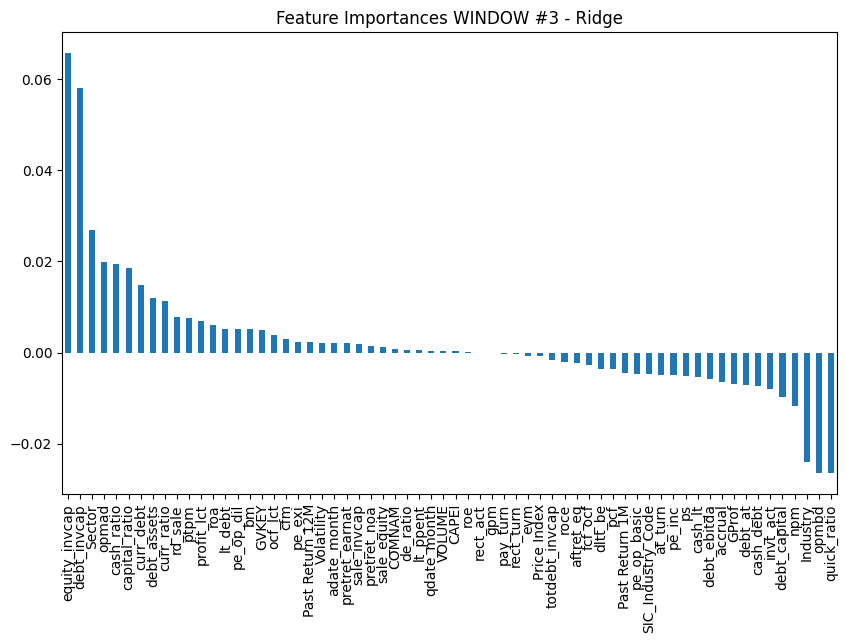

In [ ]:
#Feature Importance Plot
plt.figure(figsize=(10, 6))
importances_ridge.plot(kind='bar')
plt.title('Feature Importances WINDOW #3 - Ridge')
plt.show()


Again, new features are more important now then before. Every time the picture changes and new columns become more important. It is absolutely not stable. Some features are always in top 5 but not guaranted in the future.

In [ ]:
# Actual DataFrame
ridge_actual = pd.DataFrame(y_test3)
#Predicted
pred_ridge_df = pd.DataFrame(pred_ridge, columns=['Predicted_return_Ridge'])
# Predicted vs. Actual
ridge_result = pd.concat([pred_ridge_df.reset_index(drop=True), ridge_actual.reset_index(drop=True)], axis=1)
print(ridge_result)


      Predicted_return_Ridge  Forward 3M Return
0                   0.039983           0.186739
1                   0.031299          -0.016579
2                   0.044500           0.064524
3                   0.035881           0.043401
4                   0.033968           0.030136
...                      ...                ...
2535                0.015816           0.013537
2536                0.010437           0.061385
2537                0.008997           0.077822
2538                0.006593          -0.049302
2539               -0.004125          -0.119577

[2540 rows x 2 columns]


In [ ]:
# Get best 50 stocks based on predicted returns
ridge_result1 = pd.concat([ridge_result.reset_index(drop=True), X_test3['GVKEY'].reset_index(drop=True)], axis=1)
ridge_result1_sorted = ridge_result1.sort_values(by='Predicted_return_Ridge', ascending=False).head(50)

print(ridge_result1_sorted)

      Predicted_return_Ridge  Forward 3M Return     GVKEY
1163                0.187129           0.667251    6994.0
614                 0.185593           0.454064    6994.0
889                 0.179487           0.497504    6994.0
460                 0.115972           0.001881   13599.0
1204                0.112965           0.054074  260778.0
49                  0.110633           0.117238  260778.0
1765                0.110408           0.377663   24344.0
323                 0.107519           0.219315  260778.0
1038                0.106203          -0.043552  260778.0
1597                0.103476          -0.343594   23978.0
763                 0.103255           0.016763  260778.0
2337                0.102386          -0.089582  260778.0
1476                0.101398           0.216714  260778.0
1221                0.099703           0.171483   64630.0
2064                0.098298           0.063922  260778.0
491                 0.098072           0.280650  260778.0
628           

In [ ]:
# Get worst 50 stocks based on predicted returns
ridge_result1 = pd.concat([ridge_result.reset_index(drop=True), X_test3['GVKEY'].reset_index(drop=True)], axis=1)
ridge_result1_sorted = ridge_result1.sort_values(by='Predicted_return_Ridge', ascending=True).head(50)

print(ridge_result1_sorted)


      Predicted_return_Ridge  Forward 3M Return     GVKEY
1494               -0.060009           0.106202    7163.0
486                -0.053989           0.119849    7163.0
350                -0.038137          -0.040410  114524.0
77                 -0.036930           0.053456  114524.0
2091               -0.035689           0.078109  114524.0
1506               -0.035059           0.011799  114524.0
1530               -0.034834          -0.101048   14590.0
791                -0.033773           0.053353  114524.0
44                 -0.033242           0.021459    7163.0
1066               -0.032901           0.101374  114524.0
2059               -0.032828           0.160278    7163.0
318                -0.032282           0.074905    7163.0
758                -0.031920           0.083537    7163.0
1222               -0.030616           0.120110    7163.0
1033               -0.029097           0.073535    7163.0
519                -0.029060           0.040215  114524.0
2365          

#4th window TRAIN: 2018-2021, TEST 2022

In [ ]:
df_test4 = df[df['pubdate_year']==2022]

In [ ]:
df_train4 = df[(df['pubdate_year'] < 2022) & (df['pubdate_year'] > 2017)]

In [ ]:
# Split the datasets into target
y_train4 = df_train4['Forward 3M Return']
X_train4 = df_train4.drop(['Forward 3M Return'], axis=1)

print(X_train4.shape)
print(y_train4.shape)


(8966, 67)
(8966,)


In [ ]:
y_test4 = df_test4['Forward 3M Return']
X_test4 = df_test4.drop(['Forward 3M Return'], axis=1)

print(X_test4.shape)
print(y_test4.shape)


(1867, 67)
(1867,)


In [ ]:
X_test_scaled4= pd.DataFrame(normalize_by_group(X_test4, 'public_date'))
X_test_scaled4 = X_test_scaled4.drop(['pubdate_month','pubdate_year'], axis=1)

X_test_scaled4

CAPEI        bm       evm  pe_op_basic  pe_op_dil    pe_exi  \
2359   0.063008 -0.522286  0.062217     0.015403   0.004559  0.014234   
2360   0.020230 -0.720415 -0.003267     0.034240   0.031171 -0.051939   
2361   0.016924 -0.729079 -0.014916    -0.025087  -0.028771 -0.073071   
2362   0.060169 -0.601301 -0.060030    -0.133869  -0.141626 -0.129992   
2363   0.051322 -0.599992 -0.061060    -0.156378  -0.162791 -0.115652   
...         ...       ...       ...          ...        ...       ...   
73101  0.053095  0.516443 -0.033497     0.075865   0.067906  0.030992   
73102  0.102428  0.353388  0.067414     0.118598   0.094794  0.195662   
73103  0.108839  0.336440  0.066446     0.144270   0.125541  0.232712   
73104  0.186817  0.185849  0.003601     0.618726   0.590321  0.625734   
73105  0.148436  0.165326  0.003318     0.531806   0.519473  0.503677   

         pe_inc        ps       pcf       npm     opmbd     opmad       gpm  \
2359   0.048210 -0.124542 -0.032068  0.159372 -0.315798 -0.014952 -0.186918   
2360   0.031453 -0.215535 -0.203765  0.133542 -0.324196 -0.009806 -0.217413   
2361   0.014674 -0.292398 -0.243628  0.166927 -0.339690 -0.021778 -0.223536   
2362  -0.123682 -0.326591 -0.182640  0.142751 -0.341428 -0.023904 -0.255116   
2363  -0.115002 -0.333056 -0.213140  0.143994 -0.339812 -0.022405 -0.254196   
...         ...       ...       ...       ...       ...       ...       ...   
73101  0.018571  0.460731 -0.151259  0.705405  1.348844  0.550025 -0.112842   
73102  0.022631  0.623990 -0.000162  0.430736  1.304468  0.475498 -0.132632   
73103  0.058789  0.671397  0.030826  0.432528  1.305116  0.476742 -0.131720   
73104  0.230929  0.639118  0.118134 -0.111488  0.857990 -0.065478 -0.446373   
73105  0.145749  0.499168  0.014516 -0.100249  0.859573 -0.060880 -0.444208   

           ptpm       cfm       roa       roe      roce  aftret_eq  \
2359   0.233335 -0.228206  0.658763 -0.128343  0.876689  -0.063279   
2360   0.228683 -0.257259  0.619291 -0.061728  0.961503  -0.129377   
2361   0.218540 -0.276654  0.610789 -0.036357  0.956566  -0.129325   
2362   0.195308 -0.292328  0.737091 -0.066072  1.019413  -0.136713   
2363   0.195453 -0.291506  0.736807 -0.070317  1.013201  -0.139856   
...         ...       ...       ...       ...       ...        ...   
73101  0.595696  1.660997 -0.964048 -0.555054 -0.885195  -0.475012   
73102  0.376305  1.428057 -0.958725 -0.525197 -0.891385  -0.460092   
73103  0.376469  1.430292 -0.955937 -0.526541 -0.887946  -0.462085   
73104 -0.099972  1.001921 -1.085397 -0.592218 -1.022465  -0.508975   
73105 -0.094598  1.014909 -1.078608 -0.586735 -1.015883  -0.504497   

       pretret_noa  pretret_earnat     GProf  equity_invcap  debt_invcap  \
2359     -0.059048        0.307363  0.712087       1.994616    -1.973008   
2360     -0.058750        0.312901  0.614628       1.871942    -1.844820   
2361     -0.059484        0.302458  0.608659       1.877161    -1.851307   
2362      0.002791        0.418421  0.730410       1.899702    -1.867919   
2363      0.002795        0.417997  0.731767       1.901104    -1.869271   
...            ...             ...       ...            ...          ...   
73101    -0.103533       -1.101263 -1.294474      -0.601149     0.453106   
73102    -0.418495       -1.126921 -1.300858      -0.557319     0.420210   
73103    -0.418489       -1.125329 -1.300987      -0.555836     0.418694   
73104    -0.071298       -1.253569 -1.356690      -0.569171     0.452804   
73105    -0.071045       -1.246497 -1.352851      -0.570141     0.454171   

       totdebt_invcap  capital_ratio   cash_lt  invt_act  rect_act   debt_at  \
2359        -2.013076      -1.961476  0.859116 -0.127845  0.265351 -2.110754   
2360        -1.880312      -1.839377  0.580614  0.110019  0.123529 -1.995510   
2361        -1.888135      -1.844594  0.584032  0.108403  0.112544 -1.993728   
2362        -1.905226      -1.864741  0.672762  0.050584  0.186333 -2.014698   
2363        -1.904559      -1.

In [ ]:
X_train_scaled4= pd.DataFrame(normalize_by_group(X_train4, 'public_date'))
X_train_scaled4 = X_train_scaled4.drop(['pubdate_month','pubdate_year'], axis=1)

X_train_scaled4

CAPEI        bm       evm  pe_op_basic  pe_op_dil    pe_exi  \
998    0.120783  2.740268 -0.069072    -0.246049  -0.249935 -0.120772   
999   -0.041590  2.622173 -0.211763    -0.214143  -0.221769 -0.216010   
1000  -0.035956  2.660039 -0.217127    -0.201128  -0.207212 -0.220619   
1001  -0.139348  2.741546 -0.078601    -0.154971  -0.179208 -0.172770   
1002  -0.157226  2.724464 -0.076637    -0.179867  -0.207162 -0.188724   
...         ...       ...       ...          ...        ...       ...   
76306  0.014551  1.545376 -0.048391    -0.358752  -0.362821 -0.293632   
76307 -0.009389  0.739511  0.018591    -0.330610  -0.336878 -0.207701   
76309 -0.012249  0.606467 -0.076761    -0.466685  -0.470885 -0.367181   
76310  0.068535 -0.860816  0.030005    -0.056601  -0.064699 -0.100093   
76311  0.059364 -0.811399  0.022231     0.007095  -0.005564 -0.087829   

         pe_inc        ps       pcf       npm     opmbd     opmad       gpm  \
998   -0.157477 -0.619618 -0.531994 -0.105991 -0.219497  0.035267 -1.119365   
999   -0.234470 -0.668125 -0.620794  0.042645 -0.217753  0.059040 -1.140660   
1000  -0.237284 -0.652136 -0.617491  0.037155 -0.217901  0.059691 -1.135667   
1001  -0.174967 -0.673626 -0.545921 -0.125296 -0.120252  0.178074 -1.083402   
1002  -0.203867 -0.713550 -0.600767 -0.125338 -0.116950  0.180355 -1.082820   
...         ...       ...       ...       ...       ...       ...       ...   
76306 -0.332606 -0.817615 -0.317337 -0.774817 -1.297100 -1.061211 -1.305457   
76307 -0.287824 -0.838608 -0.361446 -0.866888 -1.435795 -1.199722 -1.113123   
76309 -0.419921 -0.505168 -0.378264  0.263073  0.849025  0.454266  0.734297   
76310 -0.104939 -0.441458  0.005128 -0.373053 -0.808017 -0.539757 -0.439953   
76311 -0.090476 -0.290605 -0.071839 -0.197282 -0.537927 -0.376802 -0.151452   

           ptpm       cfm       roa       roe      roce  aftret_eq  \
998    0.023252 -0.281367 -1.054350 -0.448998 -0.823532  -0.206229   
999   -0.402088 -0.115758 -1.038038 -0.403531 -0.798911  -0.354650   
1000  -0.396970 -0.114404 -1.027052 -0.396038 -0.790845  -0.353287   
1001  -0.481609 -0.276083 -0.938740 -0.424556 -0.700221  -0.375274   
1002  -0.479459 -0.273619 -0.939544 -0.422885 -0.699804  -0.376525   
...         ...       ...       ...       ...       ...        ...   
76306 -0.850601 -1.095886 -0.820748 -0.343983 -0.660852  -0.218603   
76307 -0.989331 -1.183883 -0.931947 -0.350286 -0.828546  -0.223752   
76309  0.444214  0.642046  0.024366 -0.216664 -0.218752  -0.092446   
76310 -0.388167 -0.714568  0.824999  0.138822  0.589224   0.022126   
76311 -0.156950 -0.435912  1.114117  0.007721  0.619714  -0.034516   

       pretret_noa  pretret_earnat     GProf  equity_invcap  debt_invcap  \
998      -0.015235        0.264034 -1.214725       0.092894    -0.516175   
999       0.059161        0.347469 -1.214712       0.050436    -0.492003   
1000      0.059459        0.355228 -1.214035       0.048335    -0.488489   
1001      0.015994        0.371300 -1.206603       0.018719    -0.480716   
1002      0.015177        0.366765 -1.196404       0.021003    -0.483949   
...            ...             ...       ...            ...          ...   
76306     0.059567       -0.444781 -0.415225      -0.064756     0.145370   
76307     0.037996       -0.882186  0.134841      -0.486937     0.533989   
76309     0.046041       -0.147345 -0.323547      -0.791088     0.875786   
76310     0.047322       -0.153177  1.647522      -0.523253     0.627632   
76311     0.046753       -0.129849  1.922555       0.230317    -0.149605   

       totdebt_invcap  capital_ratio   cash_lt  invt_act  rect_act   debt_at  \
998         -0.690620      -0.363174  0.246533 -1.138902 -0.279678 -0.258935   
999         -0.623884      -0.333668  0.277369 -1.128488 -0.285657 -0.183769   
1000        -0.619394      -0.330656  0.273469 -1.147650 -0.289678 -0.183903   
1001        -0.578259      -0.313092  0.342859 -1.148747 -0.312604 -0.145798   
1002        -0.576053      -0.

In [ ]:
# Train the Ridge regression model
ridge = Ridge(alpha=1.0)  # Alpha is the regularization strength
ridge.fit(X_train_scaled4, y_train4)

# Predictions on the test set using Ridge
pred_ridge = ridge.predict(X_test_scaled4)

# Display the predictions
print("Predictions using Ridge:")
print(pred_ridge)

Predictions using Ridge:
[-0.01970203 -0.00999793 -0.00330808 ...  0.03485754  0.05815729
  0.05095506]


In [ ]:
# RMSE (Root Mean Square Error) for Ridge
rmse_ridge = np.sqrt(mean_squared_error(y_test4, pred_ridge))
print("\nRidge RMSE: ", rmse_ridge)

# MAPE (Mean Absolute Percentage Error) for Ridge
mape_ridge = mean_absolute_percentage_error(y_test4, pred_ridge)
print("\nRidge MAPE: {:.2f}%".format(mape_ridge))



Ridge RMSE:  0.1737509923666014

Ridge MAPE: 92.13%


In [ ]:
# Feature importance for Ridge
importances_ridge = pd.Series(ridge.coef_, index=X_train_scaled4.columns)
importances_ridge.sort_values(ascending=False, inplace=True)
top_features_ridge = importances_ridge.nlargest(50).sort_values(ascending=False)

# Display the top features for Ridge model
print("\nTop Features for Ridge:\n", top_features_ridge)



Top Features for Ridge:
 pe_op_dil            0.137758
Industry             0.132665
capital_ratio        0.055689
totdebt_invcap       0.036663
opmbd                0.036084
roce                 0.036061
profit_lct           0.030564
curr_ratio           0.025062
at_turn              0.020649
ptpm                 0.019743
debt_at              0.017236
npm                  0.017156
evm                  0.015445
GProf                0.015059
ps                   0.014917
Volatility           0.012476
dltt_be              0.007804
pe_inc               0.007782
aftret_eq            0.007597
curr_debt            0.007497
cash_lt              0.006195
VOLUME               0.006056
GVKEY                0.004835
Past Return 1M       0.004648
qdate_month          0.003999
bm                   0.003466
rect_act             0.003010
CAPEI                0.002938
pretret_earnat       0.002825
rect_turn            0.001415
pcf                 -0.000090
equity_invcap       -0.000191
pay_turn      

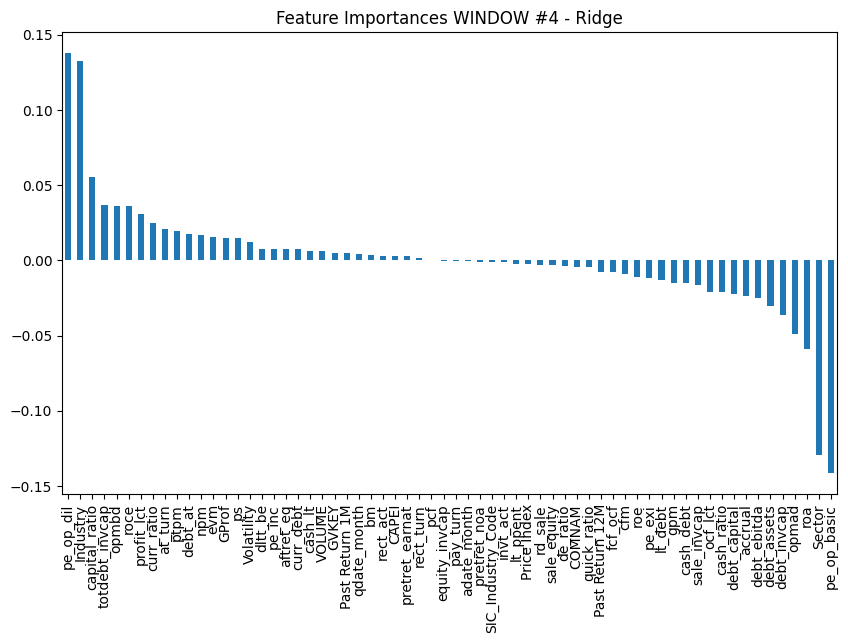

In [ ]:
#Feature Importance Plot
plt.figure(figsize=(10, 6))
importances_ridge.plot(kind='bar')
plt.title('Feature Importances WINDOW #4 - Ridge')
plt.show()

In [ ]:
# Actual DataFrame
ridge_actual = pd.DataFrame(y_test4)
#Predicted
pred_ridge_df = pd.DataFrame(pred_ridge, columns=['Predicted_return_Ridge'])
# Predicted vs. Actual
ridge_result = pd.concat([pred_ridge_df.reset_index(drop=True), ridge_actual.reset_index(drop=True)], axis=1)
print(ridge_result)

      Predicted_return_Ridge  Forward 3M Return
0                  -0.019702          -0.231746
1                  -0.009998          -0.119159
2                  -0.003308          -0.140054
3                  -0.001035          -0.056889
4                  -0.005469          -0.107626
...                      ...                ...
1862                0.053134          -0.052871
1863                0.039140          -0.020611
1864                0.034858          -0.125704
1865                0.058157          -0.245718
1866                0.050955          -0.103061

[1867 rows x 2 columns]


In [ ]:
# Get best 50 stocks based on predicted returns
ridge_result1 = pd.concat([ridge_result.reset_index(drop=True), X_test4['GVKEY'].reset_index(drop=True)], axis=1)
ridge_result1_sorted = ridge_result1.sort_values(by='Predicted_return_Ridge', ascending=False).head(50)
print(ridge_result1_sorted)

      Predicted_return_Ridge  Forward 3M Return     GVKEY
41                  0.323882          -0.081593   10795.0
1601                0.323050          -0.264959   10795.0
879                 0.292661           0.148168  145049.0
845                 0.255037           0.055124    8810.0
1613                0.248803          -0.206293  126296.0
53                  0.222485          -0.012021  126296.0
31                  0.196492           0.080639  162887.0
1591                0.174746           0.103713  162887.0
603                 0.173726           0.023858   25283.0
1541                0.169537           0.088363   10405.0
1143                0.164717           0.011350  145049.0
357                 0.160750           0.611983    4990.0
1799                0.160362           0.171731   10405.0
925                 0.158029          -0.021721    7750.0
281                 0.156330           0.081532  138205.0
101                 0.156305           0.011895    4990.0
1018          

In [ ]:
# Get worst 50 stocks based on predicted returns
ridge_result1 = pd.concat([ridge_result.reset_index(drop=True), X_test4['GVKEY'].reset_index(drop=True)], axis=1)
ridge_result1_sorted = ridge_result1.sort_values(by='Predicted_return_Ridge', ascending=True).head(50)

print(ridge_result1_sorted)


      Predicted_return_Ridge  Forward 3M Return     GVKEY
1341               -0.105200          -0.211355    9882.0
857                -0.101638           0.135397    2751.0
1233               -0.100199          -0.153623    6821.0
1385               -0.097917          -0.069389    2751.0
970                -0.097831          -0.037109    6821.0
85                 -0.093916           0.285168    2751.0
586                -0.093664           0.099235    8810.0
1122               -0.093502           0.051796    2751.0
1645               -0.093351           0.267590    2751.0
1078               -0.089641           0.047031    9882.0
1087               -0.088414           0.161303    8455.0
1751               -0.083066          -0.019317    6821.0
1350               -0.081572          -0.042193    8455.0
330                -0.076021          -0.050163    8810.0
1493               -0.075992          -0.211556    6821.0
704                -0.073329          -0.025929    6821.0
1045          

#Now lets train  our RIDGE model on the whole dataset and then make prediction as of  DECEMBER of 2022

We pre-processed file in Tableau Prep as discussed before and upload it here. File Output predict.csv. It has info only as of DECEMBER 2022. We will use it to predict 3 month returns.

In [ ]:
# Load necessary libraries
from google.colab import files
import io
import pandas as pd  # Import pandas library

# Upload the dataset
uploaded = files.upload()

# Read the CSV file into a DataFrame
merged_dataP = pd.read_csv(io.BytesIO(uploaded['Output predict.csv']), header=0, sep=",")
merged_dataP.head()

Saving Output predict.csv to Output predict.csv


gvkey       adate      qdate public_date   CAPEI     bm     evm  \
0   1075  12/31/2021  9/30/2022  12/31/2022  15.854  1.212  11.169   
1   1300  12/31/2021  9/30/2022  12/31/2022  29.265  0.179  17.744   
2   1327   9/30/2022  9/30/2022  12/31/2022  13.614  0.402   7.100   
3   1380  12/31/2021  9/30/2022  12/31/2022 -37.058  0.243   7.621   
4   2136  12/31/2021  9/30/2022  12/31/2022   7.780  0.812   7.910   

   pe_op_basic  pe_op_dil  pe_exi  pe_inc     ps     pcf    npm  opmbd  opmad  \
0          NaN        NaN     NaN     NaN  2.091   6.986  0.130  0.360  0.181   
1       23.758     23.944  27.439  27.439  4.124  25.862  0.154  0.235  0.201   
2          NaN        NaN     NaN     NaN  2.661  10.245  0.232  0.413  0.288   
3       23.480     23.597  23.597  23.597  4.114  12.176  0.175  0.490  0.337   
4        7.519      7.519   8.565   8.565  1.220   4.524  0.142  0.352  0.228   

     gpm   ptpm    cfm    roa    roe   roce  aftret_eq  pretret_noa  \
0  0.360  0.154  0.329  0.067  0.063  0.053      0.090        0.045   
1  0.376  0.200  0.188  0.129  0.263  0.181      0.297        0.618   
2  0.583  0.269  0.359  0.259  0.236  0.203      0.237        0.410   
3  0.542  0.305  0.363  0.257  0.276  0.234      0.294        0.222   
4  0.570  0.189  0.271  0.131  0.157  0.119      0.235        0.261   

   pretret_earnat  GProf  equity_invcap  debt_invcap  totdebt_invcap  \
0           0.041  0.066          0.428        0.563           0.602   
1           0.225  0.210          0.556        0.423           0.610   
2           0.330  0.360          0.742        0.258           0.328   
3           0.191  0.277          0.420        0.538           0.553   
4           0.188  0.209          0.343        0.651           0.716   

   capital_ratio  cash_lt  invt_act  rect_act  debt_at  debt_ebitda  \
0          0.568    0.001     0.228     0.236    0.377        5.701   
1          0.432    0.216     0.226     0.310    0.316        2.404   
2          0.258    0.172     0.375     0.339    0.272        1.066   
3          0.562    0.162     0.068     0.351    0.432        1.727   
4          0.655    0.012     0.090     0.655    0.479        3.702   

   curr_debt  lt_debt  profit_lct  ocf_lct  cash_debt  fcf_ocf  lt_ppent  \
0      0.114    0.485       0.796    0.662      0.054   -0.436     0.964   
1      0.442    0.313       0.424    0.287      0.134    0.855     6.909   
2      0.360    0.557       1.845    1.161      0.418    0.656     1.863   
3      0.189    0.659       2.074    1.432      0.214    0.320     0.874   
4      0.173    0.568       0.975    0.746      0.140    0.392     2.209   

   dltt_be  debt_assets  debt_capital  de_ratio  cash_ratio  quick_ratio  \
0    0.924        0.727         0.596     2.713       0.008        0.722   
1    0.671        0.701         0.591     2.432       0.489        0.958   
2    0.346        0.384         0.330     0.623       0.478        1.645   
3    1.196        0.639         0.576     1.945       0.860        1.459   
4    1.273        0.767         0.696     3.342       0.070        0.694   

   curr_ratio  at_turn  rect_turn  pay_turn  sale_invcap  sale_equity  \
0       0.936    0.184     10.016     6.537        0.294        0.686   
1       1.238    0.558      4.694     3.555        1.077        1.936   
2       2.633    0.628      5.930    10.259        0.745        1.003   
3       1.565    0.511      7.706    16.109        0.654        1.557   
4       0.763    0.367      5.543     3.412        0.549        1.600   

   rd_sale  adv_sale  accrual    ptb TICKER     cusip   GVKEY ticker  \
0    0.000     0.000   -0.031  0.973    PNW  72348410  1075.0    PNW   
1    0.038     0.000   -0.003  7.163    HON  43851610  1300.0    HON   
2    0.113     0.000   -0.017  2.659   SWKS  83088M10  1327.0   SWKS   
3    0.000     0.000   -0.084  5.356    HES  42809H10  1380.0    HES   
4    0.000     0.025   -0.047  1.277     VZ  92343V10  2136.0     VZ   

     cusip-1          

In [ ]:
merged_dataP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 68 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gvkey           378 non-null    int64  
 1   adate           378 non-null    object 
 2   qdate           378 non-null    object 
 3   public_date     378 non-null    object 
 4   CAPEI           378 non-null    float64
 5   bm              356 non-null    float64
 6   evm             377 non-null    float64
 7   pe_op_basic     196 non-null    float64
 8   pe_op_dil       196 non-null    float64
 9   pe_exi          196 non-null    float64
 10  pe_inc          196 non-null    float64
 11  ps              378 non-null    float64
 12  pcf             378 non-null    float64
 13  npm             378 non-null    float64
 14  opmbd           378 non-null    float64
 15  opmad           378 non-null    float64
 16  gpm             378 non-null    float64
 17  ptpm            378 non-null    flo

In [ ]:
missingP = missing_value_table(merged_dataP)
missingP

Missing Values  % of Total Values  Rank
Mcap                       346          91.534392   1.0
GVKEY-1                    338          89.417989   2.0
pe_op_basic                182          48.148148   4.5
pe_op_dil                  182          48.148148   4.5
pe_exi                     182          48.148148   4.5
pe_inc                     182          48.148148   4.5
sale_equity                 23           6.084656   7.0
ptb                         22           5.820106   9.0
bm                          22           5.820106   9.0
roe                         22           5.820106   9.0
dltt_be                     21           5.555556  11.0
invt_act                     9           2.380952  12.0
pay_turn                     8           2.116402  13.0
fcf_ocf                      7           1.851852  14.0
Sector                       5           1.322751  17.5
Industry                     5           1.322751  17.5
conm                         5           1.322751  17.5
cusip-1                      5           1.322751  17.5
ticker                       5           1.322751  17.5
GVKEY                        5           1.322751  17.5
pretret_earnat               2           0.529101  25.5
pretret_noa                  2           0.529101  25.5
curr_ratio                   2           0.529101  25.5
rect_turn                    2           0.529101  25.5
quick_ratio                  2           0.529101  25.5
cash_ratio                   2           0.529101  25.5
ocf_lct                      2           0.529101  25.5
profit_lct                   2           0.529101  25.5
curr_debt                    2           0.529101  25.5
rect_act                     2           0.529101  25.5
evm                          1           0.264550  32.5
debt_ebitda                  1           0.264550  32.5
cfm                          1           0.264550  32.5
lt_ppent                     1           0.264550  32.5

In [ ]:
merged_dataP = merged_dataP.drop(['Mcap','GVKEY-1','ticker','cusip-1', 'pe_op_basic','pe_op_dil','pe_exi', 'pe_inc'], axis=1)
merged_dataP.head()

gvkey       adate      qdate public_date   CAPEI     bm     evm     ps  \
0   1075  12/31/2021  9/30/2022  12/31/2022  15.854  1.212  11.169  2.091   
1   1300  12/31/2021  9/30/2022  12/31/2022  29.265  0.179  17.744  4.124   
2   1327   9/30/2022  9/30/2022  12/31/2022  13.614  0.402   7.100  2.661   
3   1380  12/31/2021  9/30/2022  12/31/2022 -37.058  0.243   7.621  4.114   
4   2136  12/31/2021  9/30/2022  12/31/2022   7.780  0.812   7.910  1.220   

      pcf    npm  opmbd  opmad    gpm   ptpm    cfm    roa    roe   roce  \
0   6.986  0.130  0.360  0.181  0.360  0.154  0.329  0.067  0.063  0.053   
1  25.862  0.154  0.235  0.201  0.376  0.200  0.188  0.129  0.263  0.181   
2  10.245  0.232  0.413  0.288  0.583  0.269  0.359  0.259  0.236  0.203   
3  12.176  0.175  0.490  0.337  0.542  0.305  0.363  0.257  0.276  0.234   
4   4.524  0.142  0.352  0.228  0.570  0.189  0.271  0.131  0.157  0.119   

   aftret_eq  pretret_noa  pretret_earnat  GProf  equity_invcap  debt_invcap  \
0      0.090        0.045           0.041  0.066          0.428        0.563   
1      0.297        0.618           0.225  0.210          0.556        0.423   
2      0.237        0.410           0.330  0.360          0.742        0.258   
3      0.294        0.222           0.191  0.277          0.420        0.538   
4      0.235        0.261           0.188  0.209          0.343        0.651   

   totdebt_invcap  capital_ratio  cash_lt  invt_act  rect_act  debt_at  \
0           0.602          0.568    0.001     0.228     0.236    0.377   
1           0.610          0.432    0.216     0.226     0.310    0.316   
2           0.328          0.258    0.172     0.375     0.339    0.272   
3           0.553          0.562    0.162     0.068     0.351    0.432   
4           0.716          0.655    0.012     0.090     0.655    0.479   

   debt_ebitda  curr_debt  lt_debt  profit_lct  ocf_lct  cash_debt  fcf_ocf  \
0        5.701      0.114    0.485       0.796    0.662      0.054   -0.436   
1        2.404      0.442    0.313       0.424    0.287      0.134    0.855   
2        1.066      0.360    0.557       1.845    1.161      0.418    0.656   
3        1.727      0.189    0.659       2.074    1.432      0.214    0.320   
4        3.702      0.173    0.568       0.975    0.746      0.140    0.392   

   lt_ppent  dltt_be  debt_assets  debt_capital  de_ratio  cash_ratio  \
0     0.964    0.924        0.727         0.596     2.713       0.008   
1     6.909    0.671        0.701         0.591     2.432       0.489   
2     1.863    0.346        0.384         0.330     0.623       0.478   
3     0.874    1.196        0.639         0.576     1.945       0.860   
4     2.209    1.273        0.767         0.696     3.342       0.070   

   quick_ratio  curr_ratio  at_turn  rect_turn  pay_turn  sale_invcap  \
0        0.722       0.936    0.184     10.016     6.537        0.294   
1        0.958       1.238    0.558      4.694     3.555        1.077   
2        1.645       2.633    0.628      5.930    10.259        0.745   
3        1.459       1.565    0.511      7.706    16.109        0.654   
4        0.694       0.763    0.367      5.543     3.412        0.549   

   sale_equity  rd_sale  adv_sale  accrual    ptb TICKER     cusip   GVKEY  \
0        0.686    0.000     0.000   -0.031  0.973    PNW  72348410  1075.0   
1        1.936    0.038     0.000   -0.003  7.163    HON  43851610  1300.0   
2        1.003    0.113     0.000   -0.017  2.659   SWKS  83088M10  1327.0   
3        1.557    0.000     0.000   -0.084  5.356    HES  42809H10  1380.0   
4        1.600    0.000     0.025   -0.047  1.277     VZ  92343V10  2136.0   

                          conm  Industry  Sector  
0   PINNACLE WEST CAPITAL CORP  551010.0    55.0  
1  HONEYWELL INTERNATIONAL INC  201050.0    20.0  
2       SKYWORKS SOLUTIONS INC  453010.0    45.0  
3                    HESS CORP  101020.0    10.0  
4   VERIZON COMMUNICATIONS INC  501010.0    50.0

In [ ]:
# Drop IT and Energy Sector
merged_dataP = merged_dataP[~((merged_dataP['Sector'] == 45) | (merged_dataP['Sector'] == 10))]
merged_dataP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 377
Data columns (total 60 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gvkey           303 non-null    int64  
 1   adate           303 non-null    object 
 2   qdate           303 non-null    object 
 3   public_date     303 non-null    object 
 4   CAPEI           303 non-null    float64
 5   bm              284 non-null    float64
 6   evm             302 non-null    float64
 7   ps              303 non-null    float64
 8   pcf             303 non-null    float64
 9   npm             303 non-null    float64
 10  opmbd           303 non-null    float64
 11  opmad           303 non-null    float64
 12  gpm             303 non-null    float64
 13  ptpm            303 non-null    float64
 14  cfm             302 non-null    float64
 15  roa             303 non-null    float64
 16  roe             285 non-null    float64
 17  roce            303 non-null    flo

In [ ]:
duplicatesP = merged_dataP[merged_dataP.duplicated(subset=['gvkey', 'adate', 'qdate', 'public_date', 'TICKER'], keep=False)]

duplicatesP

gvkey       adate      qdate public_date   CAPEI    bm     evm     ps  \
27   3505  12/31/2021  9/30/2022  12/31/2022  19.622  1.53  11.159  1.018   
28   3505  12/31/2021  9/30/2022  12/31/2022  19.622  1.53  11.159  1.018   
33   7146  11/30/2021  8/31/2022  12/31/2022  27.910  0.24  25.667  3.253   
34   7146  11/30/2021  8/31/2022  12/31/2022  27.910  0.24  25.667  3.253   

       pcf    npm  opmbd  opmad   gpm   ptpm    cfm    roa    roe   roce  \
27   7.646  0.046  0.151  0.088  0.38  0.057  0.111  0.059  0.031  0.045   
28   7.646  0.046  0.151  0.088  0.38  0.057  0.111  0.059  0.031  0.045   
33  29.443  0.110  0.179  0.149  0.40  0.136  0.139  0.088  0.133  0.096   
34  29.443  0.110  0.179  0.149  0.40  0.136  0.139  0.088  0.133  0.096   

    aftret_eq  pretret_noa  pretret_earnat  GProf  equity_invcap  debt_invcap  \
27      0.037        0.265           0.131  0.148          0.663        0.326   
28      0.037        0.265           0.131  0.148          0.663        0.326   
33      0.156        3.838           0.279  0.197          0.533        0.465   
34      0.156        3.838           0.279  0.197          0.533        0.465   

    totdebt_invcap  capital_ratio  cash_lt  invt_act  rect_act  debt_at  \
27           0.352          0.329    0.036     0.309     0.349    0.260   
28           0.352          0.329    0.036     0.309     0.349    0.260   
33           0.630          0.466    0.041     0.562     0.232    0.416   
34           0.630          0.466    0.041     0.562     0.232    0.416   

    debt_ebitda  curr_debt  lt_debt  profit_lct  ocf_lct  cash_debt  fcf_ocf  \
27        4.387      0.260    0.478       0.453    0.399      0.113    0.515   
28        4.387      0.260    0.478       0.453    0.399      0.113    0.515   
33        4.703      0.376    0.474       0.364    0.224      0.098    0.639   
34        4.703      0.376    0.474       0.364    0.224      0.098    0.639   

    lt_ppent  dltt_be  debt_assets  debt_capital  de_ratio  cash_ratio  \
27     3.214    0.408        0.503         0.425     1.028       0.137   
28     3.214    0.408        0.503         0.425     1.028       0.137   
33     7.142    0.741        0.647         0.588     1.840       0.108   
34     7.142    0.741        0.647         0.588     1.840       0.108   

    quick_ratio  curr_ratio  at_turn  rect_turn  pay_turn  sale_invcap  \
27        0.545       0.789    0.391     10.886     2.391        0.530   
28        0.545       0.789    0.391     10.886     2.391        0.530   
33        0.320       0.729    0.494     12.018     3.639        0.748   
34        0.320       0.729    0.494     12.018     3.639        0.748   

    sale_equity  rd_sale  adv_sale  accrual    ptb TICKER     cusip   GVKEY  \
27        0.799    0.000     0.107   -0.034  0.685    TAP  60871R20  3505.0   
28        0.799    0.000     0.107   -0.034  0.685    TAP  60871R20  3505.0   
33        1.404    0.014     0.029    0.000  3.843    MKC  57978020  7146.0   
34        1.404    0.014     0.029    0.000  3.843    MKC  57978020  7146.0   

                        conm  Industry  Sector  
27  MOLSON COORS BEVERAGE CO  302010.0    30.0  
28  MOLSON COORS BEVERAGE CO  302010.0    30.0  
33        MCCORMICK & CO INC  302020.0    30.0  
34        MCCORMICK & CO INC  302020.0    30.0

In [ ]:
df_cleanedP = merged_dataP.drop_duplicates(subset=['gvkey', 'adate', 'qdate', 'public_date', 'TICKER'])


In [ ]:
merged_dataP = merged_dataP.drop(['adv_sale','ptb'], axis=1)

In [ ]:
df_cleanedP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 0 to 377
Data columns (total 60 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gvkey           301 non-null    int64  
 1   adate           301 non-null    object 
 2   qdate           301 non-null    object 
 3   public_date     301 non-null    object 
 4   CAPEI           301 non-null    float64
 5   bm              282 non-null    float64
 6   evm             300 non-null    float64
 7   ps              301 non-null    float64
 8   pcf             301 non-null    float64
 9   npm             301 non-null    float64
 10  opmbd           301 non-null    float64
 11  opmad           301 non-null    float64
 12  gpm             301 non-null    float64
 13  ptpm            301 non-null    float64
 14  cfm             300 non-null    float64
 15  roa             301 non-null    float64
 16  roe             283 non-null    float64
 17  roce            301 non-null    flo

In [ ]:
df_cleanedP=merged_dataP

In [ ]:
#Deal with Dates cols
df_cleanedP['adate'] = pd.to_datetime(df_cleanedP['adate'])
df_cleanedP['adate_month'] = df_cleanedP['adate'].dt.month
#df_cleaned['adate_year'] = df_cleaned['adate'].dt.year

df_cleanedP['qdate'] = pd.to_datetime(df_cleanedP['qdate'])
df_cleanedP['qdate_month'] = df_cleanedP['qdate'].dt.month
#df_cleaned['qdate_year'] = df_cleaned['qdate'].dt.year

df_cleanedP['public_date'] = pd.to_datetime(df_cleanedP['public_date'])
df_cleanedP['pubdate_month'] = df_cleanedP['public_date'].dt.month
df_cleanedP['pubdate_year'] = df_cleanedP['public_date'].dt.year

# We use a new dataframe to drop the original dates just to be safe
dfP = df_cleanedP.drop(['qdate','adate'], axis=1)

dfP.head()
#We don't need gvkey, permno,will drop them from our training set later

gvkey public_date    CAPEI     bm     evm     ps     pcf    npm  opmbd  \
0   1075  2022-12-31   15.854  1.212  11.169  2.091   6.986  0.130  0.360   
1   1300  2022-12-31   29.265  0.179  17.744  4.124  25.862  0.154  0.235   
4   2136  2022-12-31    7.780  0.812   7.910  1.220   4.524  0.142  0.352   
5   2312  2022-12-31   18.045  0.180  10.132  1.100  12.789  0.093  0.144   
6   2403  2022-12-31  101.099  0.235   9.418  3.273  11.072  0.143  0.444   

   opmad    gpm   ptpm    cfm    roa    roe   roce  aftret_eq  pretret_noa  \
0  0.181  0.360  0.154  0.329  0.067  0.063  0.053      0.090        0.045   
1  0.201  0.376  0.200  0.188  0.129  0.263  0.181      0.297        0.618   
4  0.228  0.570  0.189  0.271  0.131  0.157  0.119      0.235        0.261   
5  0.137  0.435  0.126  0.104  0.356  0.483  0.601      0.483        0.790   
6  0.220  0.811  0.165  0.364  0.196  0.174  0.129      0.194        0.627   

   pretret_earnat  GProf  equity_invcap  debt_invcap  totdebt_invcap  \
0           0.041  0.066          0.428        0.563           0.602   
1           0.225  0.210          0.556        0.423           0.610   
4           0.188  0.209          0.343        0.651           0.716   
5           0.388  1.078          0.896        0.104           0.156   
6           0.269  0.369          0.462        0.537           0.608   

   capital_ratio  cash_lt  invt_act  rect_act  debt_at  debt_ebitda  \
0          0.568    0.001     0.228     0.236    0.377        5.701   
1          0.432    0.216     0.226     0.310    0.316        2.404   
4          0.655    0.012     0.090     0.655    0.479        3.702   
5          0.104    0.696     0.000     0.469    0.086        0.241   
6          0.538    0.199     0.070     0.281    0.425        2.106   

   curr_debt  lt_debt  profit_lct  ocf_lct  cash_debt  fcf_ocf  lt_ppent  \
0      0.114    0.485       0.796    0.662      0.054   -0.436     0.964   
1      0.442    0.313       0.424    0.287      0.134    0.855     6.909   
4      0.173    0.568       0.975    0.746      0.140    0.392     2.209   
5      0.865    0.113       0.815    0.487      0.384    0.903     4.692   
6      0.304    0.556       0.981    0.654      0.221    0.921    10.054   

   dltt_be  debt_assets  debt_capital  de_ratio  cash_ratio  quick_ratio  \
0    0.924        0.727         0.596     2.713       0.008        0.722   
1    0.671        0.701         0.591     2.432       0.489        0.958   
4    1.273        0.767         0.696     3.342       0.070        0.694   
5    0.116        0.507         0.217     1.028       0.805        1.758   
6    1.051        0.676         0.584     2.092       0.654        1.324   

   curr_ratio  at_turn  rect_turn  pay_turn  sale_invcap  sale_equity  \
0       0.936    0.184     10.016     6.537        0.294        0.686   
1       1.238    0.558      4.694     3.555        1.077        1.936   
4       0.763    0.367      5.543     3.412        0.549        1.600   
5       1.758    2.479      6.854    27.465        4.503        5.028   
6       1.424    0.455      5.536     3.070        0.650        1.408   

   rd_sale  accrual TICKER     cusip   GVKEY                         conm  \
0    0.000   -0.031    PNW  72348410  1075.0   PINNACLE WEST CAPITAL CORP   
1    0.038   -0.003    HON  43851610  1300.0  HONEYWELL INTERNATIONAL INC   
4    0.000   -0.047     VZ  92343V10  2136.0   VERIZON COMMUNICATIONS INC   
5    0.000    0.018    RHI  77032310  2312.0              ROBERT HALF INC   
6    0.224   -0.068    BMY  11012210  2403.0      BRISTOL-MYERS SQUIBB CO   

   Industry  Sector  adate_month  qdate_month  pubdate_month  pubdate_year  
0  551010.0    55.0           12            9             12          2022  
1  201050.0    20.0           12            9             12          2022  
4  501010.0    50.0           12            9             12          2022  
5  202020.0    20.0           12            9             12          2022  
6  352020.

In [ ]:
dfP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 377
Data columns (total 60 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   gvkey           303 non-null    int64         
 1   public_date     303 non-null    datetime64[ns]
 2   CAPEI           303 non-null    float64       
 3   bm              284 non-null    float64       
 4   evm             302 non-null    float64       
 5   ps              303 non-null    float64       
 6   pcf             303 non-null    float64       
 7   npm             303 non-null    float64       
 8   opmbd           303 non-null    float64       
 9   opmad           303 non-null    float64       
 10  gpm             303 non-null    float64       
 11  ptpm            303 non-null    float64       
 12  cfm             302 non-null    float64       
 13  roa             303 non-null    float64       
 14  roe             285 non-null    float64       
 15  roce  

In [ ]:
dfP = dfP.drop(['gvkey','TICKER','cusip'], axis=1)

dfP = dfP.rename(columns={'conm': 'COMNAM'})

In [ ]:
object_colP = []
numerical_colP = []

#created arrary of categorical features
for i in dfP.columns:
    col_type = dfP[i].dtype
    if col_type == 'object':
        object_colP.append(i)

#created arrary of categorical features
for i in dfP.columns:
    col_type = dfP[i].dtype
    if col_type == 'int64' or col_type == 'float64':
        numerical_colP.append(i)

print(object_colP)

['COMNAM']


In [ ]:
from sklearn.impute import SimpleImputer
#impute missing values with mean. We do not drop missing values here as in that case many will be dropped and file will be really small.
imputer = SimpleImputer(strategy='mean')
imputer.fit(dfP[numerical_colP])

dfP[numerical_colP] = imputer.transform(dfP[numerical_colP])

In [ ]:
dfP = dfP.dropna(subset=object_colP)

In [ ]:
#rare_encoder = RareLabelEncoder(tol=0.001, n_categories=30, max_n_categories=50)
#rare_encoder.fit(dfP[object_colP])
dfP[object_colP] = rare_encoder.transform(dfP[object_colP])

dfP[object_colP] = dfP[object_colP].astype('category')

In [ ]:
#oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

dfP[object_colP] = oe.transform(dfP[object_colP])

In [ ]:
#substitute negatives with median as for this ratio negative is impossible
dfP['pay_turn'][(dfP['pay_turn']<0)] = dfP['pay_turn'].median()

In [ ]:
dfP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 0 to 372
Data columns (total 57 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   public_date     298 non-null    datetime64[ns]
 1   CAPEI           298 non-null    float64       
 2   bm              298 non-null    float64       
 3   evm             298 non-null    float64       
 4   ps              298 non-null    float64       
 5   pcf             298 non-null    float64       
 6   npm             298 non-null    float64       
 7   opmbd           298 non-null    float64       
 8   opmad           298 non-null    float64       
 9   gpm             298 non-null    float64       
 10  ptpm            298 non-null    float64       
 11  cfm             298 non-null    float64       
 12  roa             298 non-null    float64       
 13  roe             298 non-null    float64       
 14  roce            298 non-null    float64       
 15  aftret

In [ ]:
dfP['COMNAM'].nunique()

30

In [ ]:
y_trainF = df['Forward 3M Return']

In [ ]:
common_columns = list(set(df.columns) & set(dfP.columns))

dfT = df[common_columns]
dfP = dfP[common_columns]

Scale and train Ridge on whole period 2003 - 2022

In [ ]:
dfT.head()

cash_debt  debt_assets public_date    gpm  totdebt_invcap  rd_sale  \
68      0.305        0.512  2012-07-31  0.429           0.375      0.0   
69      0.306        0.426  2012-07-31  0.400           0.230      0.0   
70      0.490        0.426  2012-07-31  0.500           0.162      0.0   
88      0.038        0.539  2012-07-31  0.256           0.432      0.0   
89      0.185        0.571  2012-07-31  0.056           0.106      0.0   

    qdate_month  GProf  COMNAM  adate_month  rect_turn     evm  lt_debt  \
68            3  0.198    36.0           12     19.209   5.641    0.544   
69            3  0.148    36.0           12     16.922  10.164    0.352   
70            3  0.311    36.0           12     13.615   4.460    0.260   
88            3  0.081    36.0           12      7.195  19.473    0.611   
89            3  0.168    36.0           12     18.159   8.174    0.084   

    equity_invcap  cash_lt    GVKEY  debt_ebitda  debt_at  aftret_eq    roe  \
68          0.530    0.049   3107.0        1.654    0.287      0.290  0.256   
69          0.655    0.184   7881.0        1.465    0.166      0.040  0.034   
70          0.708    0.347  14590.0        0.384    0.111      0.258  0.212   
88          0.583    0.034  11228.0        7.242    0.342     -0.018 -0.015   
89          0.882    0.492   4818.0        0.341    0.050      0.179  0.179   

     ptpm  de_ratio  pubdate_year   CAPEI  dltt_be  sale_invcap  opmad  \
68  0.274     1.259          2012   8.287    0.586        0.603  0.305   
69  0.176     0.899          2012  23.787    0.269        0.512  0.200   
70  0.378     0.880          2012  48.160    0.188        0.908  0.401   
88 -0.056     1.172          2012  68.520    0.599        0.398  0.013   
89  0.041     1.360          2012  14.763    0.114        6.332  0.041   

    cash_ratio  quick_ratio  pubdate_month  at_turn  pay_turn  pretret_noa  \
68       0.266        0.724              7    0.462    11.174        0.211   
69       0.621        0.991              7    0.370     4.140        0.116   
70       1.549        2.119              7    0.622     4.884        0.320   
88       0.363        1.411              7    0.315    15.117        0.009   
89       0.608        1.080              7    3.015    14.556        0.338   

    profit_lct  Sector  opmbd     ps  pretret_earnat  accrual    roa  \
68       1.847    15.0  0.376  0.884           0.186   -0.038  0.194   
69       0.900    15.0  0.307  2.066           0.096   -0.094  0.116   
70       3.029    15.0  0.465  1.616           0.280   -0.039  0.294   
88       0.936    15.0  0.150  1.918           0.008   -0.027  0.047   
89       0.320    20.0  0.049  0.341           0.151    0.017  0.152   

    Industry  debt_invcap    cfm  curr_ratio    npm  fcf_ocf  invt_act   roce  \
68  151040.0        0.363  0.343       1.299  0.234    0.486     0.442  0.221   
69  151040.0        0.207  0.210       1.646  0.052    0.038     0.398  0.117   
70  151040.0        0.162  0.311       3.389  0.193    0.460     0.375  0.425   
88  151020.0        0.417  0.110       2.198 -0.026    0.393     0.358  0.005   
89  201030.0        0.100  0.037       1.571  0.025    0.287     0.312  0.270   

       pcf  lt_ppent  debt_capital     bm  curr_debt  ocf_lct  capital_ratio  \
68   2.838     0.714         0.435  0.738      0.184    1.530          0.406   
69   6.818     0.738         0.316  0.597      0.296    0.888          0.240   
70   6.313     0.742         0.268  0.541      0.224    1.666          0.186   
88  32.520     1.303         0.437  0.805      0.093    0.369          0.417   
89  17.759     5.174         0.374  0.349      0.808    0.125          0.102   

    sale_equity  rect_act  
68        1.137     0.197  
69        0.781     0.105  
70        1.283     0.141  
88        0.683     0.395  
89        7.176     0.229

In [ ]:
X_trainF = dfT.copy()

print(X_trainF.shape)
print(y_trainF.shape)

(44834, 57)
(44834,)


In [ ]:
X_train_scaledF= pd.DataFrame(normalize_by_group(X_trainF, 'public_date'))
X_train_scaledF = X_train_scaledF.drop(['pubdate_month','pubdate_year'], axis=1)

X_train_scaledF

cash_debt  debt_assets       gpm  totdebt_invcap   rd_sale  \
68      0.364819    -0.477432  0.175662       -0.183557 -0.407063   
69      0.369425    -0.989960  0.018917       -0.802677 -0.407063   
70      1.216822    -0.989960  0.559417       -1.093023 -0.407063   
88     -0.864827    -0.316522 -0.759401        0.059822 -0.407063   
89     -0.187831    -0.125814 -1.840399       -1.332131 -0.407063   
...          ...          ...       ...             ...       ...   
76306  -0.503406     0.231193 -1.305457        0.060672 -0.399606   
76307  -0.593223     0.626581 -1.113123        0.888625 -0.399606   
76309  -0.110455     0.770358  0.734297        0.788923 -0.399606   
76310   0.467743     0.488794 -0.439953        0.693557 -0.399606   
76311   0.411607    -0.200139 -0.151452       -0.047699 -0.399606   

       qdate_month     GProf    COMNAM  adate_month  rect_turn       evm  \
68       -0.400974 -0.688007  0.259847     0.531965  -0.059876 -1.047059   
69       -0.400974 -0.903103  0.259847     0.531965  -0.085462  0.152867   
70       -0.400974 -0.201891  0.259847     0.531965  -0.122459 -1.360371   
88       -0.400974 -1.191331  0.259847     0.531965  -0.194282  2.622489   
89       -0.400974 -0.817064  0.259847     0.531965  -0.071623 -0.375069   
...            ...       ...       ...          ...        ...       ...   
76306    -0.078788 -0.415225  0.267888     0.498168  -0.071906 -0.048391   
76307    -2.757597  0.134841  0.267888    -0.695680  -0.048401  0.018591   
76309    -0.078788 -0.323547  0.267888     0.498168  -0.088681 -0.076761   
76310    -0.078788  1.647522  0.267888     0.498168  16.334520  0.030005   
76311     2.600020  1.922555  0.267888    -2.784915   0.026010  0.022231   

        lt_debt  equity_invcap   cash_lt     GVKEY  debt_ebitda   debt_at  \
68     0.970171      -0.399894 -0.567022 -0.620108    -0.257826  0.182038   
69    -0.089933       0.172678 -0.180796 -0.538350    -0.373477 -0.637132   
70    -0.597900       0.415449  0.285538 -0.423454    -1.034951 -1.009482   
88     1.340103      -0.157123 -0.609936 -0.481030     3.161524  0.554388   
89    -1.569662       1.212470  0.700374 -0.590806    -1.061264 -1.422452   
...         ...            ...       ...       ...          ...       ...   
76306  0.007089      -0.064756 -0.523443 -0.562265     0.176894  0.015661   
76307  0.032969      -0.486937 -0.673425 -0.491441     0.332772  0.699413   
76309  0.660564      -0.791088 -0.573437 -0.652138     0.090477  0.918213   
76310  0.757615      -0.523253  0.007743 -0.166246     0.019575  0.966076   
76311  0.227070       0.230317  0.110855  2.456306    -0.036334  0.118224   

       aftret_eq       roe      ptpm  de_ratio     CAPEI   dltt_be  \
68     -0.054904  0.380912  1.310302 -0.276849 -0.285301 -0.180493   
69     -0.092107 -0.702018  0.398113 -0.350933  0.137604 -0.433756   
70     -0.059666  0.166278  2.278339 -0.354843  0.802601 -0.498470   
88     -0.100738 -0.941043 -1.761355 -0.294753  1.358107 -0.170107   
89     -0.071422  0.005302 -0.858474 -0.256065 -0.108609 -0.557591   
...          ...       ...       ...       ...       ...       ...   
76306  -0.218603 -0.343983 -0.850601 -0.069757  0.014551 -0.167577   
76307  -0.223752 -0.350286 -0.989331 -0.063375 -0.009389 -0.104268   
76309  -0.092446 -0.216664  0.444214 -0.060494 -0.012249 -0.113661   
76310   0.022126  0.138822 -0.388167 -0.066334  0.068535 -0.080591   
76311  -0.034516  0.007721 -0.156950 -0.073880  0.059364 -0.191511   

       sale_invcap     opmad  cash_ratio  quick_ratio   at_turn  pay_turn  \
68       -0.720734  1.383046   -0.476858    -0.684656 -0.772377  0.010590   
69       -0.777606  0.363562    0.030219    -0.385514 -0.897989 -0.712709   
70       -0.530119  2.315146    1.355761     0.878281 -0.553920 -0.636204   
88       -0.848852 -1.452091   -0.338304     0.085048 -0.973083  0.416044   
89        2.859710 -1.180228    0.011650    -0.285799  2.713367  0.358357   
...            ...       ...         

In [ ]:
dfP_scaled= pd.DataFrame(normalize_by_group(dfP, 'public_date'))
dfP_scaled = dfP_scaled.drop(['pubdate_month','pubdate_year'], axis=1)

dfP_scaled

cash_debt  debt_assets       gpm  totdebt_invcap   rd_sale  qdate_month  \
0    -0.567043     0.228462 -0.338199        0.041712 -0.198582    -0.081556   
1    -0.203960     0.112098 -0.256610        0.064919  0.010273    -0.081556   
4    -0.176729     0.407483  0.732663        0.372412 -0.198582    -0.081556   
5     0.930674    -0.756153  0.044251       -1.252078 -0.198582    -0.081556   
6     0.190893     0.000210  1.961604        0.059117  1.032561    -0.081556   
..         ...          ...       ...             ...       ...          ...   
368   0.585746    -1.091818  1.880015       -1.046116  1.505232    -0.081556   
369  -0.095035     0.071819 -1.123498       -0.373113 -0.121635    -0.081556   
370  -0.072342    -0.044545 -0.353497        0.012703 -0.127131    -2.781972   
371   6.240764    -1.158950  0.090145       -1.069323 -0.198582    -0.081556   
372  -0.616967     2.381189  0.855047        1.976595 -0.105147    -0.081556   

        GProf    COMNAM  adate_month  rect_turn       evm   lt_debt  \
0   -1.271888  0.212997     0.493586  -0.117616 -0.407102  0.006721   
1   -0.492385 -2.234548     0.493586  -0.172306  0.199482 -1.046791   
4   -0.497798  0.212997     0.493586  -0.163581 -0.707765  0.515102   
5    4.206289  0.212997     0.493586  -0.150109 -0.502772 -2.271805   
6    0.368317  0.212997     0.493586  -0.163653 -0.568643  0.441601   
..        ...       ...          ...        ...       ...       ...   
368  0.693110  0.212997    -2.213568  -0.124347  0.391928 -0.709912   
369 -0.562757  0.212997     0.493586  -0.156121 -0.917832 -0.869164   
370 -0.454492  0.212997    -1.611978  -0.111214 -0.111237 -0.054530   
371  2.430753  0.212997     0.493586  -0.031626 -1.124855 -0.630286   
372 -0.665608  0.212997    -0.408798  -0.163232  0.359177  2.481249   

     equity_invcap   cash_lt     GVKEY  debt_ebitda   debt_at  aftret_eq  \
0        -0.079041 -0.607583 -0.690466     0.750792  0.012118  -0.001941   
1         0.303954  0.083853 -0.686623    -0.300238 -0.291709   0.099017   
4        -0.333374 -0.572207 -0.672345     0.113543  0.520155   0.068779   
5         1.321286  1.627524 -0.669339    -0.989767 -1.437282   0.189734   
6         0.022692  0.029181 -0.667784    -0.395235  0.251194   0.048782   
..             ...       ...       ...          ...       ...        ...   
368       0.980181  0.820313 -0.423239    -0.685009 -1.043803   0.011227   
369       0.283009 -0.388896 -0.120555    -0.556540 -0.620438   0.107796   
370       0.118441 -0.485376 -0.622216    -0.030228  0.051964   0.097066   
371       0.986165  0.926440 -0.592327    -0.985941 -1.058745   0.327759   
372      -2.080790 -0.170210  1.824909     1.483037  3.603243  -0.172156   

          roe      ptpm  de_ratio     CAPEI   dltt_be  sale_invcap     opmad  \
0   -0.176425  0.114337  0.069976 -0.226972 -0.166703    -0.328324  0.089936   
1   -0.051418  0.260109  0.049596  0.092386 -0.234108    -0.130073  0.176629   
4   -0.117671  0.225251  0.115595 -0.419238 -0.073721    -0.263760  0.293664   
5    0.086090  0.025607 -0.052231 -0.174797 -0.381973     0.737371 -0.100788   
6   -0.107046  0.149196  0.024937  1.802974 -0.132867    -0.238187  0.258987   
..        ...       ...       ...       ...       ...          ...       ...   
368 -0.142673  0.196730 -0.071668 -0.007391 -0.338546    -0.214893  0.128948   
369 -0.025166  0.019269  0.041183 -0.168606 -0.209331     0.043112 -0.165807   
370 -0.065168  0.212575  0.023414 -0.066114 -0.197608    -0.165520  0.020582   
371  0.231723  0.722776 -0.074714 -0.437146 -0.344940     0.174773  0.809486   
372 -0.002022  0.285461 -0.547224  0.415148 -0.004171    -0.315158  1.086903   

     cash_ratio  quick_ratio   at_turn  pay_turn  pretret_noa  profit_lct  \
0     -0.705956    -0.504924 -1.024046 -0.275253    -0.127217    0.002390   
1     -0.041051    -0.218195 -0.425399 -0.635045    -0.028392   -0.564609   
4     -0.620251    -0.538943 -0.731125 -0.652298    -0.089964    0.275221   
5      0.

In [ ]:
# Train the Ridge regression model on full dataset except DECEMBER 2022
ridge = Ridge(alpha=1.0)  # Alpha is the regularization strength
ridge.fit(X_train_scaledF, y_trainF)

Ridge()

In [ ]:
# Predictions on the test set using Ridge
pred_ridge = ridge.predict(dfP_scaled)

# Display the predictions
print("Predictions using Ridge:")
print(pred_ridge)

Predictions using Ridge:
[ 0.01843491  0.03355239  0.02461004  0.03444334  0.02842663  0.03359524
  0.02692132  0.02661787  0.01894748  0.07497116  0.03587814  0.04598751
  0.02007453  0.02249379  0.06310238  0.04080692  0.01906905  0.03672684
  0.03220703  0.01592511  0.02133709  0.02147165  0.00710025  0.02580024
  0.02580024  0.04445908  0.01867636  0.04749744  0.01383431  0.01383431
  0.02051183  0.02744516  0.03237806  0.03484261  0.06317042  0.01294696
  0.11878914  0.03232807  0.05207869  0.02568721  0.02731103  0.01931819
  0.05601546  0.06596061  0.03371398  0.04438979  0.02536423  0.04860025
  0.0223639   0.00857886  0.02251502  0.05380386  0.03132763  0.00061735
  0.0096435   0.01967966  0.02450196  0.02619237  0.04150634  0.02079356
  0.02847481  0.01900944  0.02341428  0.03727067  0.06554565  0.0257171
  0.02952622  0.02756561  0.0118902   0.03312606  0.04044905  0.02599862
  0.05653884  0.05222281  0.02684664  0.03397968  0.04759889  0.01114693
  0.05514931  0.02060577  0

In [ ]:
# Feature importance for Ridge
importances_ridge = pd.Series(ridge.coef_, index=X_train_scaledF.columns)
importances_ridge.sort_values(ascending=False, inplace=True)
top_features_ridge = importances_ridge.nlargest(50).sort_values(ascending=False)
# Display the top features for Ridge model
print("\nTop Features for Ridge:\n", top_features_ridge)


Top Features for Ridge:
 Industry          0.053813
curr_ratio        0.020098
debt_invcap       0.014834
debt_assets       0.014061
npm               0.011102
profit_lct        0.007921
debt_at           0.006590
bm                0.006015
cash_ratio        0.005051
GVKEY             0.004615
at_turn           0.004189
totdebt_invcap    0.003386
rd_sale           0.002655
dltt_be           0.002487
curr_debt         0.002032
pretret_earnat    0.001831
pretret_noa       0.001287
qdate_month       0.001261
opmbd             0.001239
evm               0.000773
aftret_eq         0.000757
adate_month       0.000717
roce              0.000690
pcf               0.000681
cash_lt           0.000502
rect_act          0.000500
GProf             0.000067
rect_turn        -0.000230
cash_debt        -0.000585
de_ratio         -0.000587
lt_ppent         -0.000692
pay_turn         -0.000708
CAPEI            -0.000931
COMNAM           -0.001026
sale_equity      -0.001058
roe              -0.001469
gp

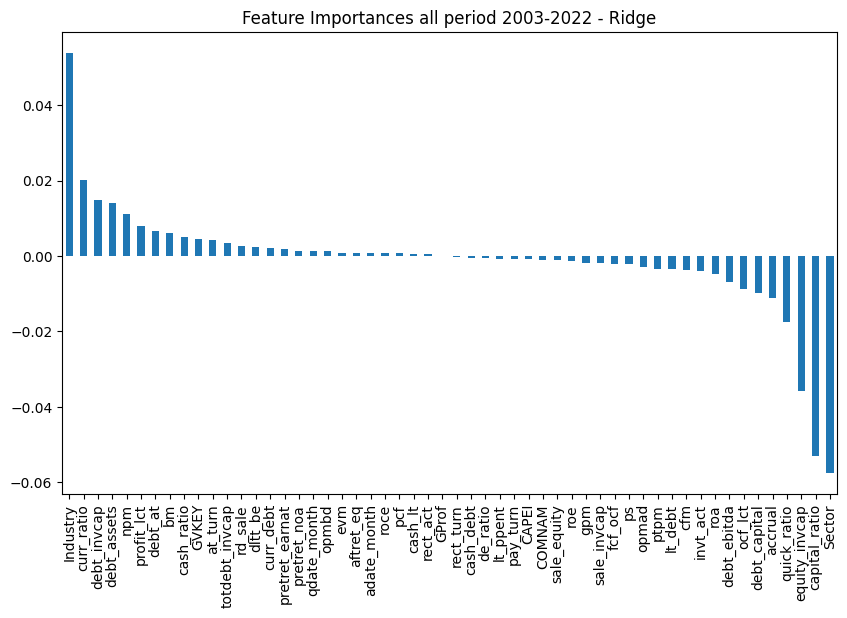

In [ ]:
#Feature Importance Plot
plt.figure(figsize=(10, 6))
importances_ridge.plot(kind='bar')
plt.title('Feature Importances all period 2003-2022 - Ridge')
plt.show()

Bottom line: feature importance change but Sector, Industry, curr_ratio and some other are always in the top 10

In [ ]:
#Predicted
pred_ridge_df = pd.DataFrame(pred_ridge, columns=['Predicted_return_Ridge'])
pred_ridge_df

Predicted_return_Ridge
0                  0.018435
1                  0.033552
2                  0.024610
3                  0.034443
4                  0.028427
..                      ...
293                0.019268
294                0.049049
295                0.015271
296                0.034407
297                0.088783

[298 rows x 1 columns]

In [ ]:
# Get worst 40 stocks based on predicted returns
ridge_result1 = pd.concat([pred_ridge_df.reset_index(drop=True), df_cleanedP['TICKER'].reset_index(drop=True)], axis=1)
ridge_result1_sorted = ridge_result1.sort_values(by='Predicted_return_Ridge', ascending=True).head(40)

print(ridge_result1_sorted)

     Predicted_return_Ridge TICKER
191               -0.030762   OTIS
149               -0.023113   PDCO
111               -0.014173    LVS
237               -0.001562    NEE
53                 0.000617   SPGI
252                0.006530    KDP
22                 0.007100    COO
49                 0.008579    SRE
54                 0.009644      D
90                 0.009868    PEG
276                0.010111     ES
229                0.010390   NFLX
185                0.010818     SO
183                0.010849    WEC
219                0.010860    MGM
88                 0.010861     FE
246                0.010998    DUK
77                 0.011147    RMD
193                0.011846   EVRG
68                 0.011890    DIS
35                 0.012947    XEL
235                0.013511   JKHY
28                 0.013834    MKC
29                 0.013834    MKC
112                0.014593    NOC
228                0.015172    NYT
295                0.015271    GIS
272                0

In [ ]:
# Get best 40 stocks based on predicted returns
ridge_result1B = pd.concat([pred_ridge_df.reset_index(drop=True), df_cleanedP['TICKER'].reset_index(drop=True)], axis=1)
ridge_result1_sortedB = ridge_result1B.sort_values(by='Predicted_return_Ridge', ascending=False).head(40)

print(ridge_result1_sortedB)

     Predicted_return_Ridge TICKER
139                0.132407    YUM
36                 0.118789   NKTR
173                0.094631   ETSY
297                0.088783    TDG
140                0.079755    GME
179                0.075674   EBAY
9                  0.074971    CAH
251                0.070966    BHF
267                0.069143    LOW
43                 0.065961    MTW
124                0.065727     OI
64                 0.065546   ILMN
231                0.065458      X
118                0.063362    ATI
34                 0.063170    UAA
14                 0.063102    CLF
137                0.062106    TNL
101                0.061353   SBUX
178                0.059820   EXPE
93                 0.059243   TRIP
157                0.058612    HUM
166                0.058233     CF
220                0.058063      R
102                0.057269    PKG
241                0.056809    CNC
72                 0.056539     MO
244                0.056484    FCX
141                0

In [ ]:
#calculate the predicted return in 3 months on the portfolio of the 40 best stocks we picked
ridge_result1_sortedB['Predicted_return_Ridge'].mean()

0.06484373158640322

In [ ]:
#Best 40 stocks for our portfolio
Best = ridge_result1_sortedB['TICKER']
Best

139     YUM
36     NKTR
173    ETSY
297     TDG
140     GME
179    EBAY
9       CAH
251     BHF
267     LOW
43      MTW
124      OI
64     ILMN
231       X
118     ATI
34      UAA
14      CLF
137     TNL
101    SBUX
178    EXPE
93     TRIP
157     HUM
166      CF
220       R
102     PKG
241     CNC
72       MO
244     FCX
141     LYV
42       CE
92      GPS
78      FLR
181     TUP
51      WRK
280    BKNG
73      NEM
147     LUV
38     FOSL
154     MCK
233    DXCM
127    ORLY
Name: TICKER, dtype: object

In [ ]:
Best.nunique()

40

In [ ]:
Best.info()

<class 'pandas.core.series.Series'>
Int64Index: 40 entries, 139 to 127
Series name: TICKER
Non-Null Count  Dtype 
--------------  ----- 
40 non-null     object
dtypes: object(1)
memory usage: 640.0+ bytes


#STEP #2.1

In [ ]:
# Define the tickers as a list of strings
tickers = []

In [ ]:
for x in range(len(Best)):
    tickers.append(Best[Best.index[x]])

In [ ]:
tickers

['YUM',
 'NKTR',
 'ETSY',
 'TDG',
 'GME',
 'EBAY',
 'CAH',
 'BHF',
 'LOW',
 'MTW',
 'OI',
 'ILMN',
 'X',
 'ATI',
 'UAA',
 'CLF',
 'TNL',
 'SBUX',
 'EXPE',
 'TRIP',
 'HUM',
 'CF',
 'R',
 'PKG',
 'CNC',
 'MO',
 'FCX',
 'LYV',
 'CE',
 'GPS',
 'FLR',
 'TUP',
 'WRK',
 'BKNG',
 'NEM',
 'LUV',
 'FOSL',
 'MCK',
 'DXCM',
 'ORLY']

In [ ]:
import yfinance as yf  # library to download financial data from Yahoo Finance

START_DATE = '2021-12-31'
END_DATE = '2022-12-31'
dff = yf.download(tickers, start=START_DATE,
                 end=END_DATE)
dff.head()

[*********************100%%**********************]  40 of 40 completed


Price       Adj Close                                                 \
Ticker            ATI        BHF         BKNG        CAH          CE   
Date                                                                   
2021-12-31  15.930000  51.799999  2399.229980  48.767075  160.378357   
2022-01-03  16.280001  53.250000  2461.419922  49.259579  159.834427   
2022-01-04  16.780001  56.700001  2464.929932  49.818367  164.310028   
2022-01-05  17.250000  53.700001  2413.300049  50.500294  165.875092   
2022-01-06  17.750000  55.259998  2429.969971  49.733131  163.861526   

Price                                                               \
Ticker             CF        CLF        CNC        DXCM       EBAY   
Date                                                                 
2021-12-31  68.248337  21.770000  82.400002  134.237503  63.775200   
2022-01-03  68.065132  21.730000  82.650002  130.197495  64.062912   
2022-01-04  68.585815  22.620001  81.080002  128.067505  62.470924   
2022-01-05  66.503082  23.790001  79.790001  121.952499  61.847561   
2022-01-06  66.763420  23.299999  76.339996  120.750000  64.072502   

Price                                                                       \
Ticker            ETSY        EXPE        FCX        FLR   FOSL        GME   
Date                                                                         
2021-12-31  218.940002  180.720001  40.266258  24.770000  10.29  37.097500   
2022-01-03  209.929993  184.970001  40.025021  25.080000  10.73  38.209999   
2022-01-04  200.990005  185.369995  40.671528  25.280001  10.83  37.227501   
2022-01-05  188.350006  181.300003  40.218010  24.070000  10.46  32.342499   
2022-01-06  196.949997  177.580002  39.108349  24.230000  10.44  32.757500   

Price                                                                 \
Ticker            GPS         HUM        ILMN         LOW        LUV   
Date                                                                   
2021-12-31  15.671698  457.318512  380.440002  247.322174  41.672901   
2022-01-03  16.337633  458.886078  380.869995  244.480408  42.801300   
2022-01-04  16.668320  452.517181  372.359985  248.594757  43.443314   
2022-01-05  16.462759  449.401733  367.880005  243.753189  42.791569   
2022-01-06  16.587885  362.346985  378.929993  246.661987  42.694298   

Price                                                                       \
Ticker             LYV         MCK         MO        MTW        NEM   NKTR   
Date                                                                         
2021-12-31  119.690002  245.661621  40.133835  18.590000  57.255497  13.51   
2022-01-03  121.139999  245.197144  40.625034  19.049999  56.295403  13.66   
2022-01-04  120.720001  245.098297  41.522720  19.790001  55.787655  13.72   
2022-01-05  117.470001  244.416351  41.192436  19.090000  55.695335  12.77   
2022-01-06  119.339996  241.747955  41.675163  19.500000  54.162853  12.70   

Price                                                                         \
Ticker         OI        ORLY         PKG          R        SBUX         TDG   
Date                                                                           
2021-12-31  12.03  706.229980  126.831345  77.840904  111.906708  596.740234   
2022-01-03  12.17  695.940002  125.396744  77.104324  111.629265  601.720276   
2022-01-04  12.59  698.859985  128.582657  79.720108  109.294876  604.008606   
2022-01-05  12.66  685.330017  129.467621  75.574509  105.659370  607.581848   
2022-01-06  12.81  700.219971  127.595222  74.922920  106.329063  604.693237   

Price                                                                     \
Ticker            TNL       TRIP    TUP        UAA        WRK          X   
Date                                                                       
2021-12-31  50.849468  27.260000  15.29  21.190001  41.850601  23.418579   
2022-01-03  52.376701  28.450001  15.90  21.240000  41.690220  23.536606   
2022-01-04  53

In [ ]:
df6 = pd.DataFrame(columns=['Stock','Marketcap', 'Beta'])
df6

Empty DataFrame
Columns: [Stock, Marketcap, Beta]
Index: []

In [ ]:
for x in tickers:
   info = yf.Ticker(x).info
   marketcap = info['marketCap']
   beta = info.get('beta')

   df6 = df6.append({'Stock':x,'Marketcap':marketcap, 'Beta':beta }, ignore_index=True)

display(df6)

Stock     Marketcap   Beta
0    YUM   36642398208  1.093
1   NKTR     130678144   0.78
2   ETSY    8919879680  2.054
3    TDG   63767134208  1.424
4    GME    4384125952 -0.346
5   EBAY   21808379904  1.298
6    CAH   25702430720  0.702
7    BHF    3379740672  1.189
8    LOW  127496724480  1.109
9    MTW     597848448  2.109
10    OI    2492652288  1.327
11  ILMN   22760804352  1.219
12     X   10372122624  2.043
13   ATI    5198762496  1.179
14   UAA    3326494976  1.648
15   CLF    9986159616  2.027
16   TNL    2923607552  1.626
17  SBUX  109361127424  0.989
18  EXPE   21370415104  1.904
19  TRIP    3003005952  1.499
20   HUM   45048143872  0.466
21    CF   14617695232  1.012
22     R    5183933440  1.412
23   PKG   14955607040  0.775
24   CNC   40888025088  0.365
25    MO   70697107456  0.688
26   FCX   54663315456  2.059
27   LYV   20268599296  1.298
28    CE   16220569600  1.353
29   GPS    7431493632  2.238
30   FLR    6867837440  2.148
31   TUP      68478568  2.877
32   WRK   11003327488  1.066
33  BKNG  133984886784  1.411
34   NEM   38424014848  0.526
35   LUV   19290181632  1.134
36  FOSL      56150928  2.071
37   MCK   68790886400   None
38  DXCM   48491679744  1.198
39  ORLY   63066673152   None

In [ ]:
AA = dff['Adj Close'].pct_change().dropna()
AA

Ticker           ATI       BHF      BKNG       CAH        CE        CF  \
Date                                                                     
2022-01-03  0.021971  0.027992  0.025921  0.010099 -0.003392 -0.002684   
2022-01-04  0.030713  0.064789  0.001426  0.011344  0.028001  0.007650   
2022-01-05  0.028009 -0.052910 -0.020946  0.013688  0.009525 -0.030367   
2022-01-06  0.028986  0.029050  0.006908 -0.015191 -0.012139  0.003915   
2022-01-07  0.028732  0.016468  0.001897  0.032946  0.002097 -0.001444   
...              ...       ...       ...       ...       ...       ...   
2022-12-23  0.010003  0.004321  0.019933 -0.006331  0.014140  0.009344   
2022-12-27  0.038296 -0.006650  0.013568 -0.011243  0.011603 -0.034604   
2022-12-28 -0.028617 -0.021658 -0.019732 -0.006949 -0.031325 -0.014383   
2022-12-29 -0.001637  0.037231  0.022804 -0.011196  0.029751 -0.009613   
2022-12-30 -0.020984 -0.005239  0.005875 -0.004584 -0.012078 -0.003625   

Ticker           CLF       CNC      DXCM      EBAY      ETSY      EXPE  \
Date                                                                     
2022-01-03 -0.001837  0.003034 -0.030096  0.004511 -0.041153  0.023517   
2022-01-04  0.040957 -0.018996 -0.016360 -0.024850 -0.042586  0.002162   
2022-01-05  0.051724 -0.015910 -0.047748 -0.009978 -0.062889 -0.021956   
2022-01-06 -0.020597 -0.043239 -0.009860  0.035975  0.045660 -0.020518   
2022-01-07  0.001717  0.000000 -0.023830 -0.007334 -0.059914  0.013121   
...              ...       ...       ...       ...       ...       ...   
2022-12-23 -0.001182 -0.007417 -0.019704  0.001246 -0.003219  0.022598   
2022-12-27  0.024852 -0.000612 -0.013999 -0.002240 -0.044115  0.001504   
2022-12-28 -0.061778  0.000000 -0.001001 -0.003992 -0.007747 -0.033156   
2022-12-29  0.014769  0.001716  0.020953  0.047595  0.018937  0.041104   
2022-12-30 -0.023044  0.003549  0.010440 -0.008369 -0.023639  0.005394   

Ticker           FCX       FLR      FOSL       GME       GPS       HUM  \
Date                                                                     
2022-01-03 -0.005991  0.012515  0.042760  0.029989  0.042493  0.003428   
2022-01-04  0.016153  0.007975  0.009320 -0.025713  0.020241 -0.013879   
2022-01-05 -0.011151 -0.047864 -0.034164 -0.131220 -0.012332 -0.006885   
2022-01-06 -0.027591  0.006647 -0.001912  0.012831  0.007601 -0.193713   
2022-01-07  0.033309 -0.016508 -0.000958  0.073189 -0.023707 -0.011863   
...              ...       ...       ...       ...       ...       ...   
2022-12-23  0.011415  0.008601  0.002519  0.013630  0.024639  0.002986   
2022-12-27  0.020472 -0.002842  0.017588 -0.093625 -0.047264  0.000817   
2022-12-28 -0.025720 -0.011973 -0.017284 -0.015385 -0.017406  0.001808   
2022-12-29  0.011352  0.008367  0.045226  0.022879  0.009743 -0.002569   
2022-12-30 -0.008092 -0.008298  0.036058  0.007092 -0.010526 -0.001968   

Ticker          ILMN       LOW       LUV       LYV       MCK        MO  \
Date                                                                     
2022-01-03  0.001130 -0.011490  0.027078  0.012115 -0.001891  0.012239   
2022-01-04 -0.022344  0.016829  0.015000 -0.003467 -0.000403  0.022097   
2022-01-05 -0.012031 -0.019476 -0.015002 -0.026922 -0.002782 -0.007954   
2022-01-06  0.030037  0.011933 -0.002273  0.015919 -0.010917  0.011719   
2022-01-07 -0.022616 -0.025990  0.033265 -0.029160  0.021054  0.011380   
...              ...       ...       ...       ...       ...       ...   
2022-12-23 -0.023189  0.013708  0.017767  0.001700  0.004924  0.010048   
2022-12-27 -0.012916 -0.000842 -0.059573 -0.015561 -0.009070  0.005190   
2022-12-28  0.010807 -0.008180 -0.051562 -0.020549 -0.007049 -0.013554   
2022-12-29  0.056758  0.010997  0.036968  0.029196 -0.006331  0.000436   
2022-12-30  0.002777 -0.014931  0.008688 -0.005845  0.000000 -0.003488   

Ticker           MTW       NEM      NKTR        OI      ORLY       PKG  \
Date                                                                     


In [ ]:
AA.iloc[:, 0].head()

Date
2022-01-03    0.021971
2022-01-04    0.030713
2022-01-05    0.028009
2022-01-06    0.028986
2022-01-07    0.028732
Name: ATI, dtype: float64

In [ ]:
# Calculate the 12-month stock volatility for the first stock
volatility = np.std(AA.iloc[:, 0]) * np.sqrt(251)  # Assuming 251 trading days in a year

print("12-Month Stock Volatility:", volatility)

12-Month Stock Volatility: 0.4837179414811299


In [ ]:
volat = []
for x in range(40):
    volat.append(np.std(AA.iloc[:, x]) * np.sqrt(251))

In [ ]:
volat = pd.DataFrame(volat)

In [ ]:
volat

0
0   0.483718
1   0.449993
2   0.423706
3   0.270833
4   0.403854
5   0.491793
6   0.635215
7   0.324610
8   0.545816
9   0.380473
10  0.769125
11  0.519645
12  0.536424
13  0.463608
14  0.838687
15  0.991466
16  0.591852
17  0.323780
18  0.553009
19  0.332058
20  0.374250
21  0.440191
22  0.239182
23  0.247978
24  0.484052
25  0.380201
26  0.933653
27  0.469744
28  0.292237
29  0.297031
30  0.415395
31  0.357276
32  0.343376
33  0.447217
34  0.582551
35  1.110113
36  0.623169
37  0.360821
38  0.567598
39  0.240222

In [ ]:
volat = volat.rename(columns={0: 'Volatility'})
volat.head()

Volatility
0    0.483718
1    0.449993
2    0.423706
3    0.270833
4    0.403854

In [ ]:
step2a= pd.concat([df6.reset_index(drop=True), volat.reset_index(drop=True)], axis=1)
step2a

Stock     Marketcap   Beta  Volatility
0    YUM   36642398208  1.093    0.483718
1   NKTR     130678144   0.78    0.449993
2   ETSY    8919879680  2.054    0.423706
3    TDG   63767134208  1.424    0.270833
4    GME    4384125952 -0.346    0.403854
5   EBAY   21808379904  1.298    0.491793
6    CAH   25702430720  0.702    0.635215
7    BHF    3379740672  1.189    0.324610
8    LOW  127496724480  1.109    0.545816
9    MTW     597848448  2.109    0.380473
10    OI    2492652288  1.327    0.769125
11  ILMN   22760804352  1.219    0.519645
12     X   10372122624  2.043    0.536424
13   ATI    5198762496  1.179    0.463608
14   UAA    3326494976  1.648    0.838687
15   CLF    9986159616  2.027    0.991466
16   TNL    2923607552  1.626    0.591852
17  SBUX  109361127424  0.989    0.323780
18  EXPE   21370415104  1.904    0.553009
19  TRIP    3003005952  1.499    0.332058
20   HUM   45048143872  0.466    0.374250
21    CF   14617695232  1.012    0.440191
22     R    5183933440  1.412    0.239182
23   PKG   14955607040  0.775    0.247978
24   CNC   40888025088  0.365    0.484052
25    MO   70697107456  0.688    0.380201
26   FCX   54663315456  2.059    0.933653
27   LYV   20268599296  1.298    0.469744
28    CE   16220569600  1.353    0.292237
29   GPS    7431493632  2.238    0.297031
30   FLR    6867837440  2.148    0.415395
31   TUP      68478568  2.877    0.357276
32   WRK   11003327488  1.066    0.343376
33  BKNG  133984886784  1.411    0.447217
34   NEM   38424014848  0.526    0.582551
35   LUV   19290181632  1.134    1.110113
36  FOSL      56150928  2.071    0.623169
37   MCK   68790886400   None    0.360821
38  DXCM   48491679744  1.198    0.567598
39  ORLY   63066673152   None    0.240222

#Lets calculate the actual return in 3 months after december 2022

In [ ]:
START_DATE = '2022-12-30'
END_DATE = '2023-3-31'
dfA = yf.download(tickers, start=START_DATE,
                 end=END_DATE)
dfA.head()

[*********************100%%**********************]  40 of 40 completed


Price       Adj Close                                                 \
Ticker            ATI        BHF         BKNG        CAH          CE   
Date                                                                   
2022-12-30  29.860001  51.270000  2015.280029  75.141045   99.797302   
2023-01-03  29.559999  51.040001  2032.209961  75.004189   99.826584   
2023-01-04  31.030001  52.139999  2110.439941  75.268120  106.542221   
2023-01-05  31.950001  51.750000  2144.939941  74.896667  108.211357   
2023-01-06  32.520000  53.180000  2179.250000  76.871231  113.833740   

Price                                                               \
Ticker             CF        CLF        CNC        DXCM       EBAY   
Date                                                                 
2022-12-30  83.460350  16.110001  82.010002  113.239998  40.519577   
2023-01-03  80.276703  16.790001  79.739998  114.730003  41.183994   
2023-01-04  80.727325  17.200001  79.459999  114.330002  42.102451   
2023-01-05  82.069344  17.600000  77.260002  111.690002  42.112217   
2023-01-06  82.686493  18.650000  78.660004  115.820000  44.076153   

Price                                                                     \
Ticker            ETSY       EXPE        FCX        FLR  FOSL        GME   
Date                                                                       
2022-12-30  119.779999  87.599998  37.309258  34.660000  4.31  18.459999   
2023-01-03  113.559998  87.680000  37.230705  33.349998  4.45  17.200001   
2023-01-04  117.110001  90.989998  38.291080  33.020000  4.86  17.320000   
2023-01-05  119.559998  93.000000  39.115810  31.750000  4.78  16.219999   
2023-01-06  120.589996  94.110001  41.511456  32.490002  4.94  16.459999   

Price                                                                 \
Ticker            GPS         HUM        ILMN         LOW        LUV   
Date                                                                   
2022-12-30  10.556144  508.326263  202.199997  194.183929  32.752720   
2023-01-03  10.745831  496.714447  200.869995  193.989029  31.711868   
2023-01-04  11.172630  488.407623  202.610001  196.279388  32.704082   
2023-01-05  10.821706  484.338562  201.149994  195.675125  32.616531   
2023-01-06  11.172630  488.824493  201.869995  195.870026  34.124310   

Price                                                                 \
Ticker            LYV         MCK         MO    MTW        NEM  NKTR   
Date                                                                   
2022-12-30  69.739998  372.966583  41.888729   9.16  45.364361  2.26   
2023-01-03  68.860001  372.181091  41.714619   9.61  47.651802  2.19   
2023-01-04  71.010002  371.862976  41.613815   9.75  49.506741  2.34   
2023-01-05  71.660004  371.902710  41.577156   9.59  49.218407  2.39   
2023-01-06  72.379997  383.833832  42.566872  10.09  50.640850  2.42   

Price                                                                 \
Ticker             OI        ORLY         PKG          R        SBUX   
Date                                                                   
2022-12-30  16.570000  844.030029  123.510025  81.252289   97.161484   
2023-01-03  16.559999  840.719971  124.620453  80.289734   98.757996   
2023-01-04  17.820000  826.739990  126.300598  80.843925  102.313393   
2023-01-05  19.400000  834.289978  125.412262  79.618874  102.284012   
2023-01-06  18.930000  842.520020  127.642784  81.086998  104.497566   

Price                                                                 \
Ticker             TDG        TNL       TRIP   TUP    UAA        WRK   
Date                                                                   
2022-12-30  607.320862  34.744228  17.980000  4.14  10.16  33.976620   
2023-01-03  603.578491  33.751537  18.309999  4.07  10.09  34.285851   
2023-01-04  611.092163  35.173752  19.209999  4.39  10.67  35.155560   
2023-01-05  613.889343  34.849224  19.379999  4.36  10.34  34.198879   
2023-01-06  626.01

In [ ]:
returns=[]
for i in range(len(tickers)):
  ret = (dfA['Adj Close'][tickers[i]][-1]-dfA['Adj Close'][tickers[i]][0])/dfA['Adj Close'][tickers[i]][0]
  returns.append(ret)

returns

[0.01440750339368493,
 -0.7168141644267452,
 -0.09183503182587502,
 0.16710867814131067,
 0.21885163141343428,
 0.064852413357831,
 -0.019773706409668423,
 -0.15584165412771891,
 -0.028100261841116615,
 0.8209607623397754,
 0.3608931594672408,
 0.11404548915248745,
 0.04457338110220126,
 0.3047554684565679,
 -0.08464563677097886,
 0.12290499486164323,
 0.06708482693933272,
 0.026488890982830984,
 0.09737441698491374,
 0.07397107661664774,
 -0.04478539890681513,
 -0.15243440745604273,
 0.048109278021389874,
 0.08598698376510143,
 -0.21802224627565828,
 -0.005771851233403082,
 0.06140772594325916,
 -0.007743058962837715,
 0.046634138167024344,
 -0.14555260545316123,
 -0.13214079468751125,
 -0.42512072676435225,
 -0.14415455125299673,
 0.29498629065270016,
 0.04457704531493664,
 -0.04497888347318036,
 -0.2691414994924616,
 -0.044773625606100265,
 0.010243762663302835,
 -0.0029975583913556467]

In [ ]:
returns = pd.Series(returns)
returns.mean()

0.00888975635949094

Actual return Dec 2022 to March 2023 for our best 40 stock portfolio was 0.88 %

# **Question 3**

In [ ]:
yf.pdr_override()
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2020-01-01'
end = '2022-12-30'

# Tickers of assets
my_stocks = ['YUM', 'NKTR', 'ETSY', 'TDG', 'GME', 'EBAY', 'CAH', 'BHF', 'LOW', 'MTW', 'OI', 'ILMN', 'X', 'ATI', 'UAA', 'CLF', 'TNL', 'SBUX', 'EXPE', 'TRIP', 'HUM', 'CF', 'R', 'PKG', 'CNC', 'MO', 'FCX', 'LYV', 'CE', 'GPS', 'FLR', 'TUP', 'WRK', 'BKNG', 'NEM', 'LUV', 'FOSL', 'MCK', 'DXCM', 'ORLY']
my_etfs= ['FLRT', 'HYHG', 'EEM']
all_assets = my_stocks + my_etfs

# Downloading data for stock portfolio
data = yf.download(my_stocks, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = my_stocks
#Calculating returns
stock_returns = data[my_stocks].pct_change().dropna()
display(stock_returns.head())

[*********************100%%**********************]  40 of 40 completed


YUM     NKTR     ETSY      TDG      GME     EBAY      CAH  \
Date                                                                        
2020-01-03 -0.4369% -0.5864% -0.4386% -1.4574% -1.3588% -0.6896% -0.2551%   
2020-01-06 -1.9990% -2.6417% -0.8753%  0.8306% -1.1020% -0.1736% -0.3836%   
2020-01-07  1.0945% -0.1581%  1.0086%  0.0402% -0.3883% -0.9130%  2.6958%   
2020-01-08 -3.1496%  1.4776% -0.2490%  0.5423% -0.7797%  0.4607% -0.8750%   
2020-01-09 -2.8963%  2.4181%  1.0369%  0.4794%  0.6662% -0.4805% -2.1438%   

                BHF      LOW      MTW  ...      FLR      TUP      WRK  \
Date                                   ...                              
2020-01-03 -1.1635% -0.3100% -0.9366%  ... -0.8467% -0.5820%  1.8328%   
2020-01-06  3.0576%  3.3333% -0.5006%  ... -0.3156% -0.7880%  1.2045%   
2020-01-07  0.0000%  2.4160% -0.4472%  ...  0.8194% -0.3064%  0.3762%   
2020-01-08  2.1260%  0.7691% -0.0562%  ... -0.2032%  1.1610% -0.2334%   
2020-01-09 -0.3262%  2.5897% -1.1798%  ... -0.5552%  1.8564%  1.6700%   

               BKNG      NEM      LUV     FOSL      MCK     DXCM     ORLY  
Date                                                                       
2020-01-03 -1.4368% -0.2974% -3.1765%  0.3214% -1.7722% -0.7393% -0.3132%  
2020-01-06 -0.5248% -0.3646%  2.1871% -6.4531% -1.5230%  0.4655% -0.0589%  
2020-01-07 -0.5667%  1.3639% -0.9512%  1.2720% -1.1182%  3.1511%  0.1768%  
2020-01-08  0.4520%  0.3938% -1.5606% -1.3527%  0.4331% -0.2696%  0.1765%  
2020-01-09  0.4108% -0.3269% -1.8293% -3.0852%  1.9885% -2.2522%  0.7929%  

[5 rows x 40 columns]

In [ ]:
# Calculate the Historical Return series of an equal-weighted portfolio of stocks
stock_port_weights = [0.025]*len(my_stocks)
weighted_returns = (stock_port_weights * stock_returns)
stock_port_ret = weighted_returns.sum(axis=1) # Historical Returns of the Stock Portion
stock_port_ret = pd.DataFrame(stock_port_ret)
stock_port_ret.columns = ['DOUGLAS_STOCK_PORTFOLIO']
display(stock_port_ret.head())

DOUGLAS_STOCK_PORTFOLIO
Date                               
2020-01-03                 -0.8961%
2020-01-06                  0.2316%
2020-01-07                  0.2687%
2020-01-08                  0.3037%
2020-01-09                 -0.3349%

In [ ]:
# Collect the returns data for the ETFs
# Downloading data for stock portfolio
data = yf.download(my_etfs, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = my_etfs
#Calculating returns
etf_returns = data[my_etfs].pct_change().dropna()
etf_returns = pd.DataFrame(etf_returns)
display(etf_returns.head())

[*********************100%%**********************]  3 of 3 completed


FLRT     HYHG      EEM
Date                                 
2020-01-03 -1.8567% -0.1217% -0.1833%
2020-01-06 -0.2448%  0.0508%  0.0153%
2020-01-07 -0.0669%  0.1320%  0.0000%
2020-01-08  0.5805%  0.0202%  0.1377%
2020-01-09  0.6659%  0.0609%  0.1986%

In [ ]:
# Now, combine the historical returns of the ETFs with the Stock Portfolio Returns
all_returns = pd.merge(etf_returns, stock_port_ret, on='Date')
display(all_returns.head())

FLRT     HYHG      EEM  DOUGLAS_STOCK_PORTFOLIO
Date                                                          
2020-01-03 -1.8567% -0.1217% -0.1833%                 -0.8961%
2020-01-06 -0.2448%  0.0508%  0.0153%                  0.2316%
2020-01-07 -0.0669%  0.1320%  0.0000%                  0.2687%
2020-01-08  0.5805%  0.0202%  0.1377%                  0.3037%
2020-01-09  0.6659%  0.0609%  0.1986%                 -0.3349%

In [ ]:
import riskfolio as rp


# Building the portfolio object
port = rp.Portfolio(returns=all_returns)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w)

weights
FLRT                     0.0000%
HYHG                    24.1209%
EEM                      0.0000%
DOUGLAS_STOCK_PORTFOLIO 75.8791%

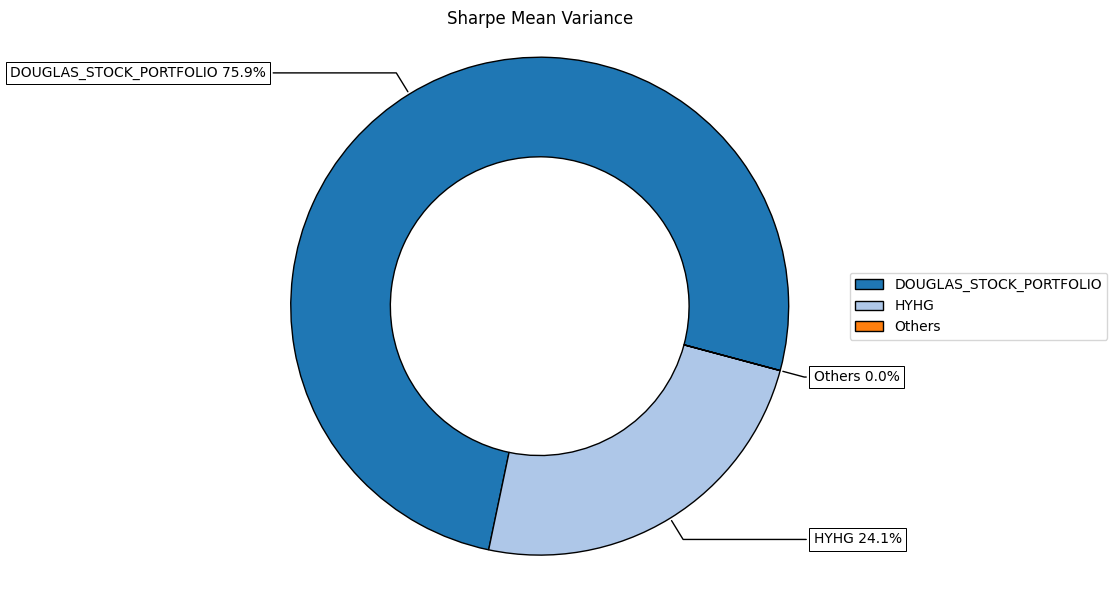

In [ ]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

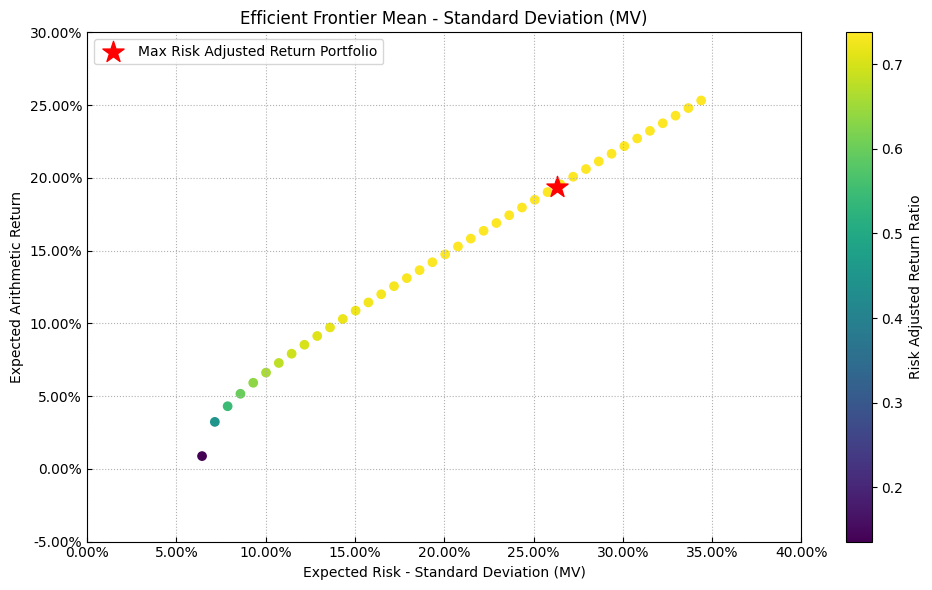

In [ ]:
points = 40 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

# Plotting the efficient frontier

label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

In [ ]:
asset_classes = {'Assets': ['FLRT', 'HYHG', 'EEM', 'DOUGLAS_STOCK_PORTFOLIO'],
                 'Group': ['ETF', 'ETF','ETF', 'OUR_STOCKS']}

asset_classes = pd.DataFrame(asset_classes)
#asset_classes = asset_classes.sort_values(by=['Assets'])

constraints = {'Disabled': [False, False, False, False],
               'Type': ['Classes', 'Classes', 'Classes', 'Classes'],
               'Set': ['Group', 'Group', 'Group', 'Group'],
               'Position': ['ETF', 'ETF', 'ETF', 'OUR_STOCKS'],
               'Sign': ['>=', '>=', '>=', '>='],
               'Weight': [0.1, 0.1, 0.1, 0.5],
               'Type Relative': ['', '', '', ''],
               'Relative Set': ['', '', '', ''],
               'Relative': ['', '', '', ''],
               'Factor': ['', '', '', '']}

constraints = pd.DataFrame(constraints)

display(constraints)

Disabled     Type    Set    Position Sign   Weight Type Relative  \
0     False  Classes  Group         ETF   >= 10.0000%                 
1     False  Classes  Group         ETF   >= 10.0000%                 
2     False  Classes  Group         ETF   >= 10.0000%                 
3     False  Classes  Group  OUR_STOCKS   >= 50.0000%                 

  Relative Set Relative Factor  
0                               
1                               
2                               
3

In [ ]:
display(asset_classes)

Assets       Group
0                     FLRT         ETF
1                     HYHG         ETF
2                      EEM         ETF
3  DOUGLAS_STOCK_PORTFOLIO  OUR_STOCKS

In [ ]:
A, B = rp.assets_constraints(constraints, asset_classes)

In [ ]:
port.ainequality = A
port.binequality = B

model = 'Classic'
rm = 'MV'
obj = 'Sharpe'
rf = 0

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.transpose())

FLRT     HYHG     EEM  DOUGLAS_STOCK_PORTFOLIO
weights 0.0000% 24.1211% 0.0000%                 75.8789%

In [ ]:
my_weights = w.T
my_weights.columns = ['FLRT', 'HYHG', 'EEM', 'OUR_STOCKS']
display(my_weights)

FLRT     HYHG     EEM  OUR_STOCKS
weights 0.0000% 24.1211% 0.0000%    75.8789%

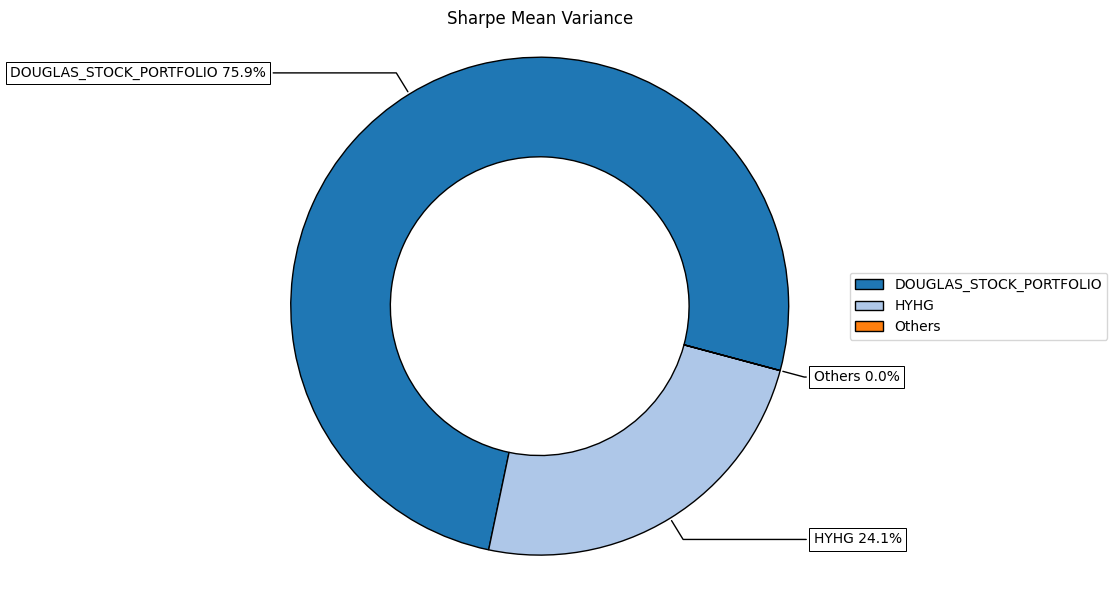

In [ ]:
ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.01, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)


#### We constructed a portfolio consisting of our 40-Stock Portfolio, and our ETFs in 2022-Dec with the weights given in 'w'

### What has been the return of this portfolio in 2023?
#### Let's collect the price data in 2023 and calculate

In [ ]:
# Date range
start = '2023-01-01'
end = '2023-12-31'

# Tickers of assets
our_stocks = ['YUM', 'NKTR', 'ETSY', 'TDG', 'GME', 'EBAY', 'CAH', 'BHF', 'LOW', 'MTW', 'OI', 'ILMN', 'X', 'ATI', 'UAA', 'CLF', 'TNL', 'SBUX', 'EXPE', 'TRIP', 'HUM', 'CF', 'R', 'PKG', 'CNC', 'MO', 'FCX', 'LYV', 'CE', 'GPS', 'FLR', 'TUP', 'WRK', 'BKNG', 'NEM', 'LUV', 'FOSL', 'MCK', 'DXCM', 'ORLY']
our_etfs= ['FLRT', 'HYHG', 'EEM']
allour_assets = our_stocks + our_etfs

# Downloading data for stock portfolio
data = yf.download(allour_assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = all_assets
#Calculating returns
asset_returns = data[allour_assets].pct_change().dropna()
display(asset_returns.head())

[*********************100%%**********************]  43 of 43 completed


YUM     NKTR    ETSY      TDG     GME     EBAY      CAH  \
Date                                                                      
2023-01-04  4.9729%  2.1552% 3.8495%  0.3519% 6.7273%  0.5613%  2.4419%   
2023-01-05  2.9649% -0.7480% 1.6347% -0.4935% 1.5667%  1.6624%  2.3256%   
2023-01-06  1.7840%  2.7633% 1.5996%  2.6364% 5.1957%  0.7520%  5.9659%   
2023-01-09 -0.1845% -2.4257% 1.3381% -1.3606% 0.1543%  1.8837% -2.5201%   
2023-01-10  2.4030% -0.0578% 0.5678%  0.7219% 1.4812% -3.4884%  3.4653%   

                BHF      LOW      MTW  ...     BKNG      NEM     LUV     FOSL  \
Date                                   ...                                      
2023-01-04 -0.3511% -0.3486%  2.2301%  ...  0.6902%  3.6001% 1.2449%  4.2138%   
2023-01-05 -2.7687% -2.3091%  0.0232%  ... -1.5153% -0.0287% 0.4577% -0.9226%   
2023-01-06  1.8121%  3.6977%  4.6636%  ...  1.8439%  2.1641% 1.9750%  3.6428%   
2023-01-09 -1.3603% -4.9732% -3.5247%  ...  1.0192% -1.8277% 0.2758%  0.9249%   
2023-01-10 -1.8946%  0.7450%  3.6075%  ...  2.3620%  1.2030% 1.2261%  2.5137%   

               MCK     DXCM     ORLY     FLRT     HYHG      EEM  
Date                                                             
2023-01-04 4.9153%  7.8624%  5.7483%  2.5366%  0.7588%  1.3548%  
2023-01-05 0.8850% -0.6834% -3.0928% -2.7213%  0.8720% -0.7616%  
2023-01-06 1.3416%  6.4220%  3.9652%  3.7864%  5.6974%  2.0282%  
2023-01-09 2.9532%  2.8017% -0.8372% -0.2178% -1.5985% -0.4068%  
2023-01-10 1.7804% -1.6771%  2.2514%  0.1637%  4.6090% -0.2774%  

[5 rows x 43 columns]

In [ ]:
port_weights =[0.025*my_weights.OUR_STOCKS]*len(our_stocks) + [my_weights.FLRT] + [my_weights.HYHG] + [my_weights.EEM]
port_weights= np.transpose(port_weights)

weighted_asset_returns = port_weights * asset_returns

display(weighted_asset_returns.shape)
port_ret_2022 = weighted_asset_returns.sum(axis=1) # Returns of the Stock Portfolio in 2022
port_ret = pd.DataFrame(port_ret_2022)
port_ret.columns = ['MY_Portfolio_Rets']
display(port_ret.head(50))

(249, 43)

MY_Portfolio_Rets
Date                         
2023-01-04            2.1382%
2023-01-05            0.1710%
2023-01-06            3.2075%
2023-01-09           -0.4476%
2023-01-10            2.1379%
2023-01-11            0.8916%
2023-01-12            2.0908%
2023-01-13            0.3610%
2023-01-17           -0.4250%
2023-01-18           -1.1958%
2023-01-19           -0.9570%
2023-01-20            2.0416%
2023-01-23            0.8822%
2023-01-24           -0.5312%
2023-01-25            0.9798%
2023-01-26            0.9145%
2023-01-27            0.0429%
2023-01-30           -1.0206%
2023-01-31            1.4877%
2023-02-01            2.0294%
2023-02-02            0.6193%
2023-02-03           -0.0279%
2023-02-06           -0.7124%
2023-02-07           -1.3543%
2023-02-08           -0.4076%
2023-02-09           -1.4033%
2023-02-10           -0.4678%
2023-02-13            1.5970%
2023-02-14            1.1512%
2023-02-15            1.4135%
2023-02-16           -1.2493%
2023-02-17           -1.7302%
2023-02-21           -1.2460%
2023-02-22            0.1181%
2023-02-23            0.2307%
2023-02-24           -1.9189%
2023-02-27            0.8015%
2023-02-28            1.7285%
2023-03-01           -0.0595%
2023-03-02            1.1753%
2023-03-03            1.2303%
2023-03-06           -2.3883%
2023-03-07           -2.1285%
2023-03-08            0.2368%
2023-03-09           -2.9286%
2023-03-10           -3.2191%
2023-03-13           -1.6124%
2023-03-14            0.5874%
2023-03-15           -3.9175%
2023-03-16            0.9238%

In [ ]:
# Calculate cumulative portfolio return
cumulative_returns = (1 + port_ret_2022).cumprod() - 1
cumulative_return = cumulative_returns[-1]

# Print the cumulative portfolio return
print("Cumulative Portfolio Return: {:.2%}".format(cumulative_return))

Cumulative Portfolio Return: 35.49%


In [ ]:
# Cumulative Portfolio Return
C_port_ret = (1 + port_ret).cumprod()

print("Last Portfolio Value:")
display(C_port_ret[(len(C_port_ret)-1):])


Last Portfolio Value:


MY_Portfolio_Rets
Date                         
2023-12-29          135.4942%

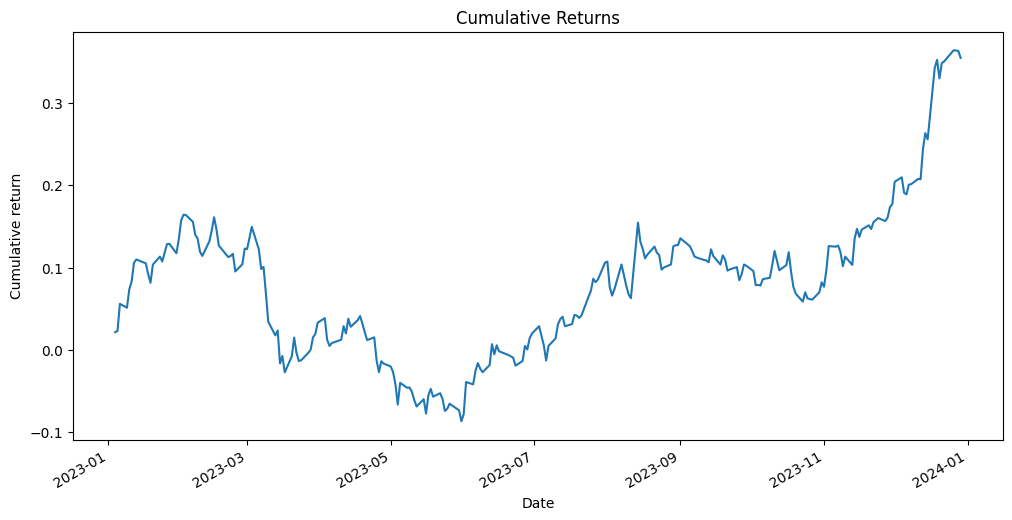

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1, 1, 1)
cumulative_returns.plot(ax=ax1)
ax1.set_xlabel('Date')
ax1.set_ylabel('Cumulative return')
ax1.set_title('Cumulative Returns')
plt.show()

**If we had a portfolio starting value of # 10 million, with a portfolio return of 35.49%, we would have ended with # 13,549,000 as at December 29th, 2023**

**Relative to the S&P 500 that returned 26.29% in 2023, our portfolio outperforms it AND the TSX 60 that returned 11.87% in 2023**